## 스마트워치 가격 예측

목차
- 1. 데이터 탐색
  2. 시각화
  3. 훈련
  4. 결과평가

### 1. 데이터 탐색

In [102]:
import pandas as pd

sw_df = pd.read_csv('./datasets/smartch_watch_cleaned.csv', low_memory=False)
sw_df

Unnamed: 0                                     name  price  rating  \
0              0                          OnePlus Watch 2  24999    4.35   
1              1   Fire Boltt Dream WristPhone Smartwatch   6999    4.25   
2              2  Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35   
3              3          Fastrack Optimus Pro Smartwatch   2299    4.35   
4              4                             Oppo Watch X  12999    4.05   
...          ...                                      ...    ...     ...   
1015        1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70   
1016        1016             Maxima Max Pro X4 Smartwatch   1599    4.05   
1017        1017                 FCUK Series 2 Smartwatch   2231    4.30   
1018        1018                 Pebble Cosmos Smartwatch   3999    4.35   
1019        1019           Noise ColorFit Qube Smartwatch    999    4.20   

       wifi    GPS    NFC  voice_calling      Bluetooth  Bluetooth_calling  \
0      True   True   True          False  Bluetooth 5.0               True   
1      True   True  False           True  Bluetooth 5.0              False   
2      True   True   True          False  Bluetooth 5.0              False   
3     False  False  False          False  Bluetooth 5.2               True   
4      True   True   True          False  Bluetooth 5.0               True   
...     ...    ...    ...            ...            ...                ...   
1015  False  False  False          False  Bluetooth 5.0               True   
1016  False  False  False          False  Bluetooth 5.0              False   
1017  False  False  False          False  Bluetooth 5.0               True   
1018  False  False  False          False  Bluetooth 5.0               True   
1019  False  False  False          False  Bluetooth 5.1              False   

      ...  sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0     ...          False       False      False          True      False   
1     ...          False       False      False          True      False   
2     ...          False       False      False          True      False   
3     ...           True        True       True          True      False   
4     ...          False       False      False          True      False   
...   ...            ...         ...        ...           ...        ...   
1015  ...           True        True       True          True      False   
1016  ...           True        True       True          True      False   
1017  ...           True        True       True          True      False   
1018  ...           True        True      False          True      False   
1019  ...           True        True      False          True      False   

      alarm_clock  stopwatch  reminder  timer         battery  
0           False      False     False  False             NaN  
1           False      False     False  False             NaN  
2           False      False     False  False             NaN  
3           False      False     False  False   7days Battery  
4           False      False     False  False             NaN  
...           ...        ...       ...    ...             ...  
1015        False      False     False  False             NaN  
1016        False      False     False  False  15days Battery  
1017        False      False     False  False             NaN  
1018        False      False     False  False             NaN  
1019        False      False     False  False   7days Battery  

[1020 rows x 30 columns]

In [103]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   name                    1020 non-null   object 
 2   price                   1020 non-null   int64  
 3   rating                  1020 non-null   float64
 4   wifi                    1020 non-null   bool   
 5   GPS                     1020 non-null   bool   
 6   NFC                     1020 non-null   bool   
 7   voice_calling           1020 non-null   bool   
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       1020 non-null   bool   
 10  display_size_inches     990 non-null    float64
 11  Touch                   1020 non-null   bool   
 12  ram_gb                  91 non-null     float64
 13  memory_inbuilt          120 non-null    float64
 14  water_resistance        1020 non-null   

In [104]:
sw_df=sw_df.drop(labels=['ram_gb','memory_inbuilt','battery'], axis=1)
sw_df

Unnamed: 0                                     name  price  rating  \
0              0                          OnePlus Watch 2  24999    4.35   
1              1   Fire Boltt Dream WristPhone Smartwatch   6999    4.25   
2              2  Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35   
3              3          Fastrack Optimus Pro Smartwatch   2299    4.35   
4              4                             Oppo Watch X  12999    4.05   
...          ...                                      ...    ...     ...   
1015        1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70   
1016        1016             Maxima Max Pro X4 Smartwatch   1599    4.05   
1017        1017                 FCUK Series 2 Smartwatch   2231    4.30   
1018        1018                 Pebble Cosmos Smartwatch   3999    4.35   
1019        1019           Noise ColorFit Qube Smartwatch    999    4.20   

       wifi    GPS    NFC  voice_calling      Bluetooth  Bluetooth_calling  \
0      True   True   True          False  Bluetooth 5.0               True   
1      True   True  False           True  Bluetooth 5.0              False   
2      True   True   True          False  Bluetooth 5.0              False   
3     False  False  False          False  Bluetooth 5.2               True   
4      True   True   True          False  Bluetooth 5.0               True   
...     ...    ...    ...            ...            ...                ...   
1015  False  False  False          False  Bluetooth 5.0               True   
1016  False  False  False          False  Bluetooth 5.0              False   
1017  False  False  False          False  Bluetooth 5.0               True   
1018  False  False  False          False  Bluetooth 5.0               True   
1019  False  False  False          False  Bluetooth 5.1              False   

      ...  calorie_count  sleep_monitor  step_count  Pedometer  Blood_oxygen  \
0     ...          False          False       False      False          True   
1     ...          False          False       False      False          True   
2     ...          False          False       False      False          True   
3     ...           True           True        True       True          True   
4     ...          False          False       False      False          True   
...   ...            ...            ...         ...        ...           ...   
1015  ...           True           True        True       True          True   
1016  ...           True           True        True       True          True   
1017  ...           True           True        True       True          True   
1018  ...           True           True        True      False          True   
1019  ...           True           True        True      False          True   

      Altimeter  alarm_clock  stopwatch  reminder  timer  
0         False        False      False     False  False  
1         False        False      False     False  False  
2         False        False      False     False  False  
3         False        False      False     False  False  
4         False        False      False     False  False  
...         ...          ...        ...       ...    ...  
1015      False        False      False     False  False  
1016      False        False      False     False  False  
1017      False        False      False     False  False  
1018      False        False      False     False  False  
1019      False        False      False     False  False  

[1020 rows x 27 columns]

In [105]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   name                    1020 non-null   object 
 2   price                   1020 non-null   int64  
 3   rating                  1020 non-null   float64
 4   wifi                    1020 non-null   bool   
 5   GPS                     1020 non-null   bool   
 6   NFC                     1020 non-null   bool   
 7   voice_calling           1020 non-null   bool   
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       1020 non-null   bool   
 10  display_size_inches     990 non-null    float64
 11  Touch                   1020 non-null   bool   
 12  water_resistance        1020 non-null   bool   
 13  dust_proof              1020 non-null   bool   
 14  scratch_resistance      1020 non-null   

In [106]:
sw_df.describe().T

count          mean           std     min      25%  \
Unnamed: 0           1020.0    509.500000    294.592939    0.00   254.75   
price                1020.0  10783.956863  68712.972353  394.00  1476.25   
rating               1020.0      4.376716      0.224755    4.00     4.20   
display_size_inches   990.0      1.632101      0.261606    0.56     1.40   

                         50%      75%         max  
Unnamed: 0            509.50   764.25     1019.00  
price                1999.00  4699.00  2048000.00  
rating                  4.35     4.55        4.75  
display_size_inches     1.69     1.85        2.86

In [107]:
import numpy as np
sw_df.columns

Index(['Unnamed: 0', 'name', 'price', 'rating', 'wifi', 'GPS', 'NFC',
       'voice_calling', 'Bluetooth', 'Bluetooth_calling',
       'display_size_inches', 'Touch', 'water_resistance', 'dust_proof',
       'scratch_resistance', 'heart_rate_monitor', 'Blood_Pressure_monitor',
       'calorie_count', 'sleep_monitor', 'step_count', 'Pedometer',
       'Blood_oxygen', 'Altimeter', 'alarm_clock', 'stopwatch', 'reminder',
       'timer'],
      dtype='object')

In [108]:
for column in sw_df.columns:
    #print(column)
    if sw_df[column].dtype == 'bool':
        print(f'{column} is bool')
        sw_df[column] = sw_df[column].astype('int32')

wifi is bool
GPS is bool
NFC is bool
voice_calling is bool
Bluetooth_calling is bool
Touch is bool
water_resistance is bool
dust_proof is bool
scratch_resistance is bool
heart_rate_monitor is bool
Blood_Pressure_monitor is bool
calorie_count is bool
sleep_monitor is bool
step_count is bool
Pedometer is bool
Blood_oxygen is bool
Altimeter is bool
alarm_clock is bool
stopwatch is bool
reminder is bool
timer is bool


In [109]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   name                    1020 non-null   object 
 2   price                   1020 non-null   int64  
 3   rating                  1020 non-null   float64
 4   wifi                    1020 non-null   int32  
 5   GPS                     1020 non-null   int32  
 6   NFC                     1020 non-null   int32  
 7   voice_calling           1020 non-null   int32  
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       1020 non-null   int32  
 10  display_size_inches     990 non-null    float64
 11  Touch                   1020 non-null   int32  
 12  water_resistance        1020 non-null   int32  
 13  dust_proof              1020 non-null   int32  
 14  scratch_resistance      1020 non-null   

In [110]:
sw_df.describe().T

count          mean           std     min      25%  \
Unnamed: 0              1020.0    509.500000    294.592939    0.00   254.75   
price                   1020.0  10783.956863  68712.972353  394.00  1476.25   
rating                  1020.0      4.376716      0.224755    4.00     4.20   
wifi                    1020.0      0.130392      0.336900    0.00     0.00   
GPS                     1020.0      0.235294      0.424391    0.00     0.00   
NFC                     1020.0      0.120588      0.325808    0.00     0.00   
voice_calling           1020.0      0.088235      0.283776    0.00     0.00   
Bluetooth_calling       1020.0      0.760784      0.426814    0.00     1.00   
display_size_inches      990.0      1.632101      0.261606    0.56     1.40   
Touch                   1020.0      0.985294      0.120432    0.00     1.00   
water_resistance        1020.0      0.172549      0.378042    0.00     0.00   
dust_proof              1020.0      0.638235      0.480747    0.00     0.00   
scratch_resistance      1020.0      0.217647      0.412849    0.00     0.00   
heart_rate_monitor      1020.0      0.925490      0.262728    0.00     1.00   
Blood_Pressure_monitor  1020.0      0.214706      0.410820    0.00     0.00   
calorie_count           1020.0      0.780392      0.414184    0.00     1.00   
sleep_monitor           1020.0      0.818627      0.385516    0.00     1.00   
step_count              1020.0      0.857843      0.349382    0.00     1.00   
Pedometer               1020.0      0.693137      0.461418    0.00     0.00   
Blood_oxygen            1020.0      0.886275      0.317633    0.00     1.00   
Altimeter               1020.0      0.070588      0.256261    0.00     0.00   
alarm_clock             1020.0      0.109804      0.312799    0.00     0.00   
stopwatch               1020.0      0.122549      0.328080    0.00     0.00   
reminder                1020.0      0.120588      0.325808    0.00     0.00   
timer                   1020.0      0.120588      0.325808    0.00     0.00   

                            50%      75%         max  
Unnamed: 0               509.50   764.25     1019.00  
price                   1999.00  4699.00  2048000.00  
rating                     4.35     4.55        4.75  
wifi                       0.00     0.00        1.00  
GPS                        0.00     0.00        1.00  
NFC                        0.00     0.00        1.00  
voice_calling              0.00     0.00        1.00  
Bluetooth_calling          1.00     1.00        1.00  
display_size_inches        1.69     1.85        2.86  
Touch                      1.00     1.00        1.00  
water_resistance           0.00     0.00        1.00  
dust_proof                 1.00     1.00        1.00  
scratch_resistance         0.00     0.00        1.00  
heart_rate_monitor         1.00     1.00        1.00  
Blood_Pressure_monitor     0.00     0.00        1.00  
calorie_count              1.00     1.00        1.00  
sleep_monitor              1.00     1.00        1.00  
step_count                 1.00     1.00        1.00  
Pedometer                  1.00     1.00        1.00  
Blood_oxygen               1.00     1.00        1.00  
Altimeter                  0.00     0.00        1.00  
alarm_clock                0.00     0.00        1.00  
stopwatch                  0.00     0.00        1.00  
reminder                   0.00     0.00        1.00  
timer                      0.00     0.00        1.00

In [111]:
sw_df.isna().sum()

Unnamed: 0                 0
name                       0
price                      0
rating                     0
wifi                       0
GPS                        0
NFC                        0
voice_calling              0
Bluetooth                 25
Bluetooth_calling          0
display_size_inches       30
Touch                      0
water_resistance           0
dust_proof                 0
scratch_resistance         0
heart_rate_monitor         0
Blood_Pressure_monitor     0
calorie_count              0
sleep_monitor              0
step_count                 0
Pedometer                  0
Blood_oxygen               0
Altimeter                  0
alarm_clock                0
stopwatch                  0
reminder                   0
timer                      0
dtype: int64

In [112]:
sw_df.Bluetooth

0       Bluetooth 5.0
1       Bluetooth 5.0
2       Bluetooth 5.0
3       Bluetooth 5.2
4       Bluetooth 5.0
            ...      
1015    Bluetooth 5.0
1016    Bluetooth 5.0
1017    Bluetooth 5.0
1018    Bluetooth 5.0
1019    Bluetooth 5.1
Name: Bluetooth, Length: 1020, dtype: object

In [113]:
sw_df = sw_df[~sw_df.Bluetooth.isna()]
sw_df

Unnamed: 0                                     name  price  rating  \
0              0                          OnePlus Watch 2  24999    4.35   
1              1   Fire Boltt Dream WristPhone Smartwatch   6999    4.25   
2              2  Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35   
3              3          Fastrack Optimus Pro Smartwatch   2299    4.35   
4              4                             Oppo Watch X  12999    4.05   
...          ...                                      ...    ...     ...   
1015        1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70   
1016        1016             Maxima Max Pro X4 Smartwatch   1599    4.05   
1017        1017                 FCUK Series 2 Smartwatch   2231    4.30   
1018        1018                 Pebble Cosmos Smartwatch   3999    4.35   
1019        1019           Noise ColorFit Qube Smartwatch    999    4.20   

      wifi  GPS  NFC  voice_calling      Bluetooth  Bluetooth_calling  ...  \
0        1    1    1              0  Bluetooth 5.0                  1  ...   
1        1    1    0              1  Bluetooth 5.0                  0  ...   
2        1    1    1              0  Bluetooth 5.0                  0  ...   
3        0    0    0              0  Bluetooth 5.2                  1  ...   
4        1    1    1              0  Bluetooth 5.0                  1  ...   
...    ...  ...  ...            ...            ...                ...  ...   
1015     0    0    0              0  Bluetooth 5.0                  1  ...   
1016     0    0    0              0  Bluetooth 5.0                  0  ...   
1017     0    0    0              0  Bluetooth 5.0                  1  ...   
1018     0    0    0              0  Bluetooth 5.0                  1  ...   
1019     0    0    0              0  Bluetooth 5.1                  0  ...   

      calorie_count  sleep_monitor  step_count  Pedometer  Blood_oxygen  \
0                 0              0           0          0             1   
1                 0              0           0          0             1   
2                 0              0           0          0             1   
3                 1              1           1          1             1   
4                 0              0           0          0             1   
...             ...            ...         ...        ...           ...   
1015              1              1           1          1             1   
1016              1              1           1          1             1   
1017              1              1           1          1             1   
1018              1              1           1          0             1   
1019              1              1           1          0             1   

      Altimeter  alarm_clock  stopwatch  reminder  timer  
0             0            0          0         0      0  
1             0            0          0         0      0  
2             0            0          0         0      0  
3             0            0          0         0      0  
4             0            0          0         0      0  
...         ...          ...        ...       ...    ...  
1015          0            0          0         0      0  
1016          0            0          0         0      0  
1017          0            0          0         0      0  
1018          0            0          0         0      0  
1019          0            0          0         0      0  

[995 rows x 27 columns]

In [114]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              995 non-null    int64  
 1   name                    995 non-null    object 
 2   price                   995 non-null    int64  
 3   rating                  995 non-null    float64
 4   wifi                    995 non-null    int32  
 5   GPS                     995 non-null    int32  
 6   NFC                     995 non-null    int32  
 7   voice_calling           995 non-null    int32  
 8   Bluetooth               995 non-null    object 
 9   Bluetooth_calling       995 non-null    int32  
 10  display_size_inches     975 non-null    float64
 11  Touch                   995 non-null    int32  
 12  water_resistance        995 non-null    int32  
 13  dust_proof              995 non-null    int32  
 14  scratch_resistance      995 non-null    int32 

In [115]:
sw_df = sw_df[~sw_df.display_size_inches.isna()]
sw_df

Unnamed: 0                                     name  price  rating  \
0              0                          OnePlus Watch 2  24999    4.35   
1              1   Fire Boltt Dream WristPhone Smartwatch   6999    4.25   
2              2  Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35   
3              3          Fastrack Optimus Pro Smartwatch   2299    4.35   
4              4                             Oppo Watch X  12999    4.05   
...          ...                                      ...    ...     ...   
1015        1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70   
1016        1016             Maxima Max Pro X4 Smartwatch   1599    4.05   
1017        1017                 FCUK Series 2 Smartwatch   2231    4.30   
1018        1018                 Pebble Cosmos Smartwatch   3999    4.35   
1019        1019           Noise ColorFit Qube Smartwatch    999    4.20   

      wifi  GPS  NFC  voice_calling      Bluetooth  Bluetooth_calling  ...  \
0        1    1    1              0  Bluetooth 5.0                  1  ...   
1        1    1    0              1  Bluetooth 5.0                  0  ...   
2        1    1    1              0  Bluetooth 5.0                  0  ...   
3        0    0    0              0  Bluetooth 5.2                  1  ...   
4        1    1    1              0  Bluetooth 5.0                  1  ...   
...    ...  ...  ...            ...            ...                ...  ...   
1015     0    0    0              0  Bluetooth 5.0                  1  ...   
1016     0    0    0              0  Bluetooth 5.0                  0  ...   
1017     0    0    0              0  Bluetooth 5.0                  1  ...   
1018     0    0    0              0  Bluetooth 5.0                  1  ...   
1019     0    0    0              0  Bluetooth 5.1                  0  ...   

      calorie_count  sleep_monitor  step_count  Pedometer  Blood_oxygen  \
0                 0              0           0          0             1   
1                 0              0           0          0             1   
2                 0              0           0          0             1   
3                 1              1           1          1             1   
4                 0              0           0          0             1   
...             ...            ...         ...        ...           ...   
1015              1              1           1          1             1   
1016              1              1           1          1             1   
1017              1              1           1          1             1   
1018              1              1           1          0             1   
1019              1              1           1          0             1   

      Altimeter  alarm_clock  stopwatch  reminder  timer  
0             0            0          0         0      0  
1             0            0          0         0      0  
2             0            0          0         0      0  
3             0            0          0         0      0  
4             0            0          0         0      0  
...         ...          ...        ...       ...    ...  
1015          0            0          0         0      0  
1016          0            0          0         0      0  
1017          0            0          0         0      0  
1018          0            0          0         0      0  
1019          0            0          0         0      0  

[975 rows x 27 columns]

In [116]:
sw_df.isna().sum()

Unnamed: 0                0
name                      0
price                     0
rating                    0
wifi                      0
GPS                       0
NFC                       0
voice_calling             0
Bluetooth                 0
Bluetooth_calling         0
display_size_inches       0
Touch                     0
water_resistance          0
dust_proof                0
scratch_resistance        0
heart_rate_monitor        0
Blood_Pressure_monitor    0
calorie_count             0
sleep_monitor             0
step_count                0
Pedometer                 0
Blood_oxygen              0
Altimeter                 0
alarm_clock               0
stopwatch                 0
reminder                  0
timer                     0
dtype: int64

In [117]:
sw_df.duplicated().sum()

0

In [118]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              975 non-null    int64  
 1   name                    975 non-null    object 
 2   price                   975 non-null    int64  
 3   rating                  975 non-null    float64
 4   wifi                    975 non-null    int32  
 5   GPS                     975 non-null    int32  
 6   NFC                     975 non-null    int32  
 7   voice_calling           975 non-null    int32  
 8   Bluetooth               975 non-null    object 
 9   Bluetooth_calling       975 non-null    int32  
 10  display_size_inches     975 non-null    float64
 11  Touch                   975 non-null    int32  
 12  water_resistance        975 non-null    int32  
 13  dust_proof              975 non-null    int32  
 14  scratch_resistance      975 non-null    int32 

In [119]:
sw_df = sw_df.drop(labels=['Unnamed: 0'], axis=1)
sw_df

name  price  rating  wifi  GPS  NFC  \
0                             OnePlus Watch 2  24999    4.35     1    1    1   
1      Fire Boltt Dream WristPhone Smartwatch   6999    4.25     1    1    0   
2     Samsung Galaxy Watch 4 Classic LTE 46mm  10999    4.35     1    1    1   
3             Fastrack Optimus Pro Smartwatch   2299    4.35     0    0    0   
4                                Oppo Watch X  12999    4.05     1    1    1   
...                                       ...    ...     ...   ...  ...  ...   
1015     Fire Boltt Mercury BSW006 Smartwatch   1999    4.70     0    0    0   
1016             Maxima Max Pro X4 Smartwatch   1599    4.05     0    0    0   
1017                 FCUK Series 2 Smartwatch   2231    4.30     0    0    0   
1018                 Pebble Cosmos Smartwatch   3999    4.35     0    0    0   
1019           Noise ColorFit Qube Smartwatch    999    4.20     0    0    0   

      voice_calling      Bluetooth  Bluetooth_calling  display_size_inches  \
0                 0  Bluetooth 5.0                  1                 1.43   
1                 1  Bluetooth 5.0                  0                 2.02   
2                 0  Bluetooth 5.0                  0                 1.40   
3                 0  Bluetooth 5.2                  1                 1.43   
4                 0  Bluetooth 5.0                  1                 1.43   
...             ...            ...                ...                  ...   
1015              0  Bluetooth 5.0                  1                 1.70   
1016              0  Bluetooth 5.0                  0                 1.30   
1017              0  Bluetooth 5.0                  1                 1.69   
1018              0  Bluetooth 5.0                  1                 1.70   
1019              0  Bluetooth 5.1                  0                 1.40   

      ...  calorie_count  sleep_monitor  step_count  Pedometer  Blood_oxygen  \
0     ...              0              0           0          0             1   
1     ...              0              0           0          0             1   
2     ...              0              0           0          0             1   
3     ...              1              1           1          1             1   
4     ...              0              0           0          0             1   
...   ...            ...            ...         ...        ...           ...   
1015  ...              1              1           1          1             1   
1016  ...              1              1           1          1             1   
1017  ...              1              1           1          1             1   
1018  ...              1              1           1          0             1   
1019  ...              1              1           1          0             1   

      Altimeter  alarm_clock  stopwatch  reminder  timer  
0             0            0          0         0      0  
1             0            0          0         0      0  
2             0            0          0         0      0  
3             0            0          0         0      0  
4             0            0          0         0      0  
...         ...          ...        ...       ...    ...  
1015          0            0          0         0      0  
1016          0            0          0         0      0  
1017          0            0          0         0      0  
1018          0            0          0         0      0  
1019          0            0          0         0      0  

[975 rows x 26 columns]

In [120]:
sw_df.name.value_counts().reset_index()

name  count
0                        OnePlus Watch 2      1
1                Bymaya A1104 Smartwatch      1
2        Crossbeats Ignite S6 Smartwatch      1
3               Fitshot Aster Smartwatch      1
4                  Alt OG Pro Smartwatch      1
..                                   ...    ...
970      Noise ColorFit Cadet Smartwatch      1
971  Fire Boltt Gladiator Pro Smartwatch      1
972       Garmin Vivoactive 5 Smartwatch      1
973              beatXP Evoke Smartwatch      1
974       Noise ColorFit Qube Smartwatch      1

[975 rows x 2 columns]

In [121]:
sw_df = sw_df.drop(labels=['name'], axis=1)
sw_df

price  rating  wifi  GPS  NFC  voice_calling      Bluetooth  \
0     24999    4.35     1    1    1              0  Bluetooth 5.0   
1      6999    4.25     1    1    0              1  Bluetooth 5.0   
2     10999    4.35     1    1    1              0  Bluetooth 5.0   
3      2299    4.35     0    0    0              0  Bluetooth 5.2   
4     12999    4.05     1    1    1              0  Bluetooth 5.0   
...     ...     ...   ...  ...  ...            ...            ...   
1015   1999    4.70     0    0    0              0  Bluetooth 5.0   
1016   1599    4.05     0    0    0              0  Bluetooth 5.0   
1017   2231    4.30     0    0    0              0  Bluetooth 5.0   
1018   3999    4.35     0    0    0              0  Bluetooth 5.0   
1019    999    4.20     0    0    0              0  Bluetooth 5.1   

      Bluetooth_calling  display_size_inches  Touch  ...  calorie_count  \
0                     1                 1.43      1  ...              0   
1                     0                 2.02      1  ...              0   
2                     0                 1.40      1  ...              0   
3                     1                 1.43      1  ...              1   
4                     1                 1.43      1  ...              0   
...                 ...                  ...    ...  ...            ...   
1015                  1                 1.70      1  ...              1   
1016                  0                 1.30      1  ...              1   
1017                  1                 1.69      1  ...              1   
1018                  1                 1.70      1  ...              1   
1019                  0                 1.40      1  ...              1   

      sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0                 0           0          0             1          0   
1                 0           0          0             1          0   
2                 0           0          0             1          0   
3                 1           1          1             1          0   
4                 0           0          0             1          0   
...             ...         ...        ...           ...        ...   
1015              1           1          1             1          0   
1016              1           1          1             1          0   
1017              1           1          1             1          0   
1018              1           1          0             1          0   
1019              1           1          0             1          0   

      alarm_clock  stopwatch  reminder  timer  
0               0          0         0      0  
1               0          0         0      0  
2               0          0         0      0  
3               0          0         0      0  
4               0          0         0      0  
...           ...        ...       ...    ...  
1015            0          0         0      0  
1016            0          0         0      0  
1017            0          0         0      0  
1018            0          0         0      0  
1019            0          0         0      0  

[975 rows x 25 columns]

In [122]:
sw_df.duplicated().sum()

1

In [123]:
sw_df= sw_df.drop_duplicates()
sw_df

price  rating  wifi  GPS  NFC  voice_calling      Bluetooth  \
0     24999    4.35     1    1    1              0  Bluetooth 5.0   
1      6999    4.25     1    1    0              1  Bluetooth 5.0   
2     10999    4.35     1    1    1              0  Bluetooth 5.0   
3      2299    4.35     0    0    0              0  Bluetooth 5.2   
4     12999    4.05     1    1    1              0  Bluetooth 5.0   
...     ...     ...   ...  ...  ...            ...            ...   
1015   1999    4.70     0    0    0              0  Bluetooth 5.0   
1016   1599    4.05     0    0    0              0  Bluetooth 5.0   
1017   2231    4.30     0    0    0              0  Bluetooth 5.0   
1018   3999    4.35     0    0    0              0  Bluetooth 5.0   
1019    999    4.20     0    0    0              0  Bluetooth 5.1   

      Bluetooth_calling  display_size_inches  Touch  ...  calorie_count  \
0                     1                 1.43      1  ...              0   
1                     0                 2.02      1  ...              0   
2                     0                 1.40      1  ...              0   
3                     1                 1.43      1  ...              1   
4                     1                 1.43      1  ...              0   
...                 ...                  ...    ...  ...            ...   
1015                  1                 1.70      1  ...              1   
1016                  0                 1.30      1  ...              1   
1017                  1                 1.69      1  ...              1   
1018                  1                 1.70      1  ...              1   
1019                  0                 1.40      1  ...              1   

      sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0                 0           0          0             1          0   
1                 0           0          0             1          0   
2                 0           0          0             1          0   
3                 1           1          1             1          0   
4                 0           0          0             1          0   
...             ...         ...        ...           ...        ...   
1015              1           1          1             1          0   
1016              1           1          1             1          0   
1017              1           1          1             1          0   
1018              1           1          0             1          0   
1019              1           1          0             1          0   

      alarm_clock  stopwatch  reminder  timer  
0               0          0         0      0  
1               0          0         0      0  
2               0          0         0      0  
3               0          0         0      0  
4               0          0         0      0  
...           ...        ...       ...    ...  
1015            0          0         0      0  
1016            0          0         0      0  
1017            0          0         0      0  
1018            0          0         0      0  
1019            0          0         0      0  

[974 rows x 25 columns]

In [124]:
sw_df = sw_df.reset_index(drop=True)
sw_df

price  rating  wifi  GPS  NFC  voice_calling      Bluetooth  \
0    24999    4.35     1    1    1              0  Bluetooth 5.0   
1     6999    4.25     1    1    0              1  Bluetooth 5.0   
2    10999    4.35     1    1    1              0  Bluetooth 5.0   
3     2299    4.35     0    0    0              0  Bluetooth 5.2   
4    12999    4.05     1    1    1              0  Bluetooth 5.0   
..     ...     ...   ...  ...  ...            ...            ...   
969   1999    4.70     0    0    0              0  Bluetooth 5.0   
970   1599    4.05     0    0    0              0  Bluetooth 5.0   
971   2231    4.30     0    0    0              0  Bluetooth 5.0   
972   3999    4.35     0    0    0              0  Bluetooth 5.0   
973    999    4.20     0    0    0              0  Bluetooth 5.1   

     Bluetooth_calling  display_size_inches  Touch  ...  calorie_count  \
0                    1                 1.43      1  ...              0   
1                    0                 2.02      1  ...              0   
2                    0                 1.40      1  ...              0   
3                    1                 1.43      1  ...              1   
4                    1                 1.43      1  ...              0   
..                 ...                  ...    ...  ...            ...   
969                  1                 1.70      1  ...              1   
970                  0                 1.30      1  ...              1   
971                  1                 1.69      1  ...              1   
972                  1                 1.70      1  ...              1   
973                  0                 1.40      1  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0                0           0          0             1          0   
1                0           0          0             1          0   
2                0           0          0             1          0   
3                1           1          1             1          0   
4                0           0          0             1          0   
..             ...         ...        ...           ...        ...   
969              1           1          1             1          0   
970              1           1          1             1          0   
971              1           1          1             1          0   
972              1           1          0             1          0   
973              1           1          0             1          0   

     alarm_clock  stopwatch  reminder  timer  
0              0          0         0      0  
1              0          0         0      0  
2              0          0         0      0  
3              0          0         0      0  
4              0          0         0      0  
..           ...        ...       ...    ...  
969            0          0         0      0  
970            0          0         0      0  
971            0          0         0      0  
972            0          0         0      0  
973            0          0         0      0  

[974 rows x 25 columns]

In [125]:
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   974 non-null    int64  
 1   rating                  974 non-null    float64
 2   wifi                    974 non-null    int32  
 3   GPS                     974 non-null    int32  
 4   NFC                     974 non-null    int32  
 5   voice_calling           974 non-null    int32  
 6   Bluetooth               974 non-null    object 
 7   Bluetooth_calling       974 non-null    int32  
 8   display_size_inches     974 non-null    float64
 9   Touch                   974 non-null    int32  
 10  water_resistance        974 non-null    int32  
 11  dust_proof              974 non-null    int32  
 12  scratch_resistance      974 non-null    int32  
 13  heart_rate_monitor      974 non-null    int32  
 14  Blood_Pressure_monitor  974 non-null    in

In [126]:
pre_sw_df = sw_df.copy()
pre_sw_df

price  rating  wifi  GPS  NFC  voice_calling      Bluetooth  \
0    24999    4.35     1    1    1              0  Bluetooth 5.0   
1     6999    4.25     1    1    0              1  Bluetooth 5.0   
2    10999    4.35     1    1    1              0  Bluetooth 5.0   
3     2299    4.35     0    0    0              0  Bluetooth 5.2   
4    12999    4.05     1    1    1              0  Bluetooth 5.0   
..     ...     ...   ...  ...  ...            ...            ...   
969   1999    4.70     0    0    0              0  Bluetooth 5.0   
970   1599    4.05     0    0    0              0  Bluetooth 5.0   
971   2231    4.30     0    0    0              0  Bluetooth 5.0   
972   3999    4.35     0    0    0              0  Bluetooth 5.0   
973    999    4.20     0    0    0              0  Bluetooth 5.1   

     Bluetooth_calling  display_size_inches  Touch  ...  calorie_count  \
0                    1                 1.43      1  ...              0   
1                    0                 2.02      1  ...              0   
2                    0                 1.40      1  ...              0   
3                    1                 1.43      1  ...              1   
4                    1                 1.43      1  ...              0   
..                 ...                  ...    ...  ...            ...   
969                  1                 1.70      1  ...              1   
970                  0                 1.30      1  ...              1   
971                  1                 1.69      1  ...              1   
972                  1                 1.70      1  ...              1   
973                  0                 1.40      1  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0                0           0          0             1          0   
1                0           0          0             1          0   
2                0           0          0             1          0   
3                1           1          1             1          0   
4                0           0          0             1          0   
..             ...         ...        ...           ...        ...   
969              1           1          1             1          0   
970              1           1          1             1          0   
971              1           1          1             1          0   
972              1           1          0             1          0   
973              1           1          0             1          0   

     alarm_clock  stopwatch  reminder  timer  
0              0          0         0      0  
1              0          0         0      0  
2              0          0         0      0  
3              0          0         0      0  
4              0          0         0      0  
..           ...        ...       ...    ...  
969            0          0         0      0  
970            0          0         0      0  
971            0          0         0      0  
972            0          0         0      0  
973            0          0         0      0  

[974 rows x 25 columns]

In [127]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets = encoder.fit_transform(pre_sw_df.Bluetooth)

pre_sw_df['Bluetooth'] = targets

In [128]:
pre_sw_df

price  rating  wifi  GPS  NFC  voice_calling  Bluetooth  \
0    24999    4.35     1    1    1              0          5   
1     6999    4.25     1    1    0              1          5   
2    10999    4.35     1    1    1              0          5   
3     2299    4.35     0    0    0              0          7   
4    12999    4.05     1    1    1              0          5   
..     ...     ...   ...  ...  ...            ...        ...   
969   1999    4.70     0    0    0              0          5   
970   1599    4.05     0    0    0              0          5   
971   2231    4.30     0    0    0              0          5   
972   3999    4.35     0    0    0              0          5   
973    999    4.20     0    0    0              0          6   

     Bluetooth_calling  display_size_inches  Touch  ...  calorie_count  \
0                    1                 1.43      1  ...              0   
1                    0                 2.02      1  ...              0   
2                    0                 1.40      1  ...              0   
3                    1                 1.43      1  ...              1   
4                    1                 1.43      1  ...              0   
..                 ...                  ...    ...  ...            ...   
969                  1                 1.70      1  ...              1   
970                  0                 1.30      1  ...              1   
971                  1                 1.69      1  ...              1   
972                  1                 1.70      1  ...              1   
973                  0                 1.40      1  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  Altimeter  \
0                0           0          0             1          0   
1                0           0          0             1          0   
2                0           0          0             1          0   
3                1           1          1             1          0   
4                0           0          0             1          0   
..             ...         ...        ...           ...        ...   
969              1           1          1             1          0   
970              1           1          1             1          0   
971              1           1          1             1          0   
972              1           1          0             1          0   
973              1           1          0             1          0   

     alarm_clock  stopwatch  reminder  timer  
0              0          0         0      0  
1              0          0         0      0  
2              0          0         0      0  
3              0          0         0      0  
4              0          0         0      0  
..           ...        ...       ...    ...  
969            0          0         0      0  
970            0          0         0      0  
971            0          0         0      0  
972            0          0         0      0  
973            0          0         0      0  

[974 rows x 25 columns]

In [129]:
pre_sw_df.describe().T

count         mean           std     min      25%  \
price                   974.0  8592.513347  23622.634504  394.00  1399.25   
rating                  974.0     4.379620      0.224336    4.00     4.20   
wifi                    974.0     0.128337      0.334636    0.00     0.00   
GPS                     974.0     0.218686      0.413567    0.00     0.00   
NFC                     974.0     0.124230      0.330013    0.00     0.00   
voice_calling           974.0     0.066735      0.249691    0.00     0.00   
Bluetooth               974.0     4.256674      3.096567    0.00     0.00   
Bluetooth_calling       974.0     0.783368      0.412162    0.00     1.00   
display_size_inches     974.0     1.634528      0.262114    0.56     1.41   
Touch                   974.0     0.992813      0.084514    0.00     1.00   
water_resistance        974.0     0.165298      0.371640    0.00     0.00   
dust_proof              974.0     0.657084      0.474928    0.00     0.00   
scratch_resistance      974.0     0.221766      0.415648    0.00     0.00   
heart_rate_monitor      974.0     0.953799      0.210028    0.00     1.00   
Blood_Pressure_monitor  974.0     0.220739      0.414958    0.00     0.00   
calorie_count           974.0     0.806982      0.394870    0.00     1.00   
sleep_monitor           974.0     0.840862      0.365992    0.00     1.00   
step_count              974.0     0.869610      0.336905    0.00     1.00   
Pedometer               974.0     0.698152      0.459296    0.00     0.00   
Blood_oxygen            974.0     0.915811      0.277814    0.00     1.00   
Altimeter               974.0     0.070842      0.256692    0.00     0.00   
alarm_clock             974.0     0.098563      0.298227    0.00     0.00   
stopwatch               974.0     0.108830      0.311585    0.00     0.00   
reminder                974.0     0.106776      0.308987    0.00     0.00   
timer                   974.0     0.106776      0.308987    0.00     0.00   

                            50%        75%        max  
price                   1999.00  4399.0000  445999.00  
rating                     4.40     4.5875       4.75  
wifi                       0.00     0.0000       1.00  
GPS                        0.00     0.0000       1.00  
NFC                        0.00     0.0000       1.00  
voice_calling              0.00     0.0000       1.00  
Bluetooth                  5.00     7.0000      10.00  
Bluetooth_calling          1.00     1.0000       1.00  
display_size_inches        1.69     1.8500       2.86  
Touch                      1.00     1.0000       1.00  
water_resistance           0.00     0.0000       1.00  
dust_proof                 1.00     1.0000       1.00  
scratch_resistance         0.00     0.0000       1.00  
heart_rate_monitor         1.00     1.0000       1.00  
Blood_Pressure_monitor     0.00     0.0000       1.00  
calorie_count              1.00     1.0000       1.00  
sleep_monitor              1.00     1.0000       1.00  
step_count                 1.00     1.0000       1.00  
Pedometer                  1.00     1.0000       1.00  
Blood_oxygen               1.00     1.0000       1.00  
Altimeter                  0.00     0.0000       1.00  
alarm_clock                0.00     0.0000       1.00  
stopwatch                  0.00     0.0000       1.00  
reminder                   0.00     0.0000       1.00  
timer                      0.00     0.0000       1.00

In [130]:
pre_sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   974 non-null    int64  
 1   rating                  974 non-null    float64
 2   wifi                    974 non-null    int32  
 3   GPS                     974 non-null    int32  
 4   NFC                     974 non-null    int32  
 5   voice_calling           974 non-null    int32  
 6   Bluetooth               974 non-null    int32  
 7   Bluetooth_calling       974 non-null    int32  
 8   display_size_inches     974 non-null    float64
 9   Touch                   974 non-null    int32  
 10  water_resistance        974 non-null    int32  
 11  dust_proof              974 non-null    int32  
 12  scratch_resistance      974 non-null    int32  
 13  heart_rate_monitor      974 non-null    int32  
 14  Blood_Pressure_monitor  974 non-null    in

타겟컬럼인 price를 기준으로 그룹화 진행
- 25% 미만 : low
- 25% 이상 50% 미만 : medium
- 50% 이상 75% 미만 : high
- 75% 이상 : expensive


In [131]:
pre_sw_df.loc[pre_sw_df['price'] < pre_sw_df['price'].describe().loc['25%'], 'target'] = 'low'

pre_sw_df.loc[(pre_sw_df['price'].describe().loc['25%'] <= pre_sw_df['price']) & \
(pre_sw_df['price'] < pre_sw_df['price'].describe().loc['50%']), 'target'] = 'medium'

pre_sw_df.loc[(pre_sw_df['price'].describe().loc['50%'] <= pre_sw_df['price']) & \
(pre_sw_df['price'] < pre_sw_df['price'].describe().loc['75%']), 'target'] = 'high'

pre_sw_df.loc[pre_sw_df['price'] >= pre_sw_df['price'].describe().loc['75%'], 'target'] = 'expensive'

display(pre_sw_df)

price  rating  wifi  GPS  NFC  voice_calling  Bluetooth  \
0    24999    4.35     1    1    1              0          5   
1     6999    4.25     1    1    0              1          5   
2    10999    4.35     1    1    1              0          5   
3     2299    4.35     0    0    0              0          7   
4    12999    4.05     1    1    1              0          5   
..     ...     ...   ...  ...  ...            ...        ...   
969   1999    4.70     0    0    0              0          5   
970   1599    4.05     0    0    0              0          5   
971   2231    4.30     0    0    0              0          5   
972   3999    4.35     0    0    0              0          5   
973    999    4.20     0    0    0              0          6   

     Bluetooth_calling  display_size_inches  Touch  ...  sleep_monitor  \
0                    1                 1.43      1  ...              0   
1                    0                 2.02      1  ...              0   
2                    0                 1.40      1  ...              0   
3                    1                 1.43      1  ...              1   
4                    1                 1.43      1  ...              0   
..                 ...                  ...    ...  ...            ...   
969                  1                 1.70      1  ...              1   
970                  0                 1.30      1  ...              1   
971                  1                 1.69      1  ...              1   
972                  1                 1.70      1  ...              1   
973                  0                 1.40      1  ...              1   

     step_count  Pedometer  Blood_oxygen  Altimeter  alarm_clock  stopwatch  \
0             0          0             1          0            0          0   
1             0          0             1          0            0          0   
2             0          0             1          0            0          0   
3             1          1             1          0            0          0   
4             0          0             1          0            0          0   
..          ...        ...           ...        ...          ...        ...   
969           1          1             1          0            0          0   
970           1          1             1          0            0          0   
971           1          1             1          0            0          0   
972           1          0             1          0            0          0   
973           1          0             1          0            0          0   

     reminder  timer     target  
0           0      0  expensive  
1           0      0  expensive  
2           0      0  expensive  
3           0      0       high  
4           0      0  expensive  
..        ...    ...        ...  
969         0      0       high  
970         0      0     medium  
971         0      0       high  
972         0      0       high  
973         0      0        low  

[974 rows x 26 columns]

In [132]:
pre_sw_df = pre_sw_df.drop(labels=['price'], axis=1)
pre_sw_df

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
3      4.35     0    0    0              0          7                  1   
4      4.05     1    1    1              0          5                  1   
..      ...   ...  ...  ...            ...        ...                ...   
969    4.70     0    0    0              0          5                  1   
970    4.05     0    0    0              0          5                  0   
971    4.30     0    0    0              0          5                  1   
972    4.35     0    0    0              0          5                  1   
973    4.20     0    0    0              0          6                  0   

     display_size_inches  Touch  water_resistance  ...  sleep_monitor  \
0                   1.43      1                 1  ...              0   
1                   2.02      1                 1  ...              0   
2                   1.40      1                 1  ...              0   
3                   1.43      1                 0  ...              1   
4                   1.43      1                 1  ...              0   
..                   ...    ...               ...  ...            ...   
969                 1.70      1                 0  ...              1   
970                 1.30      1                 0  ...              1   
971                 1.69      1                 0  ...              1   
972                 1.70      1                 0  ...              1   
973                 1.40      1                 0  ...              1   

     step_count  Pedometer  Blood_oxygen  Altimeter  alarm_clock  stopwatch  \
0             0          0             1          0            0          0   
1             0          0             1          0            0          0   
2             0          0             1          0            0          0   
3             1          1             1          0            0          0   
4             0          0             1          0            0          0   
..          ...        ...           ...        ...          ...        ...   
969           1          1             1          0            0          0   
970           1          1             1          0            0          0   
971           1          1             1          0            0          0   
972           1          0             1          0            0          0   
973           1          0             1          0            0          0   

     reminder  timer     target  
0           0      0  expensive  
1           0      0  expensive  
2           0      0  expensive  
3           0      0       high  
4           0      0  expensive  
..        ...    ...        ...  
969         0      0       high  
970         0      0     medium  
971         0      0       high  
972         0      0       high  
973         0      0        low  

[974 rows x 25 columns]

In [133]:
pre_sw_df.target.value_counts()

target
high         295
expensive    247
low          244
medium       188
Name: count, dtype: int64

In [134]:
target_encoder = LabelEncoder()

targets = target_encoder.fit_transform(pre_sw_df.target)
pre_sw_df['target'] = targets
pre_sw_df

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
3      4.35     0    0    0              0          7                  1   
4      4.05     1    1    1              0          5                  1   
..      ...   ...  ...  ...            ...        ...                ...   
969    4.70     0    0    0              0          5                  1   
970    4.05     0    0    0              0          5                  0   
971    4.30     0    0    0              0          5                  1   
972    4.35     0    0    0              0          5                  1   
973    4.20     0    0    0              0          6                  0   

     display_size_inches  Touch  water_resistance  ...  sleep_monitor  \
0                   1.43      1                 1  ...              0   
1                   2.02      1                 1  ...              0   
2                   1.40      1                 1  ...              0   
3                   1.43      1                 0  ...              1   
4                   1.43      1                 1  ...              0   
..                   ...    ...               ...  ...            ...   
969                 1.70      1                 0  ...              1   
970                 1.30      1                 0  ...              1   
971                 1.69      1                 0  ...              1   
972                 1.70      1                 0  ...              1   
973                 1.40      1                 0  ...              1   

     step_count  Pedometer  Blood_oxygen  Altimeter  alarm_clock  stopwatch  \
0             0          0             1          0            0          0   
1             0          0             1          0            0          0   
2             0          0             1          0            0          0   
3             1          1             1          0            0          0   
4             0          0             1          0            0          0   
..          ...        ...           ...        ...          ...        ...   
969           1          1             1          0            0          0   
970           1          1             1          0            0          0   
971           1          1             1          0            0          0   
972           1          0             1          0            0          0   
973           1          0             1          0            0          0   

     reminder  timer  target  
0           0      0       0  
1           0      0       0  
2           0      0       0  
3           0      0       1  
4           0      0       0  
..        ...    ...     ...  
969         0      0       1  
970         0      0       3  
971         0      0       1  
972         0      0       1  
973         0      0       2  

[974 rows x 25 columns]

### 각 컬럼 비중 그래프화

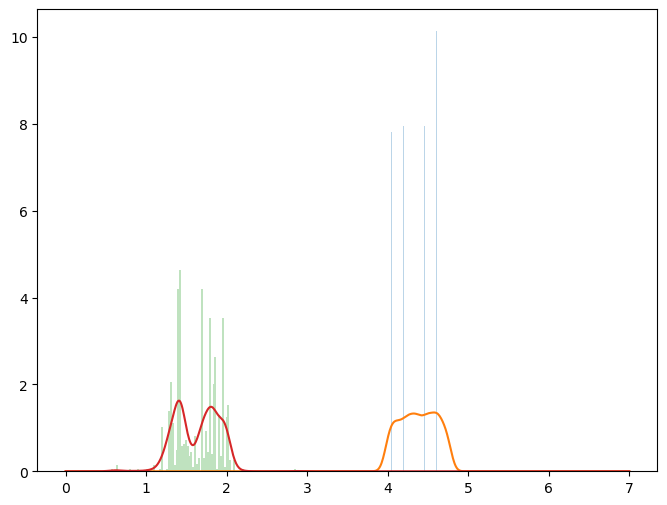

In [136]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

kde = stats.gaussian_kde(pre_sw_df['rating'])
line = np.linspace(0, 7, 768, endpoint=True)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(pre_sw_df['rating'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(pre_sw_df['display_size_inches'])
ax.hist(pre_sw_df['display_size_inches'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

plt.show()


In [137]:
pre_sw_df.columns

Index(['rating', 'wifi', 'GPS', 'NFC', 'voice_calling', 'Bluetooth',
       'Bluetooth_calling', 'display_size_inches', 'Touch', 'water_resistance',
       'dust_proof', 'scratch_resistance', 'heart_rate_monitor',
       'Blood_Pressure_monitor', 'calorie_count', 'sleep_monitor',
       'step_count', 'Pedometer', 'Blood_oxygen', 'Altimeter', 'alarm_clock',
       'stopwatch', 'reminder', 'timer', 'target'],
      dtype='object')

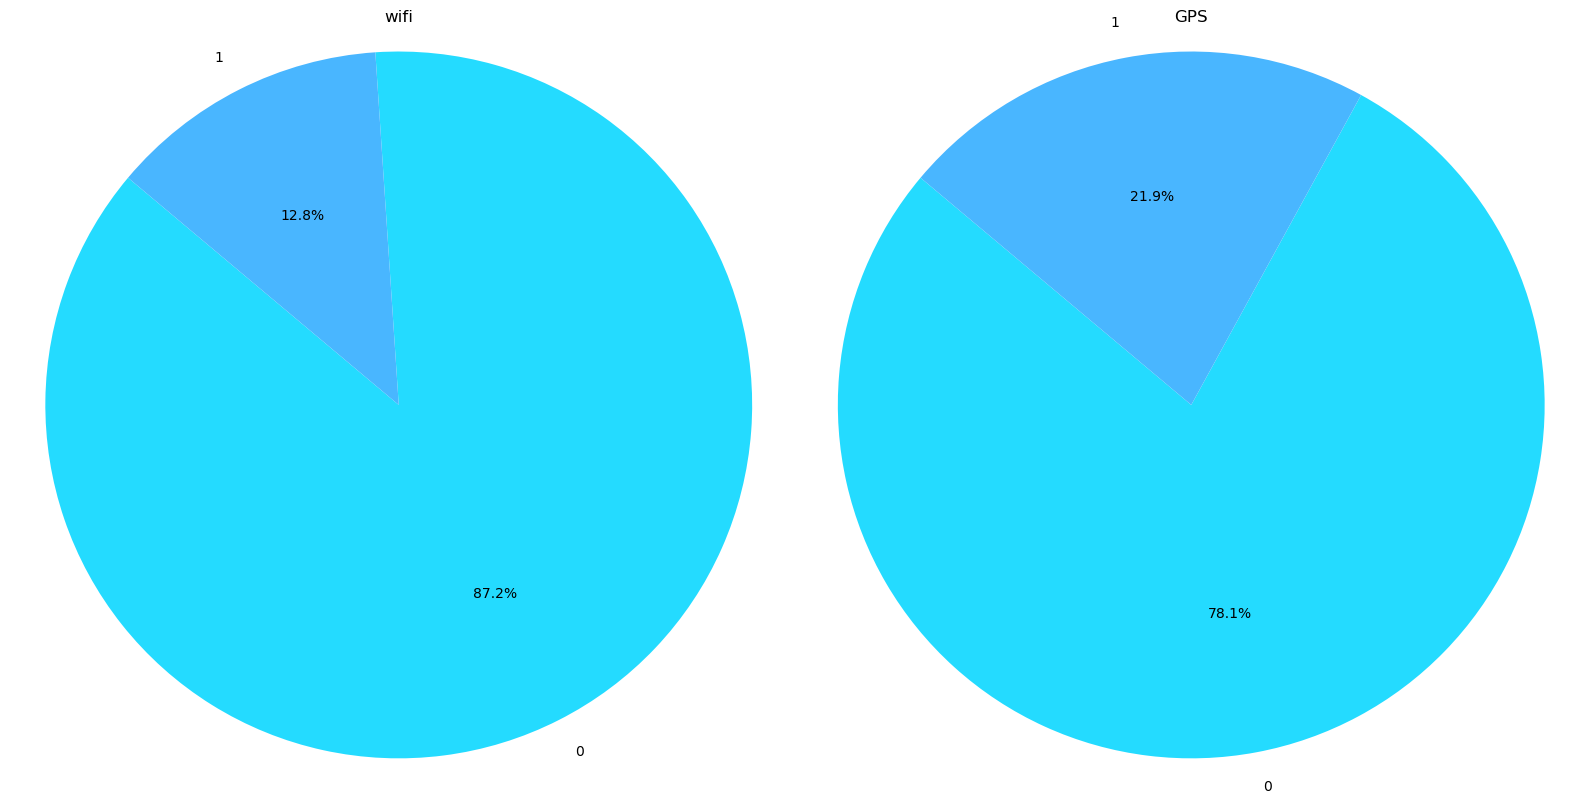

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

wifi_counts = pre_sw_df['wifi'].value_counts()
gps_counts = pre_sw_df['GPS'].value_counts()

axes[0].pie(wifi_counts, labels=wifi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('wifi')
axes[0].axis('equal')  

axes[1].pie(gps_counts, labels=gps_counts.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('GPS')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

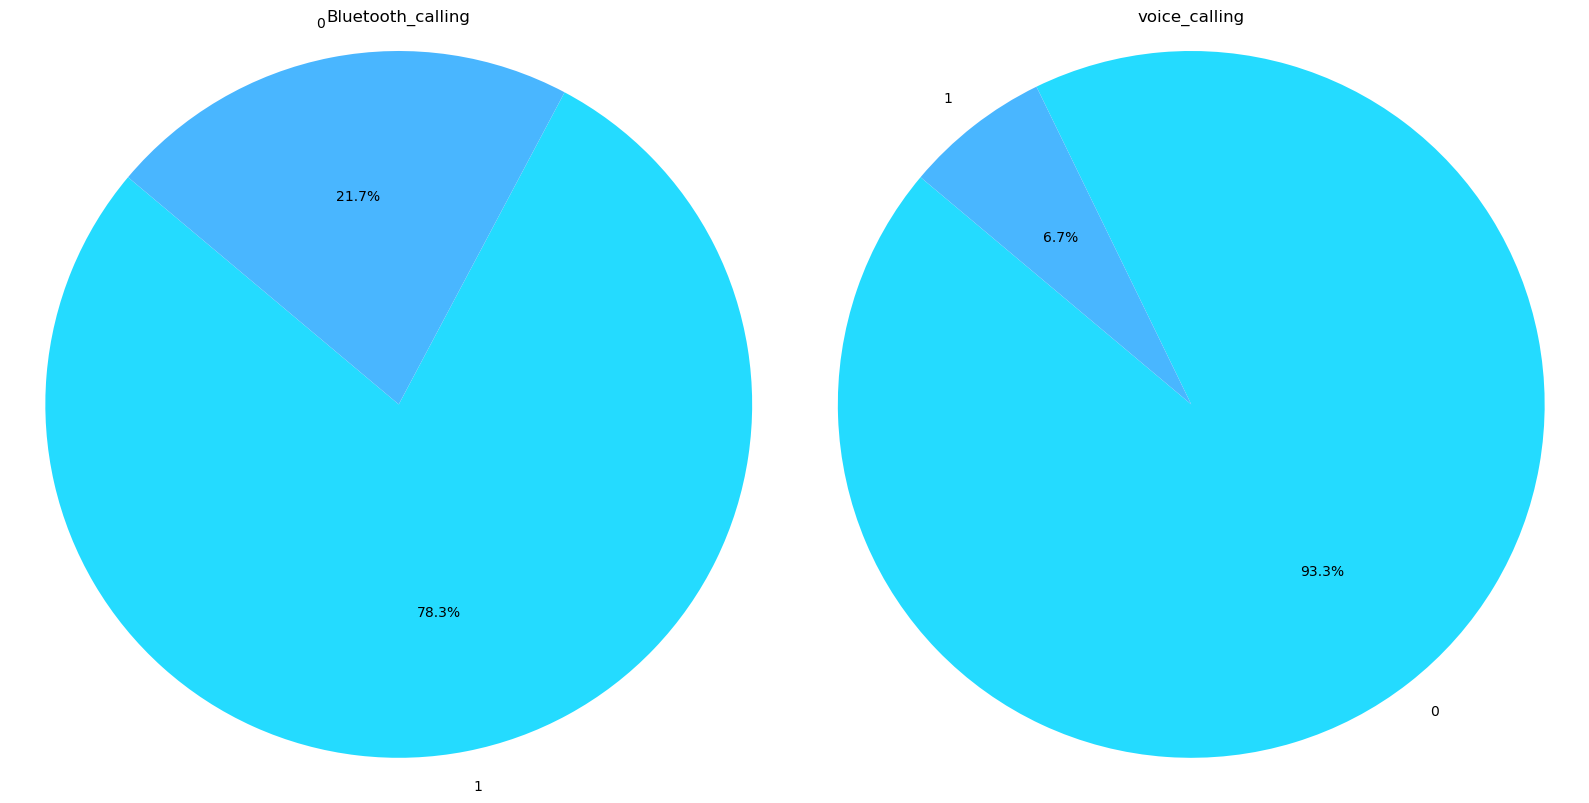

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

Bluetooth_calling = pre_sw_df['Bluetooth_calling'].value_counts()
voice_calling = pre_sw_df['voice_calling'].value_counts()

axes[0].pie(Bluetooth_calling, labels=Bluetooth_calling.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('Bluetooth_calling')
axes[0].axis('equal')  

axes[1].pie(voice_calling, labels=voice_calling.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('voice_calling')
axes[1].axis('equal')  
 

plt.tight_layout()
plt.show()

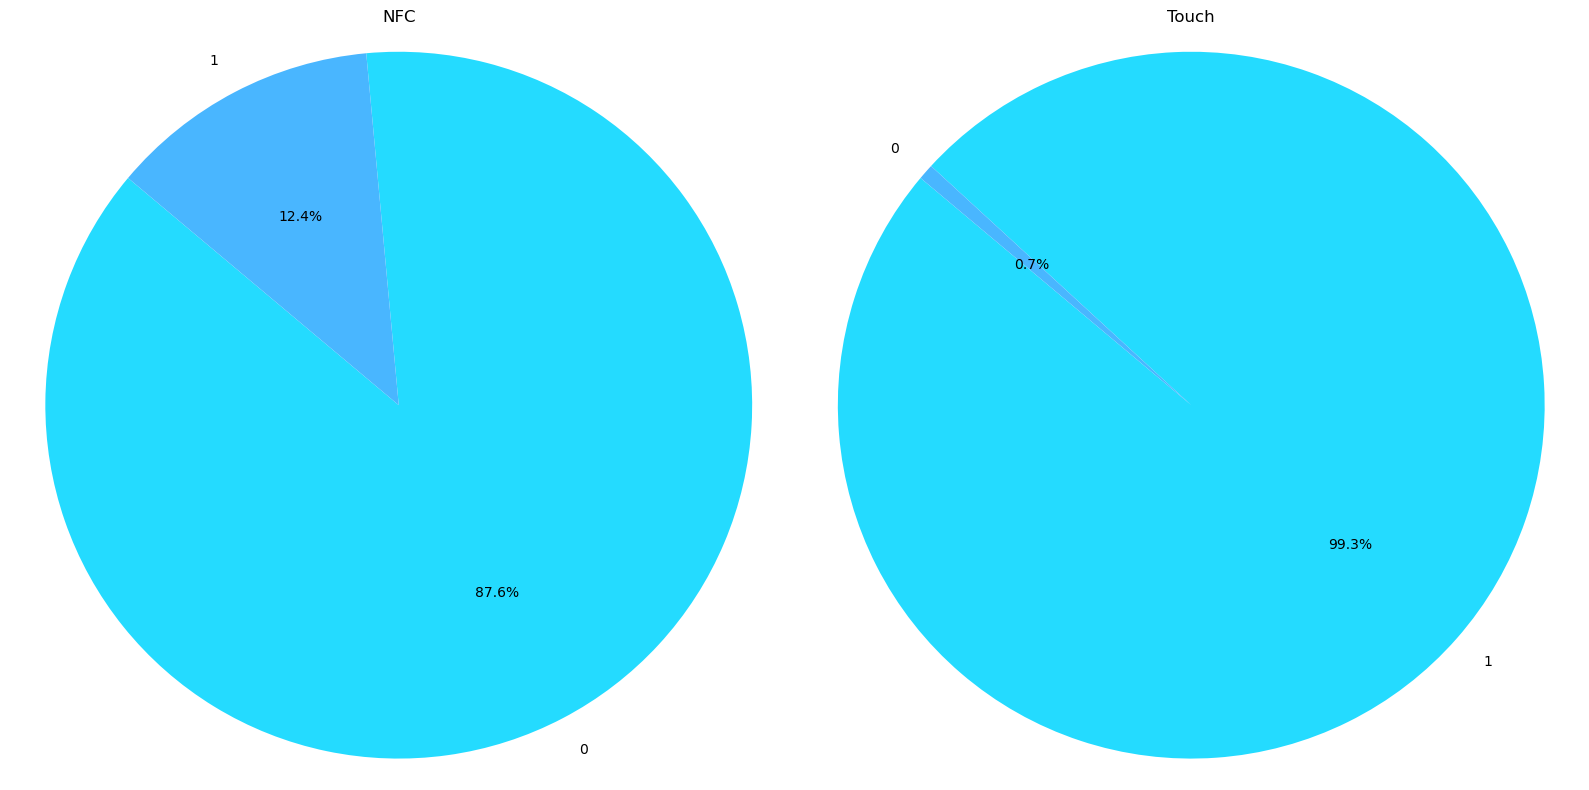

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

NFC = pre_sw_df['NFC'].value_counts()
Touch = pre_sw_df['Touch'].value_counts()

axes[0].pie(NFC, labels=NFC.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('NFC')
axes[0].axis('equal')  

axes[1].pie(Touch, labels=Touch.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('Touch')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

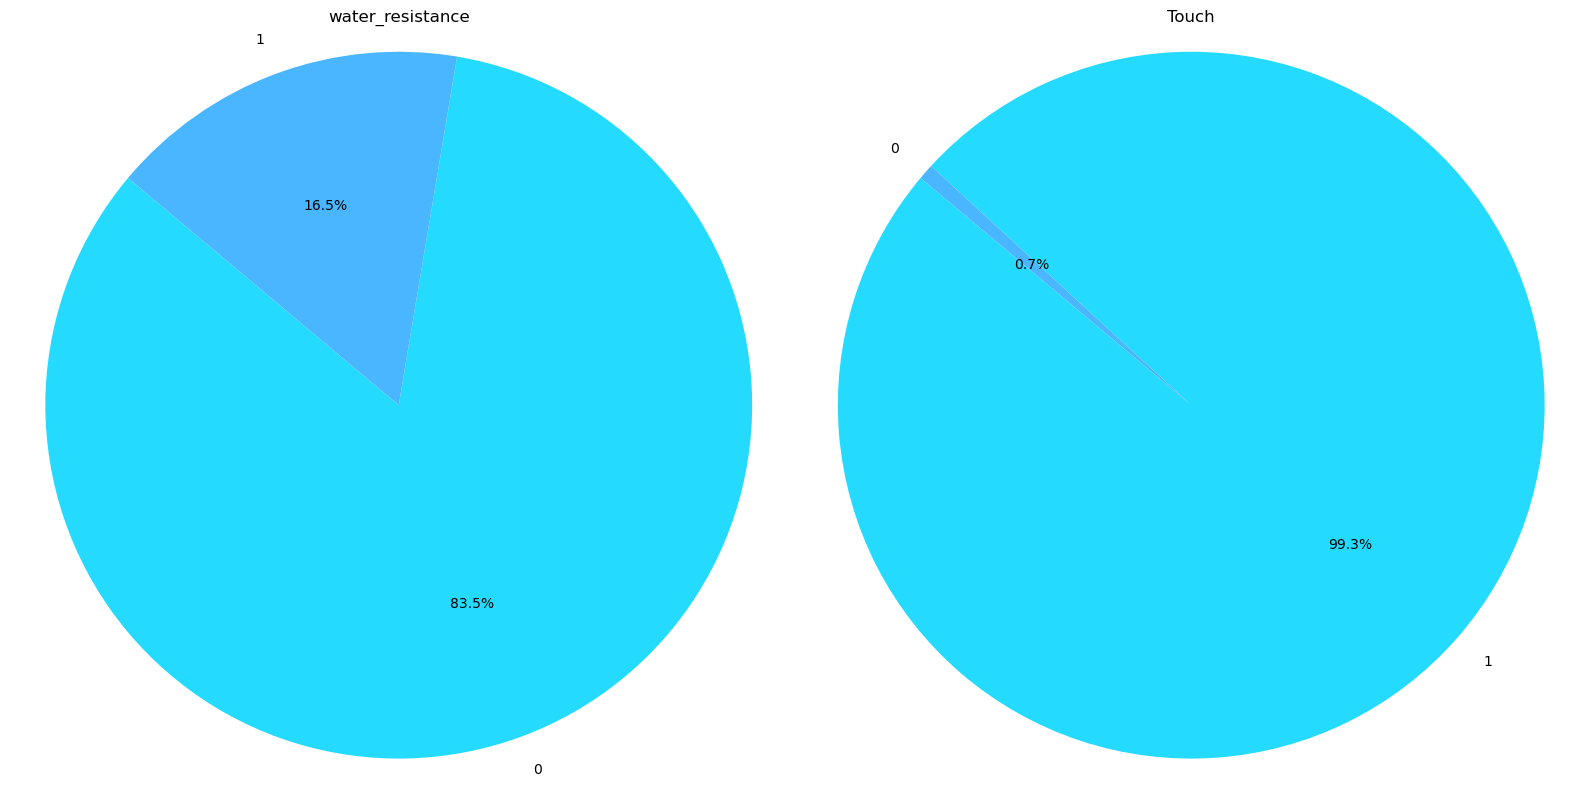

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

water_resistance = pre_sw_df['water_resistance'].value_counts()
Touch = pre_sw_df['Touch'].value_counts()

axes[0].pie(water_resistance, labels=water_resistance.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('water_resistance')
axes[0].axis('equal')  

axes[1].pie(Touch, labels=Touch.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('Touch')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

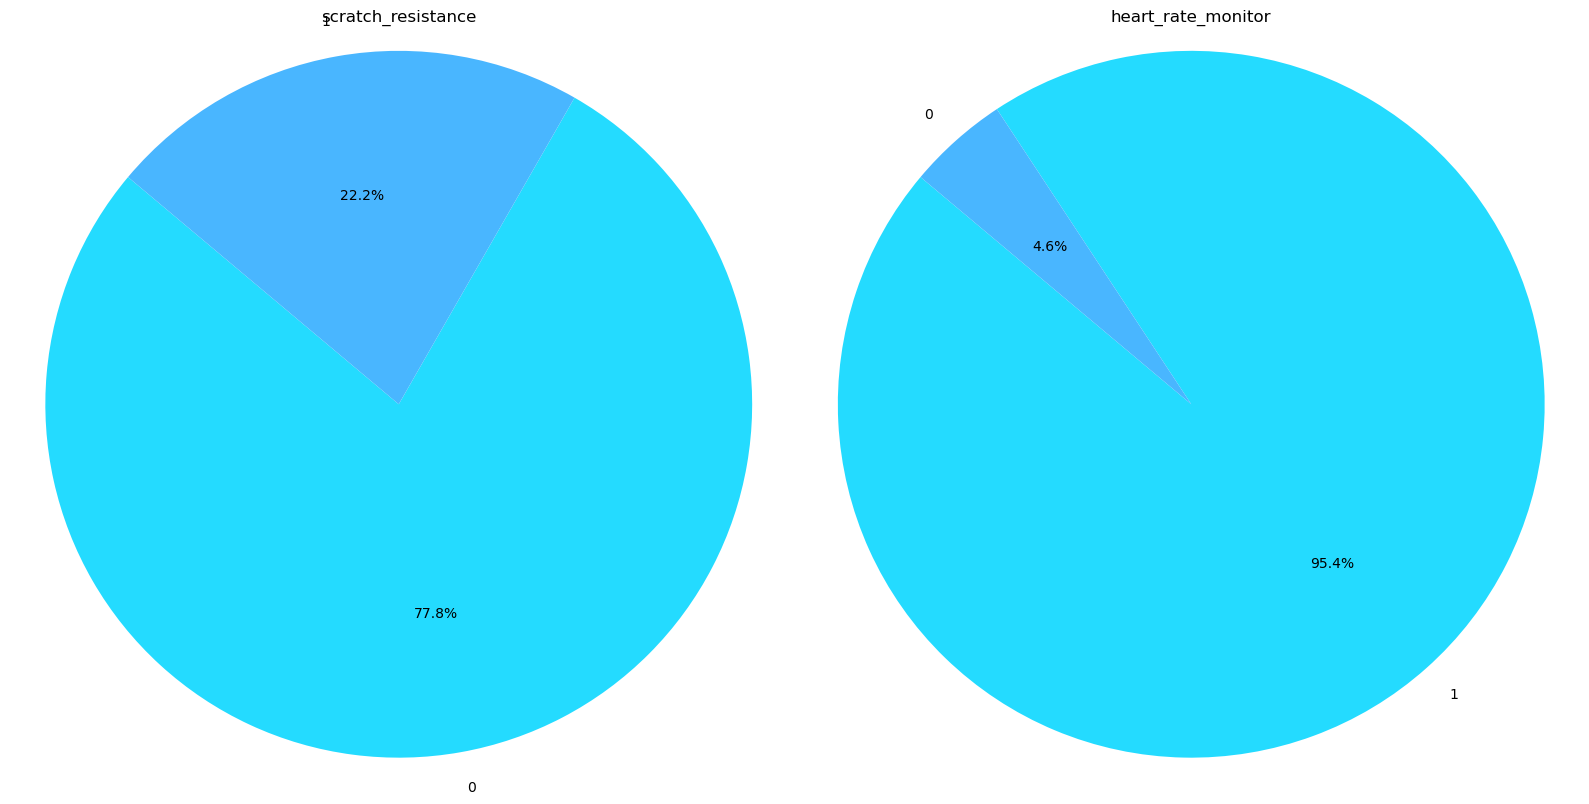

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

scratch_resistance = pre_sw_df['scratch_resistance'].value_counts()
heart_rate_monitor = pre_sw_df['heart_rate_monitor'].value_counts()

axes[0].pie(scratch_resistance, labels=scratch_resistance.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('scratch_resistance')
axes[0].axis('equal')  

axes[1].pie(heart_rate_monitor, labels=heart_rate_monitor.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('heart_rate_monitor')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

In [143]:
pre_sw_df.columns

Index(['rating', 'wifi', 'GPS', 'NFC', 'voice_calling', 'Bluetooth',
       'Bluetooth_calling', 'display_size_inches', 'Touch', 'water_resistance',
       'dust_proof', 'scratch_resistance', 'heart_rate_monitor',
       'Blood_Pressure_monitor', 'calorie_count', 'sleep_monitor',
       'step_count', 'Pedometer', 'Blood_oxygen', 'Altimeter', 'alarm_clock',
       'stopwatch', 'reminder', 'timer', 'target'],
      dtype='object')

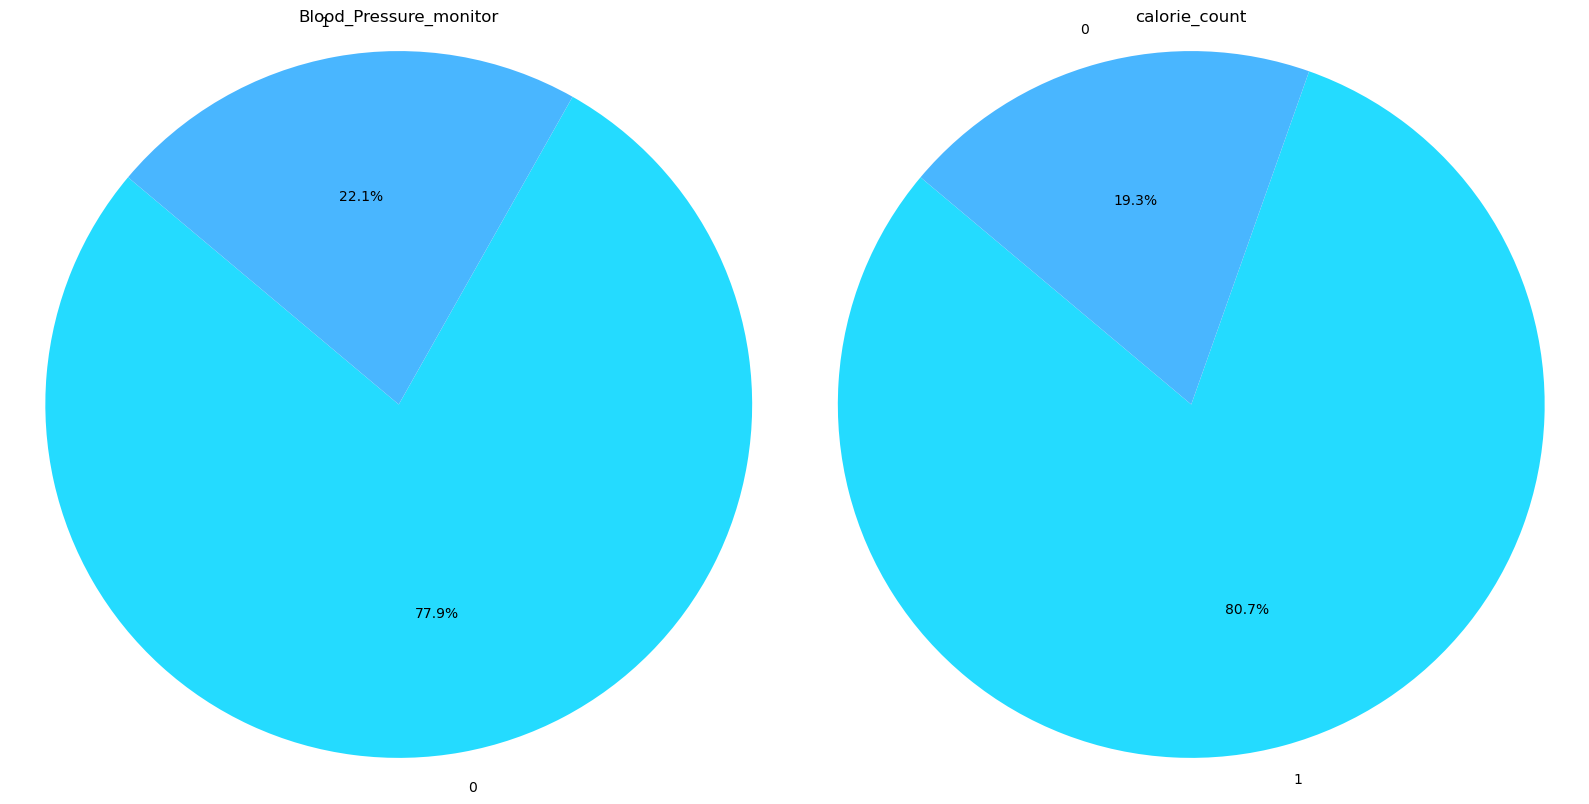

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

Blood_Pressure_monitor = pre_sw_df['Blood_Pressure_monitor'].value_counts()
calorie_count = pre_sw_df['calorie_count'].value_counts()

axes[0].pie(Blood_Pressure_monitor, labels=Blood_Pressure_monitor.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('Blood_Pressure_monitor')
axes[0].axis('equal')  

axes[1].pie(calorie_count, labels=calorie_count.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('calorie_count')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

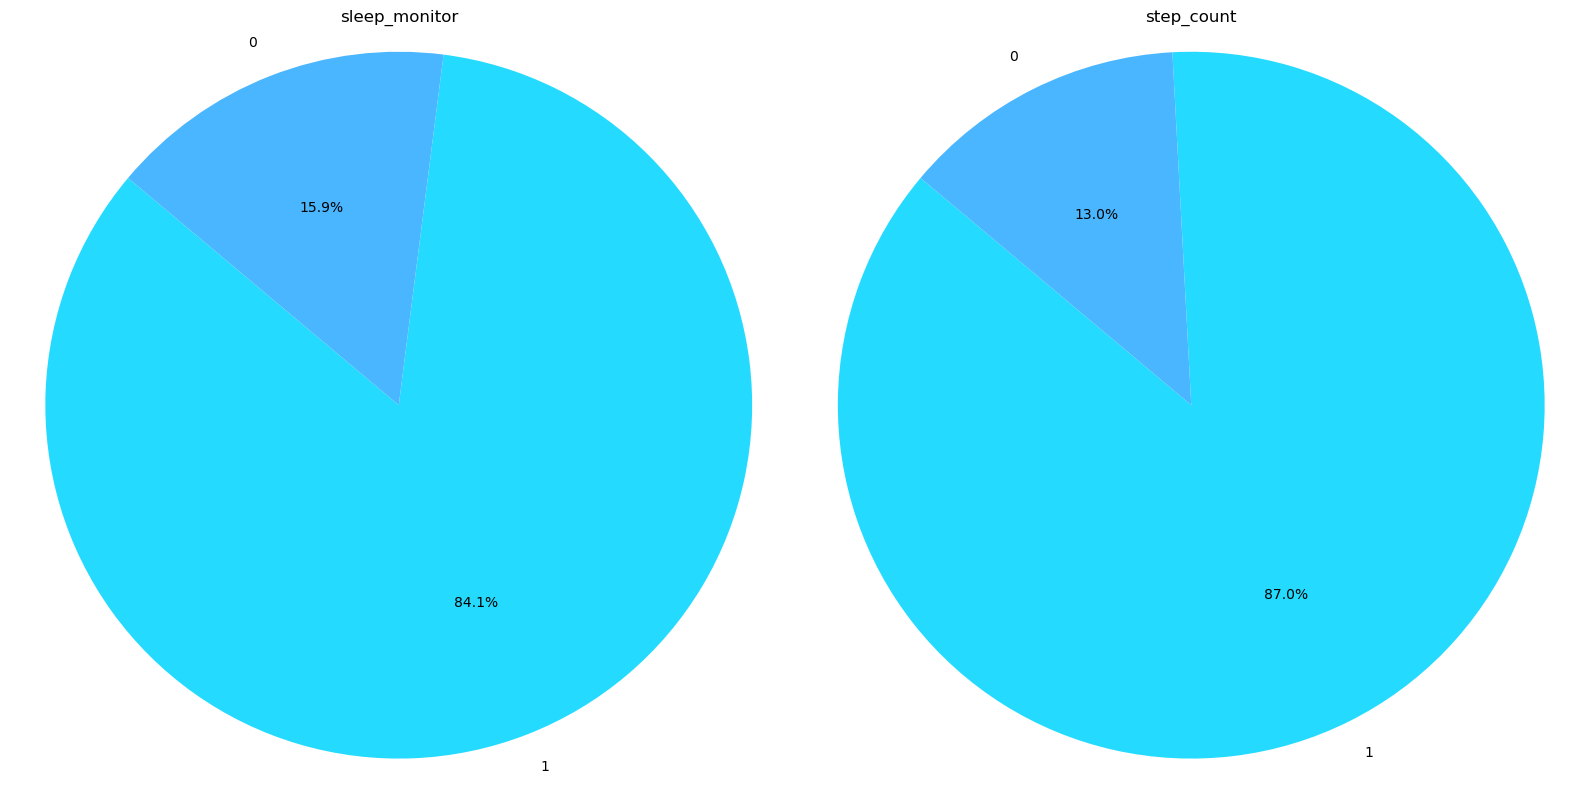

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

sleep_monitor = pre_sw_df['sleep_monitor'].value_counts()
step_count = pre_sw_df['step_count'].value_counts()

axes[0].pie(sleep_monitor, labels=sleep_monitor.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('sleep_monitor')
axes[0].axis('equal')  

axes[1].pie(step_count, labels=step_count.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('step_count')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

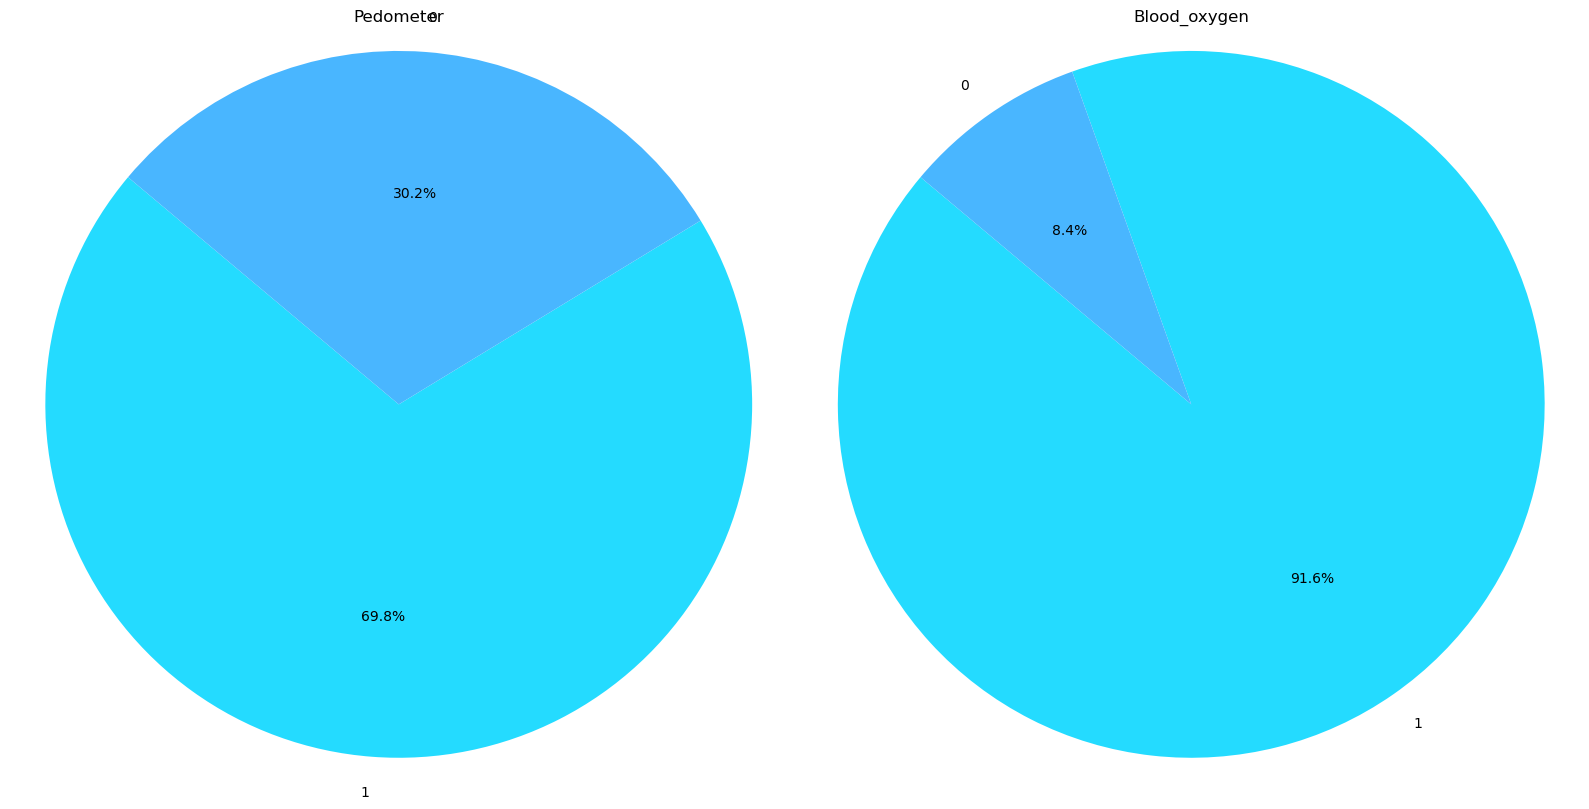

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

Pedometer = pre_sw_df['Pedometer'].value_counts()
Blood_oxygen = pre_sw_df['Blood_oxygen'].value_counts()

axes[0].pie(Pedometer, labels=Pedometer.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('Pedometer')
axes[0].axis('equal')  

axes[1].pie(Blood_oxygen, labels=Blood_oxygen.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('Blood_oxygen')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

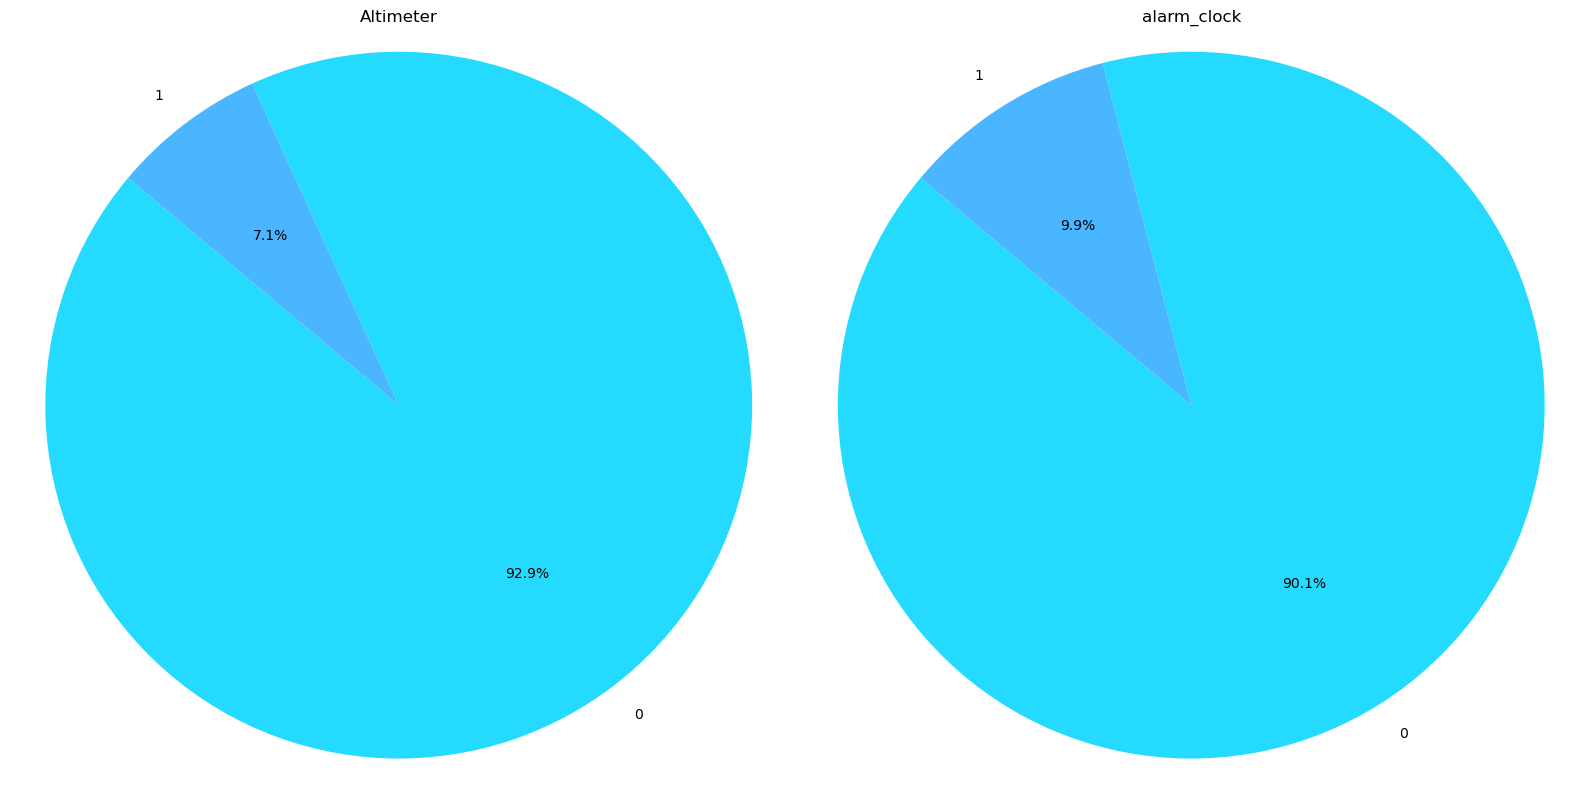

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

Altimeter = pre_sw_df['Altimeter'].value_counts()
alarm_clock = pre_sw_df['alarm_clock'].value_counts()

axes[0].pie(Altimeter, labels=Altimeter.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('Altimeter')
axes[0].axis('equal')  

axes[1].pie(alarm_clock, labels=alarm_clock.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('alarm_clock')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

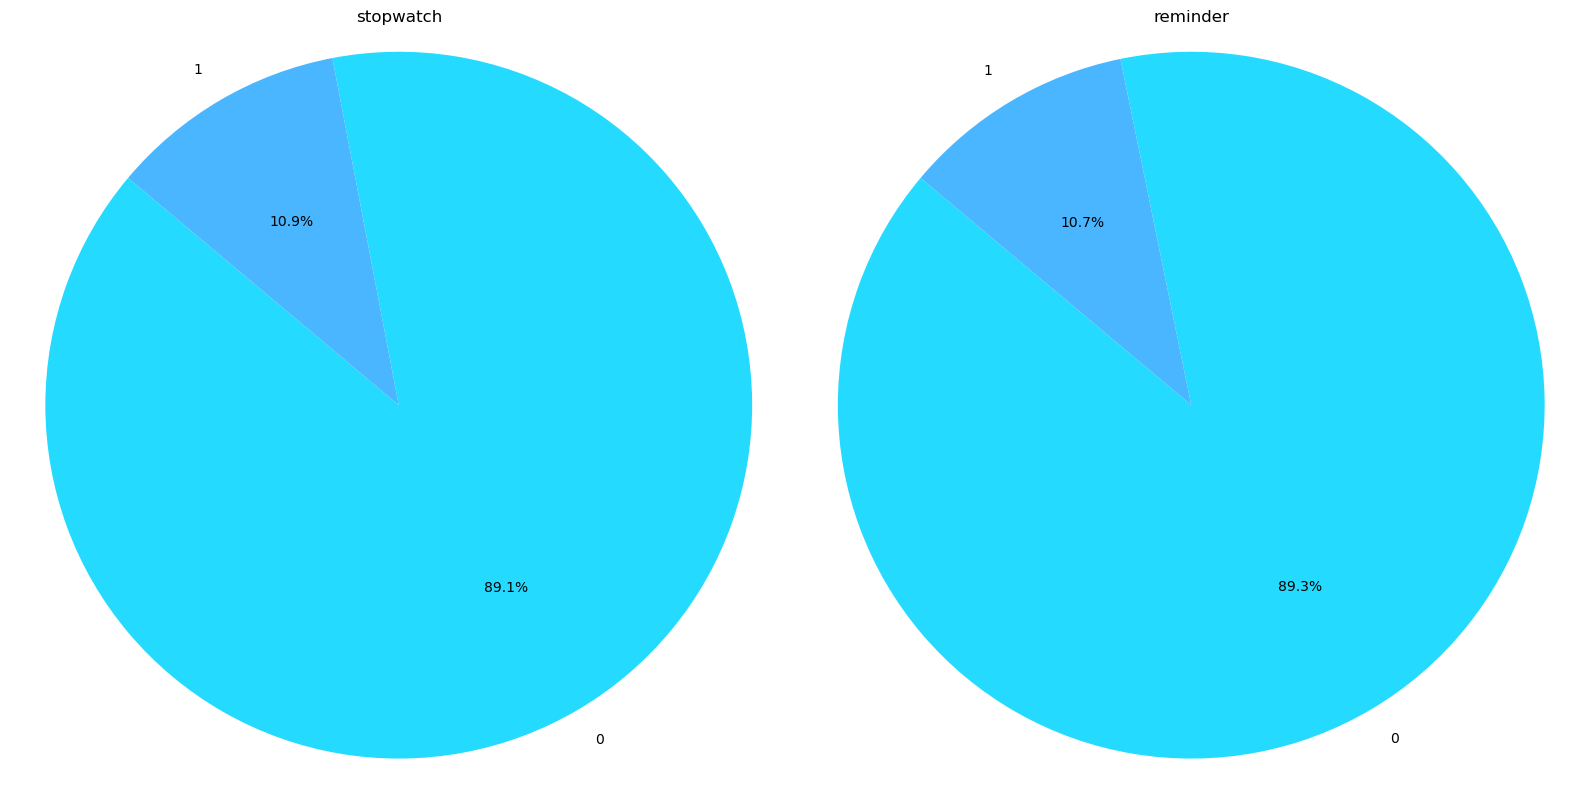

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

stopwatch = pre_sw_df['stopwatch'].value_counts()
reminder = pre_sw_df['reminder'].value_counts()

axes[0].pie(stopwatch, labels=stopwatch.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('stopwatch')
axes[0].axis('equal')  

axes[1].pie(reminder, labels=reminder.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('reminder')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

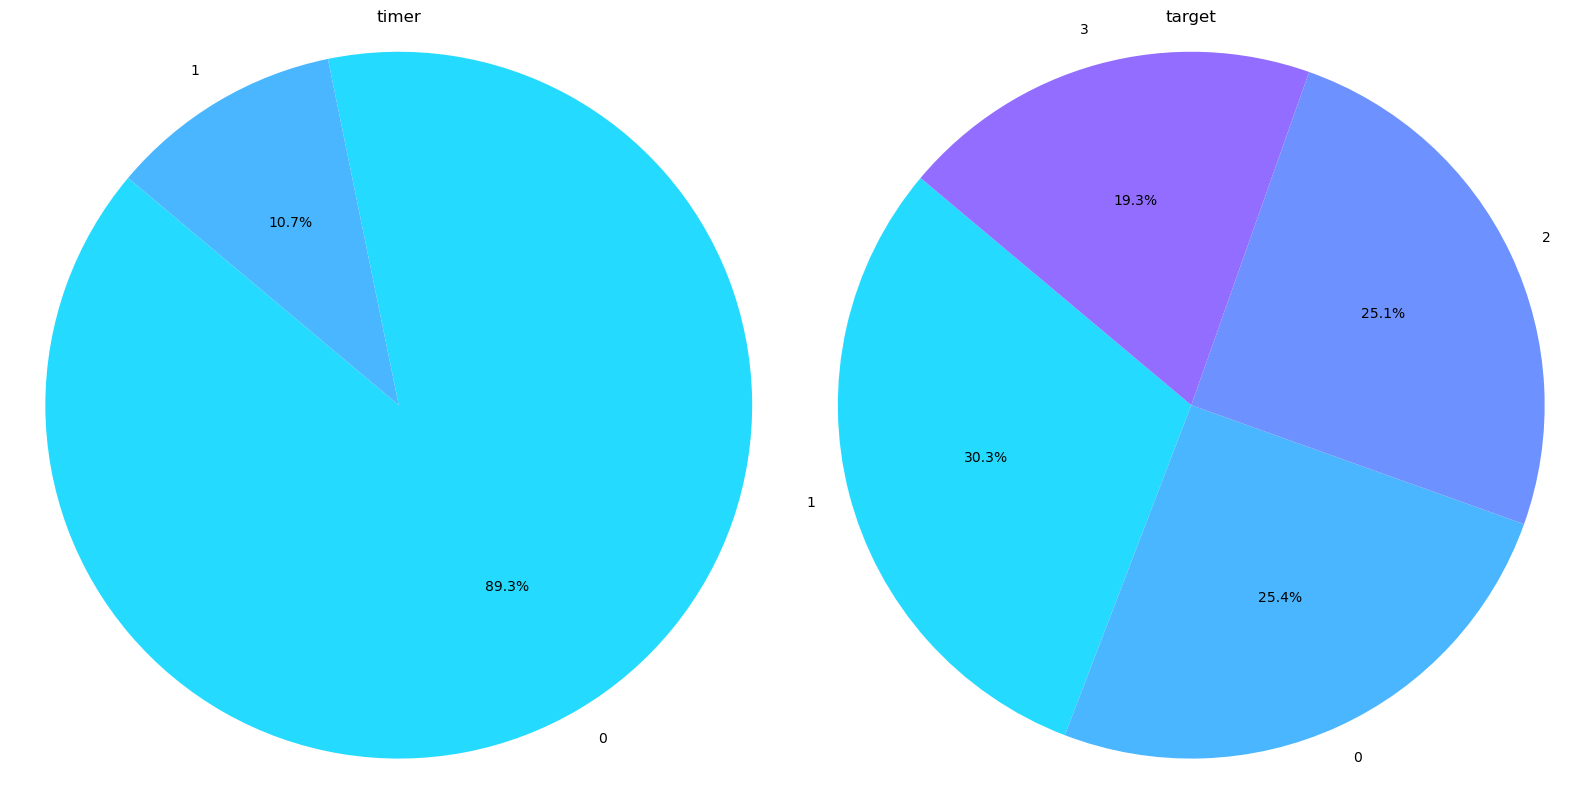

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 8))

timer = pre_sw_df['timer'].value_counts()
target = pre_sw_df['target'].value_counts()

axes[0].pie(timer, labels=timer.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[0].set_title('timer')
axes[0].axis('equal')  

axes[1].pie(target, labels=target.index, autopct='%1.1f%%', colors=sns.color_palette('cool'), startangle=140)
axes[1].set_title('target')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

### 상관관계확인

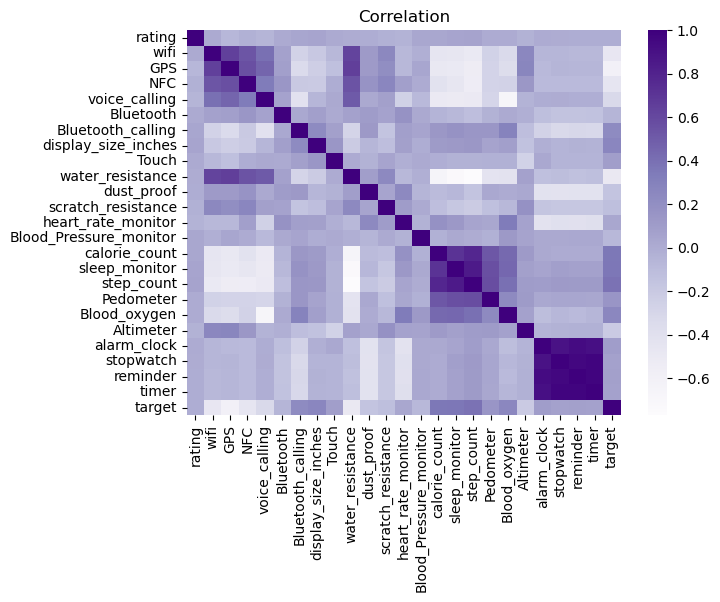

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = pre_sw_df.corr()
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [152]:
corr['target'].sort_values(ascending=False)[1:]

step_count                0.389119
sleep_monitor             0.365384
calorie_count             0.362253
display_size_inches       0.261038
Blood_oxygen              0.255372
Bluetooth_calling         0.227008
Pedometer                 0.154860
alarm_clock               0.097993
Touch                     0.087840
reminder                  0.078741
timer                     0.072485
stopwatch                 0.069505
heart_rate_monitor        0.037888
rating                   -0.007748
Bluetooth                -0.053917
Blood_Pressure_monitor   -0.075317
scratch_resistance       -0.122590
dust_proof               -0.158927
Altimeter                -0.204925
voice_calling            -0.316998
NFC                      -0.457877
wifi                     -0.467529
water_resistance         -0.490642
GPS                      -0.594945
Name: target, dtype: float64

어느정도의 상관성이 있을 것이라고 판단.

In [153]:
pre_sw_df.target.value_counts()

target
1    295
0    247
2    244
3    188
Name: count, dtype: int64

### 🚩1 Cycle

타겟데이터 분포 확인. 불균형 확인 
- 1. 오버 샘플링 진행
  2. DTC, SVC, XGB, LightGBM 4개의 모델에 대해서 값을 확인
  3. 값을 확인 후 permutation 진행해서 변수 확인


#### 0. 오차행렬 함수 선언

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='micro')
    recall = recall_score(y_test , prediction, average='micro')
    f1 = f1_score(y_test, prediction, average='micro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()

### 1. 오버 샘플링

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = pre_sw_df.iloc[:, :-1], pre_sw_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

target
0    236
1    236
2    236
3    236
Name: count, dtype: int64

### 2. 모델 적용

#### 1) DTC

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_parameters = {
    'max_depth' : [3,4,5,6,7,8,9], 'min_samples_split': [3,4,5,6,7,8,9]
}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [159]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [160]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(dtc_result_df)

params  mean_test_score  rank_test_score
0   {'max_depth': 3, 'min_samples_split': 3}         0.507419               29
1   {'max_depth': 3, 'min_samples_split': 4}         0.507419               29
2   {'max_depth': 3, 'min_samples_split': 5}         0.507419               29
3   {'max_depth': 3, 'min_samples_split': 6}         0.507419               29
4   {'max_depth': 3, 'min_samples_split': 7}         0.507419               29
5   {'max_depth': 3, 'min_samples_split': 8}         0.507419               29
6   {'max_depth': 3, 'min_samples_split': 9}         0.507419               29
7   {'max_depth': 4, 'min_samples_split': 3}         0.493662               47
8   {'max_depth': 4, 'min_samples_split': 4}         0.492604               48
9   {'max_depth': 4, 'min_samples_split': 5}         0.492604               48
10  {'max_depth': 4, 'min_samples_split': 6}         0.496837               42
11  {'max_depth': 4, 'min_samples_split': 7}         0.496837               42
12  {'max_depth': 4, 'min_samples_split': 8}         0.496837               42
13  {'max_depth': 4, 'min_samples_split': 9}         0.496837               42
14  {'max_depth': 5, 'min_samples_split': 3}         0.496825               46
15  {'max_depth': 5, 'min_samples_split': 4}         0.500000               38
16  {'max_depth': 5, 'min_samples_split': 5}         0.497884               41
17  {'max_depth': 5, 'min_samples_split': 6}         0.500000               38
18  {'max_depth': 5, 'min_samples_split': 7}         0.501058               36
19  {'max_depth': 5, 'min_samples_split': 8}         0.500000               38
20  {'max_depth': 5, 'min_samples_split': 9}         0.501058               36
21  {'max_depth': 6, 'min_samples_split': 3}         0.518051               22
22  {'max_depth': 6, 'min_samples_split': 4}         0.519110               19
23  {'max_depth': 6, 'min_samples_split': 5}         0.519110               19
24  {'max_depth': 6, 'min_samples_split': 6}         0.522284               12
25  {'max_depth': 6, 'min_samples_split': 7}         0.523342                9
26  {'max_depth': 6, 'min_samples_split': 8}         0.523342                9
27  {'max_depth': 6, 'min_samples_split': 9}         0.521226               15
28  {'max_depth': 7, 'min_samples_split': 3}         0.524378                5
29  {'max_depth': 7, 'min_samples_split': 4}         0.524378                5
30  {'max_depth': 7, 'min_samples_split': 5}         0.522267               13
31  {'max_depth': 7, 'min_samples_split': 6}         0.527558                3
32  {'max_depth': 7, 'min_samples_split': 7}         0.530727                1
33  {'max_depth': 7, 'min_samples_split': 8}         0.528611                2
34  {'max_depth': 7, 'min_samples_split': 9}         0.526489                4
35  {'max_depth': 8, 'min_samples_split': 3}         0.523320               11
36  {'max_depth': 8, 'min_samples_split': 4}         0.520145               17
37  {'max_depth': 8, 'min_samples_split': 5}         0.520140               18
38  {'max_depth': 8, 'min_samples_split': 6}         0.521192               16
39  {'max_depth': 8, 'min_samples_split': 7}         0.524372                7
40  {'max_depth': 8, 'min_samples_split': 8}         0.522250               14
41  {'max_depth': 8, 'min_samples_split': 9}         0.524361                8
42  {'max_depth': 9, 'min_samples_split': 3}         0.518029               23
43  {'max_depth': 9, 'min_samples_split': 4}         0.513790               26
44  {'max_depth': 9, 'min_samples_split': 5}         0.516959               24
45  {'max_depth': 9, 'min_samples_split': 6}         0.510610               28
46  {'max_depth': 9, 'min_samples_split': 7}         0.519070               21
47  {'max_depth': 9, 'min_samples_split': 8}         0.515896               25
48  {'max_depth': 9, 'min_samples_split': 9}         0.511651               27

In [161]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

오차 행렬
[[35 10  1  3]
 [ 3 26 17 13]
 [ 1 13 16 19]
 [ 0  9 14 15]]
정확도: 0.4718, 정밀도: 0.4718, 재현율: 0.4718, F1: 0.4718
################################################################################


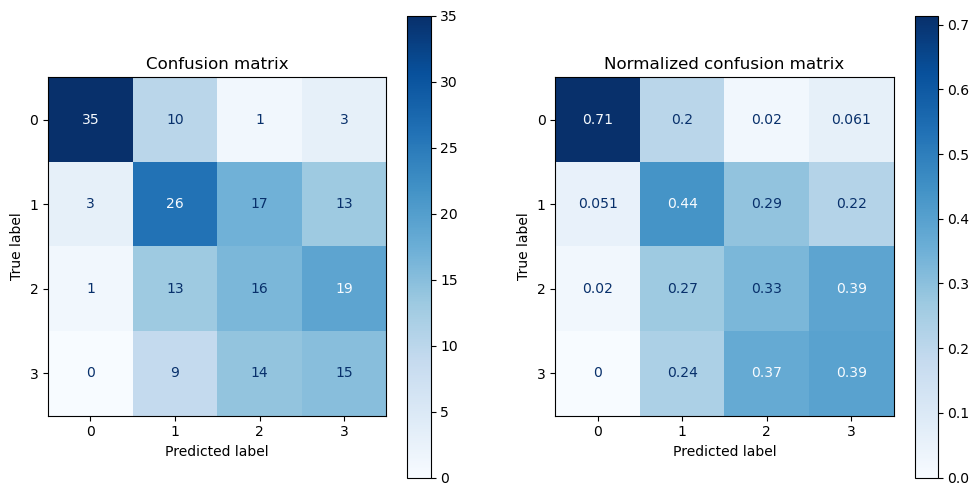

In [162]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

#### 2) SVC

In [164]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_parameters={
    'C': [0.01,0.1,1,10,100,1000],
    'gamma': [0.001,0.01,0.1,1,10,100],
    'kernel': ['linear', 'rbf']
}

svc=SVC(probability=True)

g_svc= GridSearchCV(svc, param_grid=svc_parameters, cv=4, refit=True, return_train_score=True, n_jobs=-1)

In [165]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=4, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [166]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)


params  mean_test_score  \
0   {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}         0.438559   
1      {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}         0.386653   
2    {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}         0.438559   
3       {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}         0.372881   
4     {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}         0.438559   
..                                              ...              ...   
67         {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}         0.525424   
68     {'C': 1000, 'gamma': 10, 'kernel': 'linear'}         0.501059   
69        {'C': 1000, 'gamma': 10, 'kernel': 'rbf'}         0.447034   
70    {'C': 1000, 'gamma': 100, 'kernel': 'linear'}         0.501059   
71       {'C': 1000, 'gamma': 100, 'kernel': 'rbf'}         0.431144   

    rank_test_score  
0                52  
1                66  
2                52  
3                71  
4                52  
..              ...  
67                7  
68               24  
69               49  
70               24  
71               59  

[72 rows x 3 columns]

In [167]:
svc_result_df[svc_result_df.rank_test_score == 1]

params  mean_test_score  rank_test_score
43  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}          0.54661                1

In [168]:
svc_result_df[svc_result_df.rank_test_score == 2]

params  mean_test_score  rank_test_score
55  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}         0.539195                2

In [169]:
svc_result_df[svc_result_df.rank_test_score == 3]

params  mean_test_score  \
31       {'C': 1, 'gamma': 1, 'kernel': 'rbf'}          0.53072   
53   {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}          0.53072   
65  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}          0.53072   

    rank_test_score  
31                3  
53                3  
65                3

데이터의 분포가 non_linear하다.

In [170]:
svc = g_svc.best_estimator_
svc_prediction = svc.predict(X_test)

오차 행렬
[[37  6  4  2]
 [ 8 26 10 15]
 [ 4 19 15 11]
 [ 3 16  9 10]]
정확도: 0.4513, 정밀도: 0.4513, 재현율: 0.4513, F1: 0.4513
################################################################################


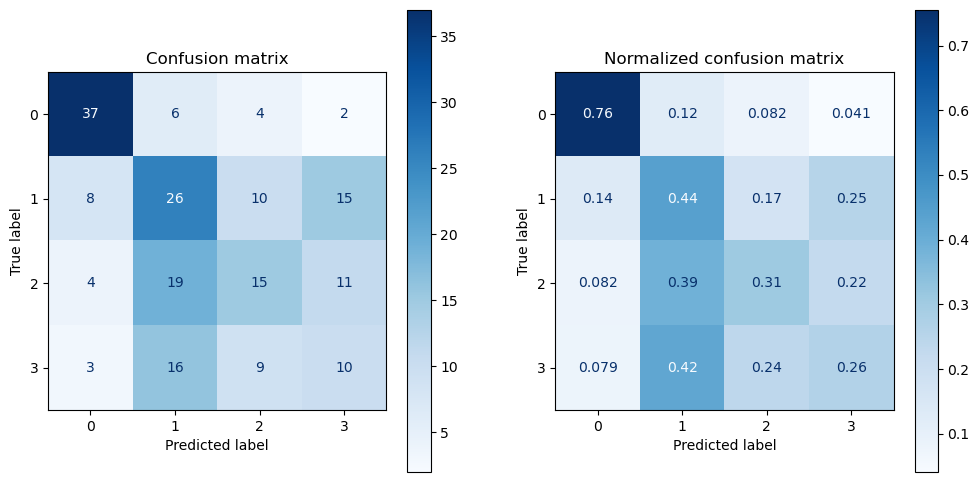

In [171]:
get_evaluation(y_test, svc_prediction, svc, X_test)

성능이 좋지 않게 나타남.

#### 3) XGBoost

In [172]:
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)


evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]


In [173]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators' : [50,60,70,80,90,100],
    'learning_rate' : [0.1,0.2,0.3]
}

xgb= XGBClassifier()
g_xgb = GridSearchCV(
    xgb,
    param_grid=xgb_parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

In [174]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.19837	validation_1-mlogloss:1.20269
[1]	validation_0-mlogloss:1.07632	validation_1-mlogloss:1.08348
[2]	validation_0-mlogloss:0.99344	validation_1-mlogloss:1.00820
[3]	validation_0-mlogloss:0.92864	validation_1-mlogloss:0.94942
[4]	validation_0-mlogloss:0.88008	validation_1-mlogloss:0.90505
[5]	validation_0-mlogloss:0.84002	validation_1-mlogloss:0.86554
[6]	validation_0-mlogloss:0.81068	validation_1-mlogloss:0.83553
[7]	validation_0-mlogloss:0.77793	validation_1-mlogloss:0.80543
[8]	validation_0-mlogloss:0.75510	validation_1-mlogloss:0.78701
[9]	validation_0-mlogloss:0.73473	validation_1-mlogloss:0.75629
[10]	validation_0-mlogloss:0.71431	validation_1-mlogloss:0.72967
[11]	validation_0-mlogloss:0.69631	validation_1-mlogloss:0.71321
[12]	validation_0-mlogloss:0.67851	validation_1-mlogloss:0.69371
[13]	validation_0-mlogloss:0.66277	validation_1-mlogloss:0.67807
[14]	validation_0-mlogloss:0.64565	validation_1-mlogloss:0.65852
[15]	validation_0-mlogloss:0.63178	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-mlogloss:0.32958	validation_1-mlogloss:0.32886
[52]	validation_0-mlogloss:0.32459	validation_1-mlogloss:0.32167
[53]	validation_0-mlogloss:0.32018	validation_1-mlogloss:0.31646
[54]	validation_0-mlogloss:0.31434	validation_1-mlogloss:0.31099
[55]	validation_0-mlogloss:0.31051	validation_1-mlogloss:0.30749
[56]	validation_0-mlogloss:0.30678	validation_1-mlogloss:0.30275
[57]	validation_0-mlogloss:0.30233	validation_1-mlogloss:0.29883
[58]	validation_0-mlogloss:0.29770	validation_1-mlogloss:0.29548
[59]	validation_0-mlogloss:0.29302	validation_1-mlogloss:0.29036
[60]	validation_0-mlogloss:0.28945	validation_1-mlogloss:0.28561
[61]	validation_0-mlogloss:0.28567	validation_1-mlogloss:0.28205
[62]	validation_0-mlogloss:0.28120	validation_1-mlogloss:0.27506
[63]	validation_0-mlogloss:0.27717	validation_1-mlogloss:0.27231
[64]	validation_0-mlogloss:0.27292	validation_1-mlogloss:0.26930
[65]	validation_0-mlogloss:0.26939	validation_1-mlogloss:0.26548
[66]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [175]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.577389   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.581622   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.586936   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.594332   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.590071   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.593251   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.580536   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.571006   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.576320   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.576337   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.576337   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.580570   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.592204   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.592215   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.593291   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.594332   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.594349   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.594343   

    rank_test_score  
0                14  
1                11  
2                10  
3                 3  
4                 9  
5                 6  
6                13  
7                18  
8                17  
9                15  
10               15  
11               12  
12                8  
13                7  
14                5  
15                3  
16                1  
17                2

In [176]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)


오차 행렬
[[35  7  6  1]
 [ 6 24 13 16]
 [ 4  8 25 12]
 [ 0 11 17 10]]
정확도: 0.4821, 정밀도: 0.4821, 재현율: 0.4821, F1: 0.4821
################################################################################


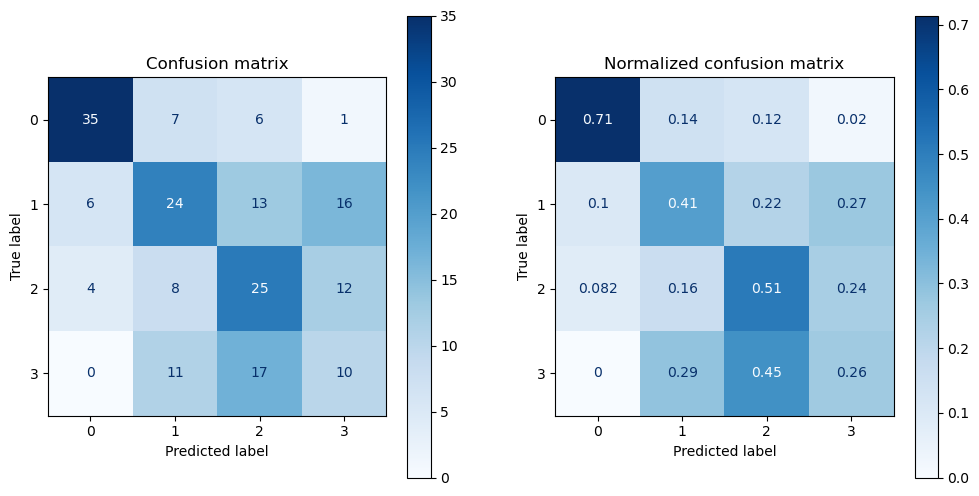

In [177]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

#### 4) LightGBM 

In [179]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, refit=True, return_train_score=True, n_jobs=-1)

In [180]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 23
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [181]:
std_lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(std_lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.578419   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.582647   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.581588   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.585832   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.590065   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.574187   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.591146   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.583710   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.586902   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.586896   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.592193   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.587971   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.581617   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.580553   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.575267   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.586913   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.580564   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.576331   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.575273   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.575273   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.585844   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.578442   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.579511   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.581622   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.581622   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.578419   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.579489   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.569959   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.566785   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.566785   

    rank_test_score  
0                21  
1                11  
2                15  
3                 9  
4                 3  
5                27  
6                 2  
7                10  
8                 6  
9                 7  
10                1  
11                4  
12               14  
13               17  
14               26  
15                5  
16               16  
17               23  
18               24  
19               24  
20                8  
21               20  
22               18  
23               12  
24               13  
25               21  
26               19  
27               28  
28               29  
29               29

In [182]:
std_lgbm = g_lgbm.best_estimator_
std_lgbm_prediction = std_lgbm.predict(X_test)

오차 행렬
[[36  7  6  0]
 [ 3 29 15 12]
 [ 4 10 24 11]
 [ 0 10 19  9]]
정확도: 0.5026, 정밀도: 0.5026, 재현율: 0.5026, F1: 0.5026
################################################################################


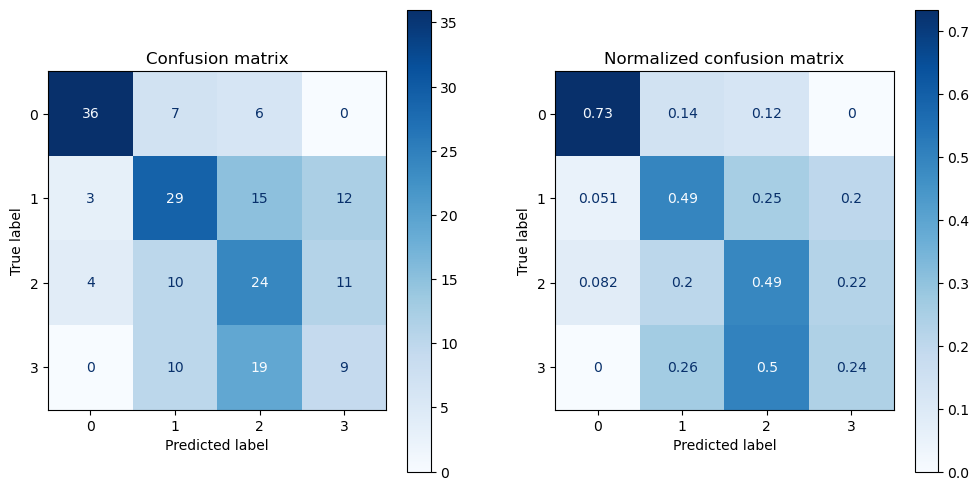

In [183]:
get_evaluation(y_test, std_lgbm_prediction, std_lgbm, X_test)

### 👉1 Cycle 결과

- DTC
<img src='./sw_images/1.png' width='700px'>
- SVC
<img src='./sw_images/2.png' width='700px'>
- XGBoost
<img src='./sw_images/3.png' width='700px'>
- LightGBM
<img src='./sw_images/4.png' width='700px'>

- LightGBM을 포함하여 모든 모델들은 점수가 매우 안좋게 나왔다.
- 평가점수가 0.5점을 넘지못하는 것으로 보아 이는 모델의 예측이 패턴을 나타내지 못한다라고 판단했다.
- 전처리 과정을 진행했다.

### 🚩2 Cycle 

- 상관관계와 중요도가 낮은 feature를 제거

In [184]:
pre_sw_df

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
3      4.35     0    0    0              0          7                  1   
4      4.05     1    1    1              0          5                  1   
..      ...   ...  ...  ...            ...        ...                ...   
969    4.70     0    0    0              0          5                  1   
970    4.05     0    0    0              0          5                  0   
971    4.30     0    0    0              0          5                  1   
972    4.35     0    0    0              0          5                  1   
973    4.20     0    0    0              0          6                  0   

     display_size_inches  Touch  water_resistance  ...  sleep_monitor  \
0                   1.43      1                 1  ...              0   
1                   2.02      1                 1  ...              0   
2                   1.40      1                 1  ...              0   
3                   1.43      1                 0  ...              1   
4                   1.43      1                 1  ...              0   
..                   ...    ...               ...  ...            ...   
969                 1.70      1                 0  ...              1   
970                 1.30      1                 0  ...              1   
971                 1.69      1                 0  ...              1   
972                 1.70      1                 0  ...              1   
973                 1.40      1                 0  ...              1   

     step_count  Pedometer  Blood_oxygen  Altimeter  alarm_clock  stopwatch  \
0             0          0             1          0            0          0   
1             0          0             1          0            0          0   
2             0          0             1          0            0          0   
3             1          1             1          0            0          0   
4             0          0             1          0            0          0   
..          ...        ...           ...        ...          ...        ...   
969           1          1             1          0            0          0   
970           1          1             1          0            0          0   
971           1          1             1          0            0          0   
972           1          0             1          0            0          0   
973           1          0             1          0            0          0   

     reminder  timer  target  
0           0      0       0  
1           0      0       0  
2           0      0       0  
3           0      0       1  
4           0      0       0  
..        ...    ...     ...  
969         0      0       1  
970         0      0       3  
971         0      0       1  
972         0      0       1  
973         0      0       2  

[974 rows x 25 columns]

상관관계와 순열을 통해 feature importance 확인

In [185]:
corr['target'].sort_values(ascending=False)[1:]

step_count                0.389119
sleep_monitor             0.365384
calorie_count             0.362253
display_size_inches       0.261038
Blood_oxygen              0.255372
Bluetooth_calling         0.227008
Pedometer                 0.154860
alarm_clock               0.097993
Touch                     0.087840
reminder                  0.078741
timer                     0.072485
stopwatch                 0.069505
heart_rate_monitor        0.037888
rating                   -0.007748
Bluetooth                -0.053917
Blood_Pressure_monitor   -0.075317
scratch_resistance       -0.122590
dust_proof               -0.158927
Altimeter                -0.204925
voice_calling            -0.316998
NFC                      -0.457877
wifi                     -0.467529
water_resistance         -0.490642
GPS                      -0.594945
Name: target, dtype: float64

In [186]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([ 5,  2, 13,  3, 18, 17, 10, 23, 22, 11, 15, 21,  0, 20,  7,  4, 16,
        9,  8, 12,  1, 14,  6, 19], dtype=int64)

In [189]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{pre_sw_df.columns[i]}: {round(importance.importances_mean[i], 4)}')

Bluetooth: 0.0441
GPS: 0.0421
Blood_Pressure_monitor: 0.0152
NFC: 0.0144
Blood_oxygen: 0.0121
Pedometer: 0.0118
dust_proof: 0.0115
timer: 0.0092
reminder: 0.0092
scratch_resistance: 0.0072
sleep_monitor: 0.006
stopwatch: 0.0046
rating: 0.0038
alarm_clock: 0.0036
display_size_inches: 0.0019
voice_calling: 0.0015
step_count: 0.0012
water_resistance: 0.0005
Touch: 0.0
heart_rate_monitor: -0.0007
wifi: -0.001
calorie_count: -0.0012
Bluetooth_calling: -0.0038
Altimeter: -0.0053


- 아래의 feature에 대해서 상관관계성을 확인 후 제거  
Touch  
heart_rate_monitor  
wifi  
calorie_count  
Bluetooth_calling  
Altimeter  
NFC  
water_resistance  
GPS  

In [190]:
# Touch는 제거
corr['Touch'].sort_values(ascending=False)[1:]

display_size_inches       0.142511
target                    0.087840
Bluetooth_calling         0.073277
scratch_resistance        0.045418
alarm_clock               0.028134
voice_calling             0.022752
rating                    0.016660
Blood_Pressure_monitor    0.015977
Bluetooth                 0.010983
water_resistance          0.005140
NFC                      -0.004805
calorie_count            -0.010814
heart_rate_monitor       -0.018726
Blood_oxygen             -0.025796
Pedometer                -0.029467
step_count               -0.032945
dust_proof               -0.035858
sleep_monitor            -0.037013
stopwatch                -0.048325
reminder                 -0.049297
timer                    -0.049297
wifi                     -0.076374
GPS                      -0.131415
Altimeter                -0.260756
Name: Touch, dtype: float64

In [191]:
# heart_rate_monitor는 제거 X
corr['heart_rate_monitor'].sort_values(ascending=False)[1:]

Blood_oxygen              0.338389
dust_proof                0.242839
calorie_count             0.177387
Bluetooth                 0.171538
sleep_monitor             0.131547
scratch_resistance        0.105714
Bluetooth_calling         0.086094
NFC                       0.082893
display_size_inches       0.075679
Altimeter                 0.060771
step_count                0.045497
target                    0.037888
Pedometer                 0.036403
Touch                    -0.018726
Blood_Pressure_monitor   -0.036164
rating                   -0.040726
GPS                      -0.072876
water_resistance         -0.073230
wifi                     -0.076403
voice_calling            -0.254710
timer                    -0.383173
stopwatch                -0.394232
reminder                 -0.399010
alarm_clock              -0.419471
Name: heart_rate_monitor, dtype: float64

In [193]:
# wifi는 제거 X
corr['wifi'].sort_values(ascending=False)[1:]

GPS                       0.643588
water_resistance          0.622594
NFC                       0.534852
voice_calling             0.401701
Altimeter                 0.252990
scratch_resistance        0.245902
dust_proof                0.115525
Bluetooth                 0.068352
rating                    0.012287
Blood_Pressure_monitor   -0.019187
alarm_clock              -0.065089
stopwatch                -0.065092
timer                    -0.073027
reminder                 -0.073027
Touch                    -0.076374
heart_rate_monitor       -0.076403
display_size_inches      -0.194458
Pedometer                -0.262586
Bluetooth_calling        -0.267667
Blood_oxygen             -0.325863
calorie_count            -0.450125
sleep_monitor            -0.462440
target                   -0.467529
step_count               -0.498659
Name: wifi, dtype: float64

In [195]:
# calorie_count는 제거 X
corr['calorie_count'].sort_values(ascending=False)[1:]

step_count                0.784033
sleep_monitor             0.711734
Pedometer                 0.522780
Blood_oxygen              0.432576
target                    0.362253
heart_rate_monitor        0.177387
Bluetooth_calling         0.140652
Altimeter                 0.114763
display_size_inches       0.108644
rating                    0.032121
alarm_clock               0.022078
timer                     0.009046
reminder                  0.009046
stopwatch                 0.003842
Touch                    -0.010814
Blood_Pressure_monitor   -0.028232
Bluetooth                -0.048537
dust_proof               -0.095731
scratch_resistance       -0.114643
NFC                      -0.415199
wifi                     -0.450125
GPS                      -0.483882
voice_calling            -0.505077
water_resistance         -0.650787
Name: calorie_count, dtype: float64

In [197]:
# Bluetooth_calling는 제거X
corr['Bluetooth_calling'].sort_values(ascending=False)[1:]

Blood_oxygen              0.289340
display_size_inches       0.230176
target                    0.227008
sleep_monitor             0.173204
Pedometer                 0.148269
step_count                0.144235
calorie_count             0.140652
dust_proof                0.124144
heart_rate_monitor        0.086094
Touch                     0.073277
Blood_Pressure_monitor    0.045525
rating                    0.040569
Bluetooth                 0.029922
Altimeter                -0.117079
scratch_resistance       -0.157224
NFC                      -0.202404
wifi                     -0.267667
alarm_clock              -0.269261
water_resistance         -0.282623
reminder                 -0.302389
timer                    -0.310459
stopwatch                -0.320408
GPS                      -0.336785
voice_calling            -0.408640
Name: Bluetooth_calling, dtype: float64

In [198]:
# Altimeters는 제거
corr['Altimeter'].sort_values(ascending=False)[1:]

GPS                       0.270208
wifi                      0.252990
scratch_resistance        0.180114
NFC                       0.138649
calorie_count             0.114763
Pedometer                 0.111821
step_count                0.106920
sleep_monitor             0.076364
water_resistance          0.071045
Blood_oxygen              0.069307
heart_rate_monitor        0.060771
Blood_Pressure_monitor    0.055663
dust_proof                0.030865
Bluetooth                -0.020313
reminder                 -0.030679
timer                    -0.030679
stopwatch                -0.032243
rating                   -0.032907
voice_calling            -0.041767
alarm_clock              -0.051028
Bluetooth_calling        -0.117079
display_size_inches      -0.146219
target                   -0.204925
Touch                    -0.260756
Name: Altimeter, dtype: float64

In [200]:
# NFC는 제거 X
corr['NFC'].sort_values(ascending=False)[1:]

GPS                       0.568828
water_resistance          0.544678
wifi                      0.534852
voice_calling             0.335822
scratch_resistance        0.263486
dust_proof                0.167165
Bluetooth                 0.147782
Altimeter                 0.138649
heart_rate_monitor        0.082893
Blood_Pressure_monitor    0.009686
Touch                    -0.004805
rating                   -0.026154
timer                    -0.089903
reminder                 -0.089903
stopwatch                -0.091637
alarm_clock              -0.093212
Bluetooth_calling        -0.202404
display_size_inches      -0.210512
Blood_oxygen             -0.266943
Pedometer                -0.274451
calorie_count            -0.415199
target                   -0.457877
sleep_monitor            -0.465826
step_count               -0.538197
Name: NFC, dtype: float64

In [202]:
# water_resistance는 제거 X
corr['water_resistance'].sort_values(ascending=False)[1:]

GPS                       0.653913
wifi                      0.622594
NFC                       0.544678
voice_calling             0.512303
scratch_resistance        0.241487
dust_proof                0.088563
Altimeter                 0.071045
Bluetooth                 0.068476
Touch                     0.005140
rating                   -0.001465
Blood_Pressure_monitor   -0.023585
heart_rate_monitor       -0.073230
stopwatch                -0.111134
timer                    -0.127010
alarm_clock              -0.128603
reminder                 -0.135960
display_size_inches      -0.213954
Bluetooth_calling        -0.282623
Blood_oxygen             -0.422517
Pedometer                -0.435939
target                   -0.490642
calorie_count            -0.650787
sleep_monitor            -0.728240
step_count               -0.771646
Name: water_resistance, dtype: float64

In [204]:
# GPS는 제거 X
corr['GPS'].sort_values(ascending=False)[1:]

water_resistance          0.653913
wifi                      0.643588
NFC                       0.568828
voice_calling             0.455686
Altimeter                 0.270208
scratch_resistance        0.207847
dust_proof                0.115331
Bluetooth                 0.082122
Blood_Pressure_monitor    0.041817
stopwatch                -0.057270
reminder                 -0.062277
timer                    -0.062277
rating                   -0.071550
heart_rate_monitor       -0.072876
alarm_clock              -0.083277
Touch                    -0.131415
display_size_inches      -0.236780
Pedometer                -0.274354
Bluetooth_calling        -0.336785
Blood_oxygen             -0.358412
calorie_count            -0.483882
sleep_monitor            -0.496373
step_count               -0.532761
target                   -0.594945
Name: GPS, dtype: float64

> Touch와 Altimeter 제거 진행

In [205]:
pre_sw_df = pre_sw_df.drop(labels=['Touch', 'Altimeter'], axis=1)
pre_sw_df

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
3      4.35     0    0    0              0          7                  1   
4      4.05     1    1    1              0          5                  1   
..      ...   ...  ...  ...            ...        ...                ...   
969    4.70     0    0    0              0          5                  1   
970    4.05     0    0    0              0          5                  0   
971    4.30     0    0    0              0          5                  1   
972    4.35     0    0    0              0          5                  1   
973    4.20     0    0    0              0          6                  0   

     display_size_inches  water_resistance  dust_proof  ...  calorie_count  \
0                   1.43                 1           1  ...              0   
1                   2.02                 1           0  ...              0   
2                   1.40                 1           1  ...              0   
3                   1.43                 0           0  ...              1   
4                   1.43                 1           1  ...              0   
..                   ...               ...         ...  ...            ...   
969                 1.70                 0           1  ...              1   
970                 1.30                 0           1  ...              1   
971                 1.69                 0           1  ...              1   
972                 1.70                 0           1  ...              1   
973                 1.40                 0           0  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  alarm_clock  \
0                0           0          0             1            0   
1                0           0          0             1            0   
2                0           0          0             1            0   
3                1           1          1             1            0   
4                0           0          0             1            0   
..             ...         ...        ...           ...          ...   
969              1           1          1             1            0   
970              1           1          1             1            0   
971              1           1          1             1            0   
972              1           1          0             1            0   
973              1           1          0             1            0   

     stopwatch  reminder  timer  target  
0            0         0      0       0  
1            0         0      0       0  
2            0         0      0       0  
3            0         0      0       1  
4            0         0      0       0  
..         ...       ...    ...     ...  
969          0         0      0       1  
970          0         0      0       3  
971          0         0      0       1  
972          0         0      0       1  
973          0         0      0       2  

[974 rows x 23 columns]

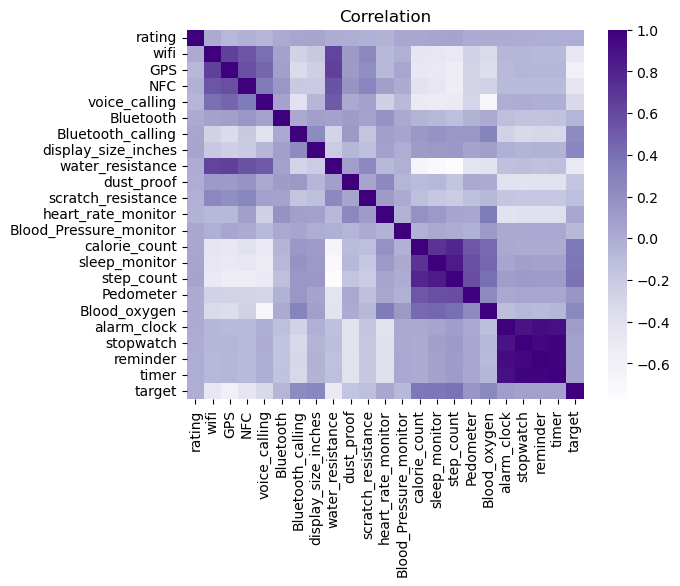

In [207]:
corr1 = pre_sw_df.corr()

sns.heatmap(corr1, cmap='Purples')
plt.title('Correlation')
plt.show()

In [208]:
# GPS는 제거 X
corr1['target'].sort_values(ascending=False)[1:]

step_count                0.389119
sleep_monitor             0.365384
calorie_count             0.362253
display_size_inches       0.261038
Blood_oxygen              0.255372
Bluetooth_calling         0.227008
Pedometer                 0.154860
alarm_clock               0.097993
reminder                  0.078741
timer                     0.072485
stopwatch                 0.069505
heart_rate_monitor        0.037888
rating                   -0.007748
Bluetooth                -0.053917
Blood_Pressure_monitor   -0.075317
scratch_resistance       -0.122590
dust_proof               -0.158927
voice_calling            -0.316998
NFC                      -0.457877
wifi                     -0.467529
water_resistance         -0.490642
GPS                      -0.594945
Name: target, dtype: float64

- DTC 와 LightGBM에 대해서만 진행

In [210]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_sw_df.iloc[:, :-1], pre_sw_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_parameters = {
    'max_depth' : [6,7,8,9,10,11,12], 'min_samples_split': [3,4,5,6,7,8,9]
}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [215]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [216]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(dtc_result_df)

params  mean_test_score  \
0    {'max_depth': 6, 'min_samples_split': 3}         0.518018   
1    {'max_depth': 6, 'min_samples_split': 4}         0.516959   
2    {'max_depth': 6, 'min_samples_split': 5}         0.520123   
3    {'max_depth': 6, 'min_samples_split': 6}         0.521192   
4    {'max_depth': 6, 'min_samples_split': 7}         0.518006   
5    {'max_depth': 6, 'min_samples_split': 8}         0.520123   
6    {'max_depth': 6, 'min_samples_split': 9}         0.519065   
7    {'max_depth': 7, 'min_samples_split': 3}         0.523314   
8    {'max_depth': 7, 'min_samples_split': 4}         0.521187   
9    {'max_depth': 7, 'min_samples_split': 5}         0.523309   
10   {'max_depth': 7, 'min_samples_split': 6}         0.522250   
11   {'max_depth': 7, 'min_samples_split': 7}         0.525425   
12   {'max_depth': 7, 'min_samples_split': 8}         0.526489   
13   {'max_depth': 7, 'min_samples_split': 9}         0.523292   
14   {'max_depth': 8, 'min_samples_split': 3}         0.504289   
15   {'max_depth': 8, 'min_samples_split': 4}         0.505347   
16   {'max_depth': 8, 'min_samples_split': 5}         0.508522   
17   {'max_depth': 8, 'min_samples_split': 6}         0.509574   
18   {'max_depth': 8, 'min_samples_split': 7}         0.511685   
19   {'max_depth': 8, 'min_samples_split': 8}         0.509558   
20   {'max_depth': 8, 'min_samples_split': 9}         0.506372   
21   {'max_depth': 9, 'min_samples_split': 3}         0.521209   
22   {'max_depth': 9, 'min_samples_split': 4}         0.511680   
23   {'max_depth': 9, 'min_samples_split': 5}         0.526517   
24   {'max_depth': 9, 'min_samples_split': 6}         0.532861   
25   {'max_depth': 9, 'min_samples_split': 7}         0.528616   
26   {'max_depth': 9, 'min_samples_split': 8}         0.525442   
27   {'max_depth': 9, 'min_samples_split': 9}         0.522250   
28  {'max_depth': 10, 'min_samples_split': 3}         0.514899   
29  {'max_depth': 10, 'min_samples_split': 4}         0.520173   
30  {'max_depth': 10, 'min_samples_split': 5}         0.519115   
31  {'max_depth': 10, 'min_samples_split': 6}         0.521232   
32  {'max_depth': 10, 'min_samples_split': 7}         0.514882   
33  {'max_depth': 10, 'min_samples_split': 8}         0.510627   
34  {'max_depth': 10, 'min_samples_split': 9}         0.513802   
35  {'max_depth': 11, 'min_samples_split': 3}         0.521226   
36  {'max_depth': 11, 'min_samples_split': 4}         0.510605   
37  {'max_depth': 11, 'min_samples_split': 5}         0.510610   
38  {'max_depth': 11, 'min_samples_split': 6}         0.521198   
39  {'max_depth': 11, 'min_samples_split': 7}         0.522262   
40  {'max_depth': 11, 'min_samples_split': 8}         0.518023   
41  {'max_depth': 11, 'min_samples_split': 9}         0.516948   
42  {'max_depth': 12, 'min_samples_split': 3}         0.518040   
43  {'max_depth': 12, 'min_samples_split': 4}         0.519110   
44  {'max_depth': 12, 'min_samples_split': 5}         0.508516   
45  {'max_depth': 12, 'min_samples_split': 6}         0.520168   
46  {'max_depth': 12, 'min_samples_split': 7}         0.515929   
47  {'max_depth': 12, 'min_samples_split': 8}         0.512727   
48  {'max_depth': 12, 'min_samples_split': 9}         0.514854   

    rank_test_score  
0                28  
1                30  
2                21  
3                17  
4                29  
5                21  
6                25  
7                 7  
8                18  
9                 8  
10               11  
11                6  
12                4  
13                9  
14               49  
15               48  
16               45  
17               43  
18               38  
19               44  
20               47  
21               15  
22               39  
23                3  
24                1  
25                2  
26                5  
27               11  
28               33  
29               19  
30               23  
31               13  
32          

In [217]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[36  6  3  4]
 [ 3 20 22 14]
 [ 3 10 27  9]
 [ 1 10 20  7]]
정확도: 0.4615, 정밀도: 0.4615, 재현율: 0.4615, F1: 0.4615
################################################################################


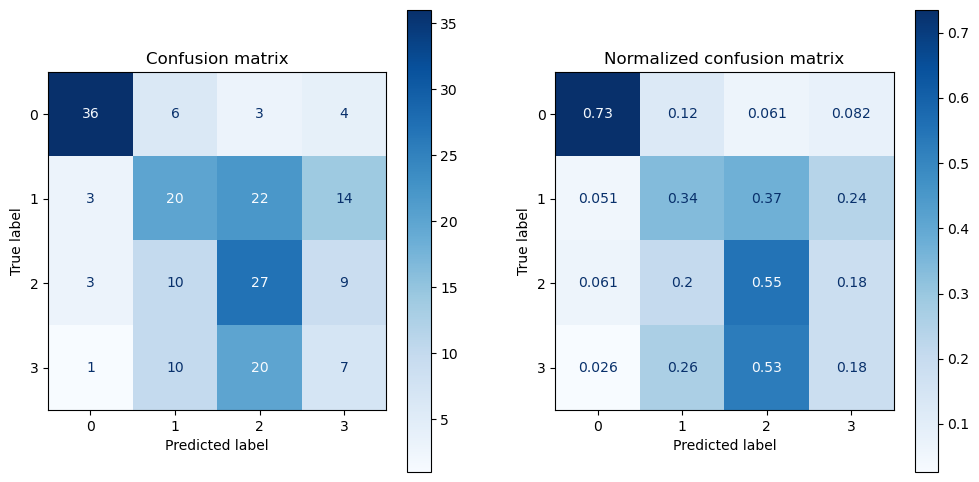

In [218]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

In [219]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, refit=True, return_train_score=True, n_jobs=-1)

In [220]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [221]:
g_lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(g_lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.592182   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.590065   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.586902   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.591129   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.582658   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.583733   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.583682   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.581594   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.583705   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.580525   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.579466   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.590060   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.585832   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.573117   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.572076   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.559366   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.568901   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.575256   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.578431   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.571023   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.584786   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.578419   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.576314   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.574204   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.569965   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.585855   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.579483   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.573128   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.571018   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.570995   

    rank_test_score  
0                 1  
1                 3  
2                 5  
3                 2  
4                12  
5                 9  
6                11  
7                13  
8                10  
9                14  
10               16  
11                4  
12                7  
13               23  
14               24  
15               30  
16               29  
17               20  
18               17  
19               25  
20                8  
21               18  
22               19  
23               21  
24               28  
25                6  
26               15  
27               22  
28               26  
29               27

In [222]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[37  6  5  1]
 [ 7 24 15 13]
 [ 4  8 26 11]
 [ 0 14 15  9]]
정확도: 0.4923, 정밀도: 0.4923, 재현율: 0.4923, F1: 0.4923
################################################################################


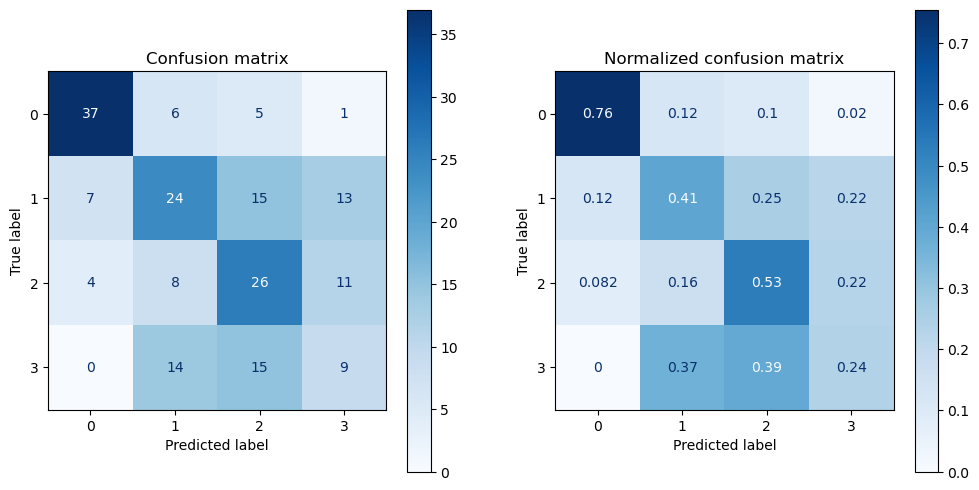

In [223]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### 👉2 Cycle 결과

- DTC
<img src='./sw_images/5.png' width='700px'>

- LightGBM
<img src='./sw_images/6.png' width='700px'>


- LightGBM, DTC 둘 모두 결과치가 조금은 높게 나왔지만 여전히 좋지 못한 성능을 보였다.
- 상관관계에서 ±0.3 이상인 feature들만 추출해서 학습 진행

### 🚩3 Cycle

- 상관관계 점수의 절대값이 0.3 이상인 feature들만 추출해서 훈련 진행

In [224]:
corr1['target'].sort_values(ascending=False)[1:]

step_count                0.389119
sleep_monitor             0.365384
calorie_count             0.362253
display_size_inches       0.261038
Blood_oxygen              0.255372
Bluetooth_calling         0.227008
Pedometer                 0.154860
alarm_clock               0.097993
reminder                  0.078741
timer                     0.072485
stopwatch                 0.069505
heart_rate_monitor        0.037888
rating                   -0.007748
Bluetooth                -0.053917
Blood_Pressure_monitor   -0.075317
scratch_resistance       -0.122590
dust_proof               -0.158927
voice_calling            -0.316998
NFC                      -0.457877
wifi                     -0.467529
water_resistance         -0.490642
GPS                      -0.594945
Name: target, dtype: float64

step_count, sleep_monitor, calorie_count, NFC, wifi, water_resistance, GPS 만 추출

In [225]:
new_df = pre_sw_df.copy()

In [227]:
new_df = new_df[['step_count', 'sleep_monitor', 'calorie_count', 'NFC', 'wifi', 'water_resistance', 'GPS', 'target']]
new_df

step_count  sleep_monitor  calorie_count  NFC  wifi  water_resistance  \
0             0              0              0    1     1                 1   
1             0              0              0    0     1                 1   
2             0              0              0    1     1                 1   
3             1              1              1    0     0                 0   
4             0              0              0    1     1                 1   
..          ...            ...            ...  ...   ...               ...   
969           1              1              1    0     0                 0   
970           1              1              1    0     0                 0   
971           1              1              1    0     0                 0   
972           1              1              1    0     0                 0   
973           1              1              1    0     0                 0   

     GPS  target  
0      1       0  
1      1       0  
2      1       0  
3      0       1  
4      1       0  
..   ...     ...  
969    0       1  
970    0       3  
971    0       1  
972    0       1  
973    0       2  

[974 rows x 8 columns]

In [228]:
corr2 = new_df.corr()
corr2['target'].sort_values(ascending=False)[1:]

step_count          0.389119
sleep_monitor       0.365384
calorie_count       0.362253
NFC                -0.457877
wifi               -0.467529
water_resistance   -0.490642
GPS                -0.594945
Name: target, dtype: float64

array([[<Axes: title={'center': 'step_count'}>,
        <Axes: title={'center': 'sleep_monitor'}>,
        <Axes: title={'center': 'calorie_count'}>],
       [<Axes: title={'center': 'NFC'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'water_resistance'}>],
       [<Axes: title={'center': 'GPS'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

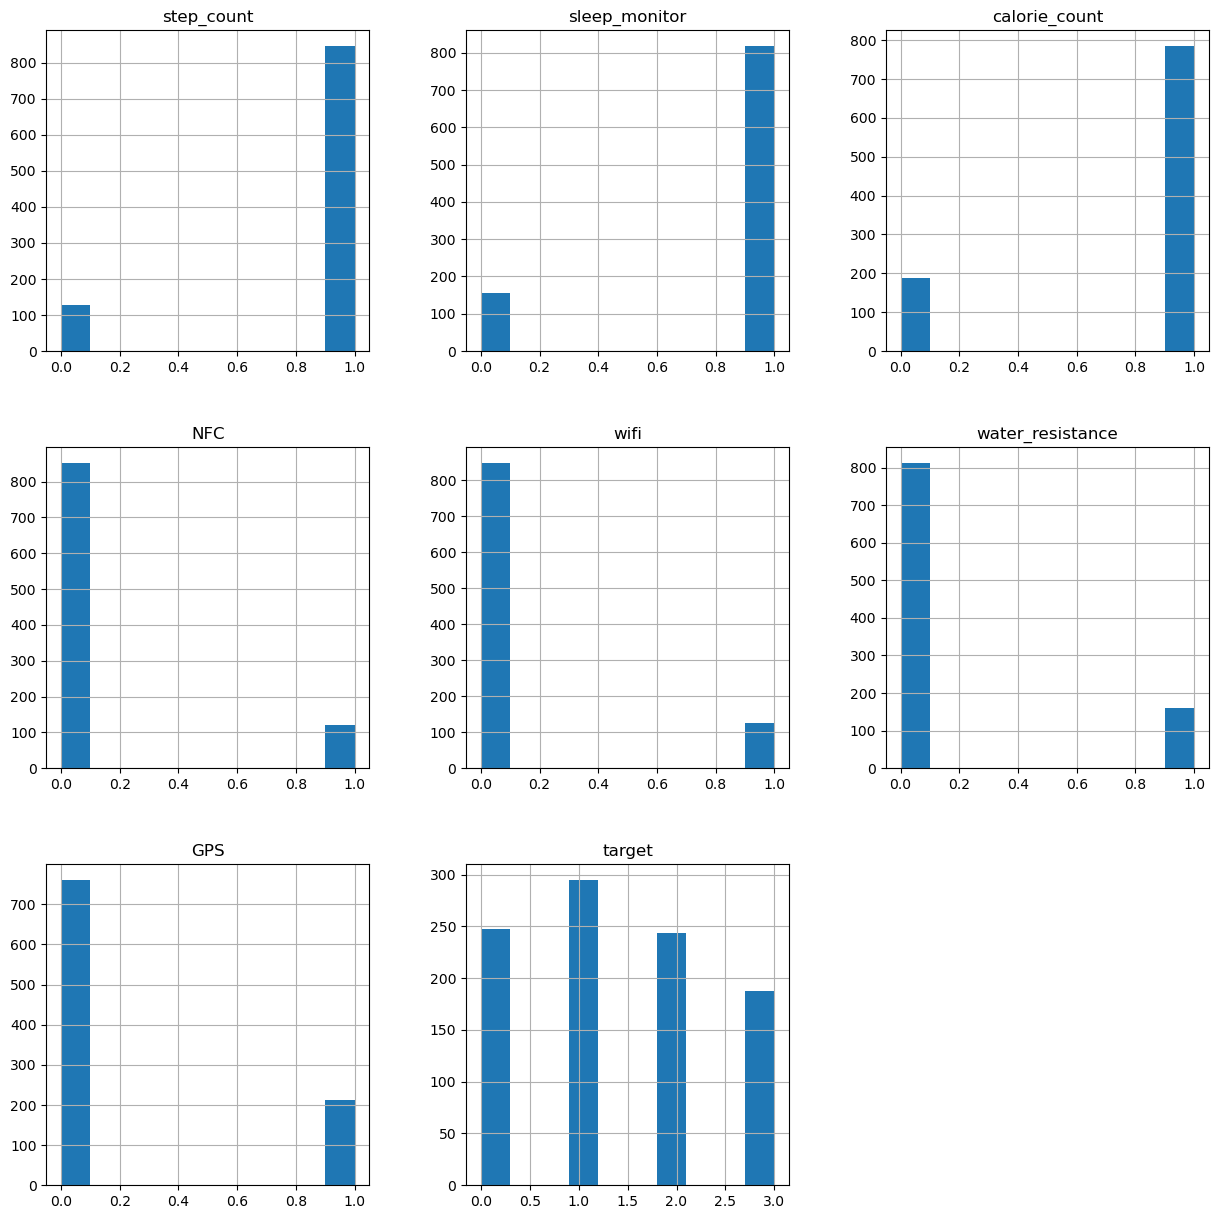

In [229]:
new_df.hist(figsize=(15,15))

In [230]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

features, targets = new_df.iloc[:, :-1], new_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_parameters = {
    'max_depth' : [6,7,8,9,10,11,12], 'min_samples_split': [3,4,5,6,7,8,9]
}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [232]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [233]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(dtc_result_df)

params  mean_test_score  \
0    {'max_depth': 6, 'min_samples_split': 3}         0.457638   
1    {'max_depth': 6, 'min_samples_split': 4}         0.457638   
2    {'max_depth': 6, 'min_samples_split': 5}         0.458696   
3    {'max_depth': 6, 'min_samples_split': 6}         0.458696   
4    {'max_depth': 6, 'min_samples_split': 7}         0.459755   
5    {'max_depth': 6, 'min_samples_split': 8}         0.459755   
6    {'max_depth': 6, 'min_samples_split': 9}         0.459755   
7    {'max_depth': 7, 'min_samples_split': 3}         0.465046   
8    {'max_depth': 7, 'min_samples_split': 4}         0.465046   
9    {'max_depth': 7, 'min_samples_split': 5}         0.466104   
10   {'max_depth': 7, 'min_samples_split': 6}         0.466104   
11   {'max_depth': 7, 'min_samples_split': 7}         0.467162   
12   {'max_depth': 7, 'min_samples_split': 8}         0.467162   
13   {'max_depth': 7, 'min_samples_split': 9}         0.467162   
14   {'max_depth': 8, 'min_samples_split': 3}         0.465046   
15   {'max_depth': 8, 'min_samples_split': 4}         0.465046   
16   {'max_depth': 8, 'min_samples_split': 5}         0.466104   
17   {'max_depth': 8, 'min_samples_split': 6}         0.466104   
18   {'max_depth': 8, 'min_samples_split': 7}         0.467162   
19   {'max_depth': 8, 'min_samples_split': 8}         0.467162   
20   {'max_depth': 8, 'min_samples_split': 9}         0.467162   
21   {'max_depth': 9, 'min_samples_split': 3}         0.465046   
22   {'max_depth': 9, 'min_samples_split': 4}         0.465046   
23   {'max_depth': 9, 'min_samples_split': 5}         0.466104   
24   {'max_depth': 9, 'min_samples_split': 6}         0.466104   
25   {'max_depth': 9, 'min_samples_split': 7}         0.467162   
26   {'max_depth': 9, 'min_samples_split': 8}         0.467162   
27   {'max_depth': 9, 'min_samples_split': 9}         0.467162   
28  {'max_depth': 10, 'min_samples_split': 3}         0.465046   
29  {'max_depth': 10, 'min_samples_split': 4}         0.465046   
30  {'max_depth': 10, 'min_samples_split': 5}         0.466104   
31  {'max_depth': 10, 'min_samples_split': 6}         0.466104   
32  {'max_depth': 10, 'min_samples_split': 7}         0.467162   
33  {'max_depth': 10, 'min_samples_split': 8}         0.467162   
34  {'max_depth': 10, 'min_samples_split': 9}         0.467162   
35  {'max_depth': 11, 'min_samples_split': 3}         0.465046   
36  {'max_depth': 11, 'min_samples_split': 4}         0.465046   
37  {'max_depth': 11, 'min_samples_split': 5}         0.466104   
38  {'max_depth': 11, 'min_samples_split': 6}         0.466104   
39  {'max_depth': 11, 'min_samples_split': 7}         0.467162   
40  {'max_depth': 11, 'min_samples_split': 8}         0.467162   
41  {'max_depth': 11, 'min_samples_split': 9}         0.467162   
42  {'max_depth': 12, 'min_samples_split': 3}         0.465046   
43  {'max_depth': 12, 'min_samples_split': 4}         0.465046   
44  {'max_depth': 12, 'min_samples_split': 5}         0.466104   
45  {'max_depth': 12, 'min_samples_split': 6}         0.466104   
46  {'max_depth': 12, 'min_samples_split': 7}         0.467162   
47  {'max_depth': 12, 'min_samples_split': 8}         0.467162   
48  {'max_depth': 12, 'min_samples_split': 9}         0.467162   

    rank_test_score  
0                48  
1                48  
2                46  
3                46  
4                43  
5                43  
6                43  
7                31  
8                31  
9                19  
10               19  
11                1  
12                1  
13                1  
14               31  
15               31  
16               19  
17               19  
18                1  
19                1  
20                1  
21               31  
22               31  
23               19  
24               19  
25                1  
26                1  
27                1  
28               31  
29               31  
30               19  
31               19  
32          

In [234]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[37  2  3  7]
 [ 4  3  1 51]
 [ 2  1  5 41]
 [ 0  0  7 31]]
정확도: 0.3897, 정밀도: 0.3897, 재현율: 0.3897, F1: 0.3897
################################################################################


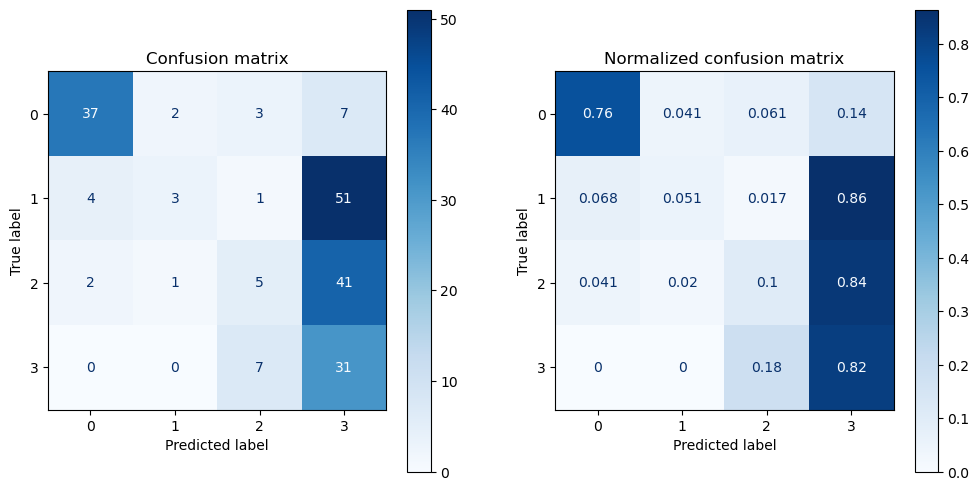

In [235]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

In [236]:
g_lgbm.fit(X_train_over, y_train_over, eval_set = evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 7
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [237]:
g_lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(g_lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.470337   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.466104   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.466104   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.466104   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.466104   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.466104   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.466104   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.466104   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.467168   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.471400   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.466104   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.467168   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.467168   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.470342   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.466109   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.466104   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.465051   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.470342   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.471400   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.471400   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.466104   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.471400   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.469284   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.469284   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.469284   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.470342   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.467168   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.469284   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.471400   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.472459   

    rank_test_score  
0                10  
1                20  
2                20  
3                20  
4                20  
5                20  
6                20  
7                20  
8                15  
9                 2  
10               20  
11               15  
12               15  
13                7  
14               19  
15               20  
16               30  
17                7  
18                2  
19                2  
20               20  
21                2  
22               11  
23               11  
24               11  
25                7  
26               15  
27               11  
28                2  
29                1

In [238]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[38  1  3  7]
 [ 4  3  1 51]
 [ 2  1  5 41]
 [ 0  0  7 31]]
정확도: 0.3949, 정밀도: 0.3949, 재현율: 0.3949, F1: 0.3949
################################################################################


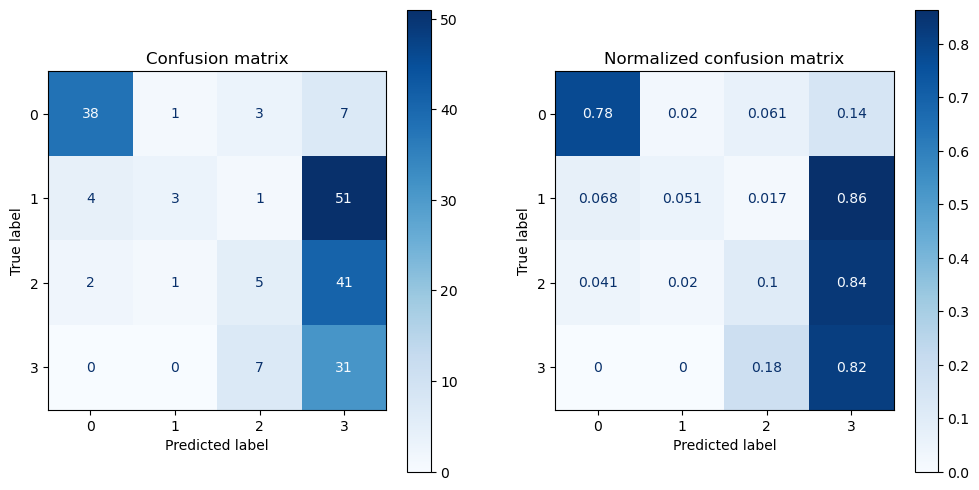

In [239]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### 👉3 Cycle 결과

- DTC

<img src='./sw_images/8.png' width='700px'>

- LightGBM

<img src='./sw_images/9.png' width='700px'>


- 상관관계 점수가 높은 feature만 따로 추출하여 학습시킨 결과 오히려 점수가 더 떨어진 결과를 나타냈다.
- 상관관계와 중요도가 높은 feature에 대해서 under_sampling 진행

### 🚩4 Cycle

- 상관관계와 중요도가 높게 나온 feature의 분포차이가 크게 나타나는 것을 알기에 under_sampling 진행

In [245]:
corr['target'].sort_values(ascending=False)[1:]

step_count                0.389119
sleep_monitor             0.365384
calorie_count             0.362253
display_size_inches       0.261038
Blood_oxygen              0.255372
Bluetooth_calling         0.227008
Pedometer                 0.154860
alarm_clock               0.097993
Touch                     0.087840
reminder                  0.078741
timer                     0.072485
stopwatch                 0.069505
heart_rate_monitor        0.037888
rating                   -0.007748
Bluetooth                -0.053917
Blood_Pressure_monitor   -0.075317
scratch_resistance       -0.122590
dust_proof               -0.158927
Altimeter                -0.204925
voice_calling            -0.316998
NFC                      -0.457877
wifi                     -0.467529
water_resistance         -0.490642
GPS                      -0.594945
Name: target, dtype: float64

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'GPS'}>, <Axes: title={'center': 'NFC'}>,
        <Axes: title={'center': 'voice_calling'}>],
       [<Axes: title={'center': 'Bluetooth'}>,
        <Axes: title={'center': 'Bluetooth_calling'}>,
        <Axes: title={'center': 'display_size_inches'}>,
        <Axes: title={'center': 'water_resistance'}>,
        <Axes: title={'center': 'dust_proof'}>],
       [<Axes: title={'center': 'scratch_resistance'}>,
        <Axes: title={'center': 'heart_rate_monitor'}>,
        <Axes: title={'center': 'Blood_Pressure_monitor'}>,
        <Axes: title={'center': 'calorie_count'}>,
        <Axes: title={'center': 'sleep_monitor'}>],
       [<Axes: title={'center': 'step_count'}>,
        <Axes: title={'center': 'Pedometer'}>,
        <Axes: title={'center': 'Blood_oxygen'}>,
        <Axes: title={'center': 'alarm_clock'}>,
        <Axes: title={'center': 'stopwatch'}>],
       [<

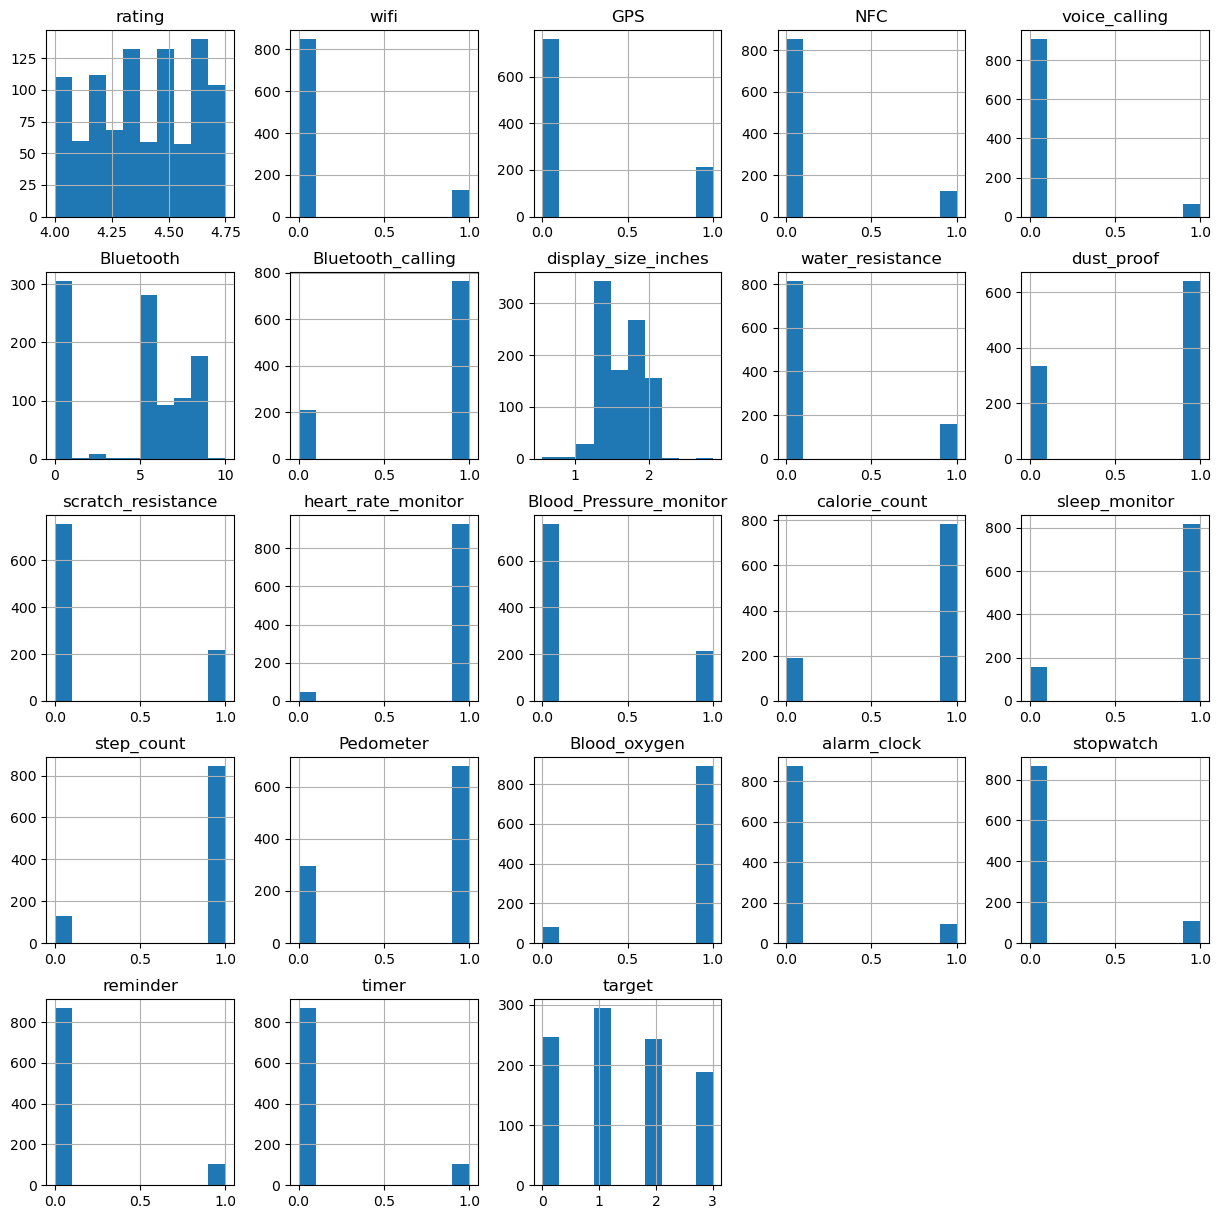

In [242]:
pre_sw_df.hist(figsize=(15,15))

In [244]:
pre_sw_df1.describe().T

count      mean       std   min   25%   50%     75%  \
rating                  974.0  4.379620  0.224336  4.00  4.20  4.40  4.5875   
wifi                    974.0  0.128337  0.334636  0.00  0.00  0.00  0.0000   
GPS                     974.0  0.218686  0.413567  0.00  0.00  0.00  0.0000   
NFC                     974.0  0.124230  0.330013  0.00  0.00  0.00  0.0000   
voice_calling           974.0  0.066735  0.249691  0.00  0.00  0.00  0.0000   
Bluetooth               974.0  4.256674  3.096567  0.00  0.00  5.00  7.0000   
Bluetooth_calling       974.0  0.783368  0.412162  0.00  1.00  1.00  1.0000   
display_size_inches     974.0  1.634528  0.262114  0.56  1.41  1.69  1.8500   
water_resistance        974.0  0.165298  0.371640  0.00  0.00  0.00  0.0000   
dust_proof              974.0  0.657084  0.474928  0.00  0.00  1.00  1.0000   
scratch_resistance      974.0  0.221766  0.415648  0.00  0.00  0.00  0.0000   
heart_rate_monitor      974.0  0.953799  0.210028  0.00  1.00  1.00  1.0000   
Blood_Pressure_monitor  974.0  0.220739  0.414958  0.00  0.00  0.00  0.0000   
calorie_count           974.0  0.806982  0.394870  0.00  1.00  1.00  1.0000   
sleep_monitor           974.0  0.840862  0.365992  0.00  1.00  1.00  1.0000   
step_count              974.0  0.869610  0.336905  0.00  1.00  1.00  1.0000   
Pedometer               974.0  0.698152  0.459296  0.00  0.00  1.00  1.0000   
Blood_oxygen            974.0  0.915811  0.277814  0.00  1.00  1.00  1.0000   
alarm_clock             974.0  0.098563  0.298227  0.00  0.00  0.00  0.0000   
stopwatch               974.0  0.108830  0.311585  0.00  0.00  0.00  0.0000   
reminder                974.0  0.106776  0.308987  0.00  0.00  0.00  0.0000   
timer                   974.0  0.106776  0.308987  0.00  0.00  0.00  0.0000   
target                  974.0  1.382957  1.063337  0.00  0.00  1.00  2.0000   

                          max  
rating                   4.75  
wifi                     1.00  
GPS                      1.00  
NFC                      1.00  
voice_calling            1.00  
Bluetooth               10.00  
Bluetooth_calling        1.00  
display_size_inches      2.86  
water_resistance         1.00  
dust_proof               1.00  
scratch_resistance       1.00  
heart_rate_monitor       1.00  
Blood_Pressure_monitor   1.00  
calorie_count            1.00  
sleep_monitor            1.00  
step_count               1.00  
Pedometer                1.00  
Blood_oxygen             1.00  
alarm_clock              1.00  
stopwatch                1.00  
reminder                 1.00  
timer                    1.00  
target                   3.00

In [243]:
pre_sw_df1 = pre_sw_df.copy()

GPS 기준으로 먼저 언더샘플링 진행

In [248]:
pre_sw_df1[pre_sw_df1.GPS == 1]

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
4      4.05     1    1    1              0          5                  1   
8      4.00     0    1    0              0          8                  1   
..      ...   ...  ...  ...            ...        ...                ...   
962    4.35     0    1    0              0          5                  0   
963    4.00     0    1    0              0          5                  1   
965    4.55     1    1    1              0          5                  1   
966    4.35     1    1    1              0          5                  0   
967    4.40     1    1    1              0          4                  0   

     display_size_inches  water_resistance  dust_proof  ...  calorie_count  \
0                   1.43                 1           1  ...              0   
1                   2.02                 1           0  ...              0   
2                   1.40                 1           1  ...              0   
4                   1.43                 1           1  ...              0   
8                   1.97                 0           1  ...              1   
..                   ...               ...         ...  ...            ...   
962                 1.75                 0           1  ...              1   
963                 1.43                 1           1  ...              0   
965                 1.28                 1           0  ...              1   
966                 1.20                 1           1  ...              0   
967                 1.20                 1           1  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  alarm_clock  \
0                0           0          0             1            0   
1                0           0          0             1            0   
2                0           0          0             1            0   
4                0           0          0             1            0   
8                1           1          1             1            0   
..             ...         ...        ...           ...          ...   
962              1           1          1             1            0   
963              0           0          0             1            0   
965              1           1          1             1            0   
966              0           0          0             1            0   
967              1           1          1             0            0   

     stopwatch  reminder  timer  target  
0            0         0      0       0  
1            0         0      0       0  
2            0         0      0       0  
4            0         0      0       0  
8            0         0      0       0  
..         ...       ...    ...     ...  
962          0         0      0       0  
963          0         0      0       0  
965          0         0      0       0  
966          0         0      0       0  
967          0         0      0       0  

[213 rows x 23 columns]

In [249]:
gps1 = pre_sw_df1[pre_sw_df1.GPS == 1]
gps0 = pre_sw_df1[pre_sw_df1.GPS == 0].sample(213, random_state=124)

under_sw_df1 = pd.concat([gps1, gps0]).reset_index(drop=True)

In [250]:
under_sw_df1

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.35     1    1    1              0          5                  1   
1      4.25     1    1    0              1          5                  0   
2      4.35     1    1    1              0          5                  0   
3      4.05     1    1    1              0          5                  1   
4      4.00     0    1    0              0          8                  1   
..      ...   ...  ...  ...            ...        ...                ...   
421    4.00     0    0    0              0          8                  1   
422    4.30     0    0    0              0          8                  1   
423    4.05     0    0    0              0          0                  1   
424    4.20     0    0    0              0          0                  1   
425    4.60     0    0    0              0          6                  1   

     display_size_inches  water_resistance  dust_proof  ...  calorie_count  \
0                   1.43                 1           1  ...              0   
1                   2.02                 1           0  ...              0   
2                   1.40                 1           1  ...              0   
3                   1.43                 1           1  ...              0   
4                   1.97                 0           1  ...              1   
..                   ...               ...         ...  ...            ...   
421                 1.78                 0           0  ...              1   
422                 1.43                 0           0  ...              1   
423                 1.85                 0           0  ...              1   
424                 1.83                 0           0  ...              1   
425                 1.85                 0           0  ...              1   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  alarm_clock  \
0                0           0          0             1            0   
1                0           0          0             1            0   
2                0           0          0             1            0   
3                0           0          0             1            0   
4                1           1          1             1            0   
..             ...         ...        ...           ...          ...   
421              1           1          1             1            0   
422              1           1          1             1            0   
423              1           1          1             1            0   
424              1           1          1             1            0   
425              0           1          0             1            0   

     stopwatch  reminder  timer  target  
0            0         0      0       0  
1            0         0      0       0  
2            0         0      0       0  
3            0         0      0       0  
4            0         0      0       0  
..         ...       ...    ...     ...  
421          0         0      0       2  
422          0         0      0       1  
423          0         0      0       2  
424          0         0      0       3  
425          0         0      0       3  

[426 rows x 23 columns]

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'GPS'}>, <Axes: title={'center': 'NFC'}>,
        <Axes: title={'center': 'voice_calling'}>],
       [<Axes: title={'center': 'Bluetooth'}>,
        <Axes: title={'center': 'Bluetooth_calling'}>,
        <Axes: title={'center': 'display_size_inches'}>,
        <Axes: title={'center': 'water_resistance'}>,
        <Axes: title={'center': 'dust_proof'}>],
       [<Axes: title={'center': 'scratch_resistance'}>,
        <Axes: title={'center': 'heart_rate_monitor'}>,
        <Axes: title={'center': 'Blood_Pressure_monitor'}>,
        <Axes: title={'center': 'calorie_count'}>,
        <Axes: title={'center': 'sleep_monitor'}>],
       [<Axes: title={'center': 'step_count'}>,
        <Axes: title={'center': 'Pedometer'}>,
        <Axes: title={'center': 'Blood_oxygen'}>,
        <Axes: title={'center': 'alarm_clock'}>,
        <Axes: title={'center': 'stopwatch'}>],
       [<

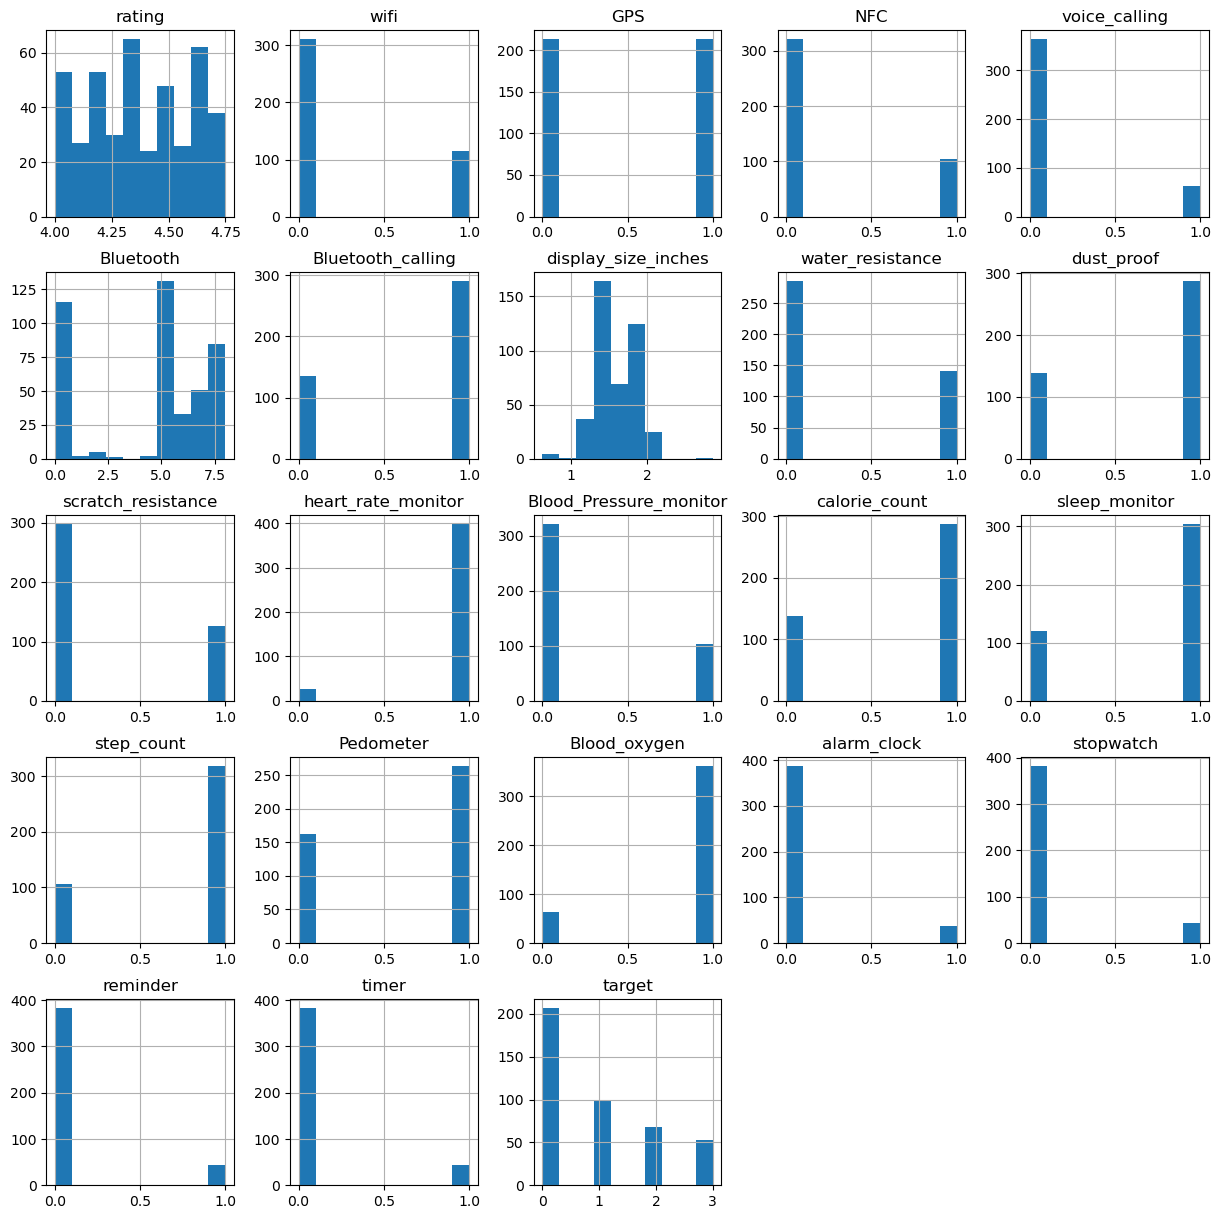

In [251]:
under_sw_df1.hist(figsize=(15,15))

In [252]:
new_corr = under_sw_df1.corr()
new_corr['target'].sort_values(ascending=False)[1:]

calorie_count             0.457725
step_count                0.455347
sleep_monitor             0.442382
Pedometer                 0.292248
display_size_inches       0.291566
Bluetooth_calling         0.276064
Blood_oxygen              0.273585
alarm_clock               0.123130
reminder                  0.112026
stopwatch                 0.090105
timer                     0.090105
rating                    0.010064
Blood_Pressure_monitor   -0.009960
heart_rate_monitor       -0.018897
Bluetooth                -0.134166
scratch_resistance       -0.164395
dust_proof               -0.219574
voice_calling            -0.325824
NFC                      -0.484560
wifi                     -0.511184
water_resistance         -0.566389
GPS                      -0.688998
Name: target, dtype: float64

> 상관관계가 낮게 나온 feature에 대해서는 언더샘플링을 진행하지 않음

In [424]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

features, targets = under_sw_df1.iloc[:, :-1], under_sw_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [425]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_parameters = {
    'max_depth' : [10,11,12,13,14], 'min_samples_split': [3,4,5,6,7,8,9]
}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [426]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [427]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(dtc_result_df)

params  mean_test_score  \
0   {'max_depth': 10, 'min_samples_split': 3}         0.660606   
1   {'max_depth': 10, 'min_samples_split': 4}         0.660606   
2   {'max_depth': 10, 'min_samples_split': 5}         0.669697   
3   {'max_depth': 10, 'min_samples_split': 6}         0.656061   
4   {'max_depth': 10, 'min_samples_split': 7}         0.650000   
5   {'max_depth': 10, 'min_samples_split': 8}         0.654545   
6   {'max_depth': 10, 'min_samples_split': 9}         0.654545   
7   {'max_depth': 11, 'min_samples_split': 3}         0.671212   
8   {'max_depth': 11, 'min_samples_split': 4}         0.666667   
9   {'max_depth': 11, 'min_samples_split': 5}         0.660606   
10  {'max_depth': 11, 'min_samples_split': 6}         0.660606   
11  {'max_depth': 11, 'min_samples_split': 7}         0.656061   
12  {'max_depth': 11, 'min_samples_split': 8}         0.654545   
13  {'max_depth': 11, 'min_samples_split': 9}         0.650000   
14  {'max_depth': 12, 'min_samples_split': 3}         0.665152   
15  {'max_depth': 12, 'min_samples_split': 4}         0.656061   
16  {'max_depth': 12, 'min_samples_split': 5}         0.669697   
17  {'max_depth': 12, 'min_samples_split': 6}         0.656061   
18  {'max_depth': 12, 'min_samples_split': 7}         0.646970   
19  {'max_depth': 12, 'min_samples_split': 8}         0.654545   
20  {'max_depth': 12, 'min_samples_split': 9}         0.656061   
21  {'max_depth': 13, 'min_samples_split': 3}         0.672727   
22  {'max_depth': 13, 'min_samples_split': 4}         0.659091   
23  {'max_depth': 13, 'min_samples_split': 5}         0.669697   
24  {'max_depth': 13, 'min_samples_split': 6}         0.653030   
25  {'max_depth': 13, 'min_samples_split': 7}         0.646970   
26  {'max_depth': 13, 'min_samples_split': 8}         0.656061   
27  {'max_depth': 13, 'min_samples_split': 9}         0.653030   
28  {'max_depth': 14, 'min_samples_split': 3}         0.665152   
29  {'max_depth': 14, 'min_samples_split': 4}         0.665152   
30  {'max_depth': 14, 'min_samples_split': 5}         0.657576   
31  {'max_depth': 14, 'min_samples_split': 6}         0.653030   
32  {'max_depth': 14, 'min_samples_split': 7}         0.654545   
33  {'max_depth': 14, 'min_samples_split': 8}         0.660606   
34  {'max_depth': 14, 'min_samples_split': 9}         0.654545   

    rank_test_score  
0                10  
1                10  
2                 3  
3                17  
4                32  
5                23  
6                23  
7                 2  
8                 6  
9                10  
10               10  
11               17  
12               23  
13               32  
14                9  
15               17  
16                3  
17               17  
18               34  
19               23  
20               17  
21                1  
22               15  
23                3  
24               29  
25               34  
26               17  
27               29  
28                7  
29                7  
30               16  
31               29  
32               23  
33               14  
34               23

In [428]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[38  2  1  1]
 [ 1  9  4  6]
 [ 0  4  6  4]
 [ 0  4  4  2]]
정확도: 0.6395, 정밀도: 0.6395, 재현율: 0.6395, F1: 0.6395
################################################################################


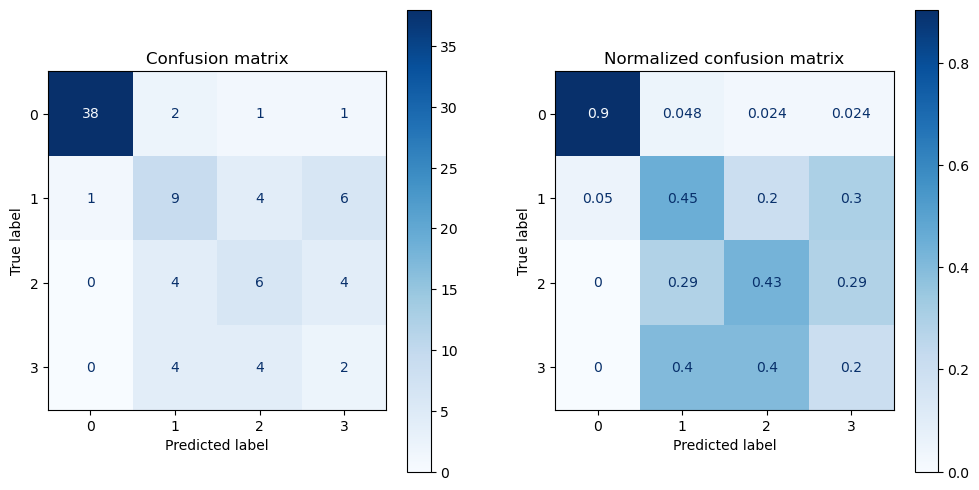

In [429]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

In [430]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [431]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.716667   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.718182   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.703030   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.700000   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.703030   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.700000   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.698485   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.693939   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.695455   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.700000   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.698485   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.696970   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.706061   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.703030   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.693939   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.712121   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.709091   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.712121   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.710606   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.710606   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.710606   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.701515   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.703030   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.701515   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.703030   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.716667   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.696970   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.692424   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.695455   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.696970   

    rank_test_score  
0                 3  
1                 1  
2                11  
3                18  
4                15  
5                18  
6                21  
7                28  
8                26  
9                18  
10               21  
11               23  
12               10  
13               13  
14               28  
15                4  
16                9  
17                4  
18                6  
19                6  
20                8  
21               16  
22               11  
23               16  
24               13  
25                2  
26               23  
27               30  
28               26  
29               23

In [432]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[39  1  1  1]
 [ 1  9  6  4]
 [ 0  4  6  4]
 [ 0  3  6  1]]
정확도: 0.6395, 정밀도: 0.6395, 재현율: 0.6395, F1: 0.6395
################################################################################


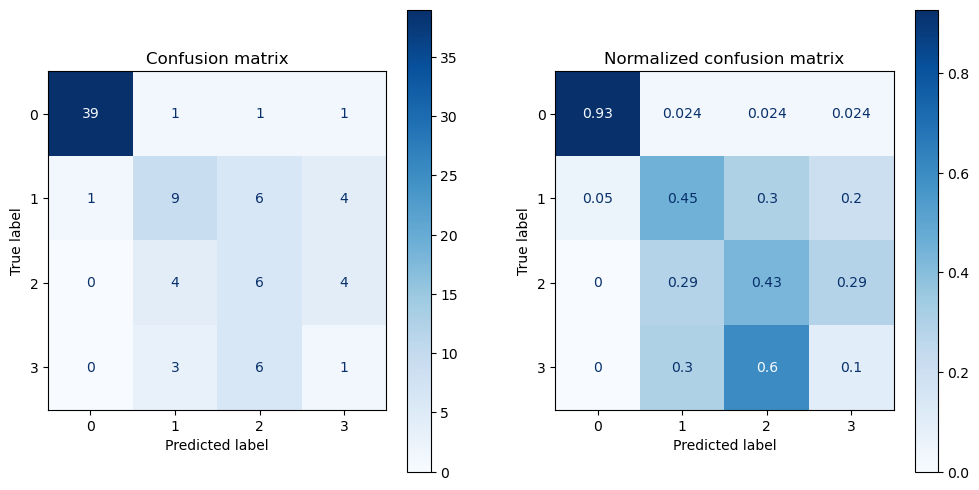

In [433]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### 👉4 Cycle 결과

- DTC

<img src='./sw_images/10.png' width='700px'>

- LightGBM

<img src='./sw_images/11.png' width='700px'>

- 확인한 결과, 이전보다 점수가 많이 올라갔지만 3을 맞추는 비율이 매우 낮아졌다.
- DTC와 LightGBM 둘 모두 동일한 점수가 나타났다.
- 다음으로 상관관계 점수가 높은 feature에 대해 under_sampling을 진행

### 🚩5 Cycle
- Calorie_count에 대해 under_sampling 진행

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'GPS'}>, <Axes: title={'center': 'NFC'}>,
        <Axes: title={'center': 'voice_calling'}>],
       [<Axes: title={'center': 'Bluetooth'}>,
        <Axes: title={'center': 'Bluetooth_calling'}>,
        <Axes: title={'center': 'display_size_inches'}>,
        <Axes: title={'center': 'water_resistance'}>,
        <Axes: title={'center': 'dust_proof'}>],
       [<Axes: title={'center': 'scratch_resistance'}>,
        <Axes: title={'center': 'heart_rate_monitor'}>,
        <Axes: title={'center': 'Blood_Pressure_monitor'}>,
        <Axes: title={'center': 'calorie_count'}>,
        <Axes: title={'center': 'sleep_monitor'}>],
       [<Axes: title={'center': 'step_count'}>,
        <Axes: title={'center': 'Pedometer'}>,
        <Axes: title={'center': 'Blood_oxygen'}>,
        <Axes: title={'center': 'alarm_clock'}>,
        <Axes: title={'center': 'stopwatch'}>],
       [<

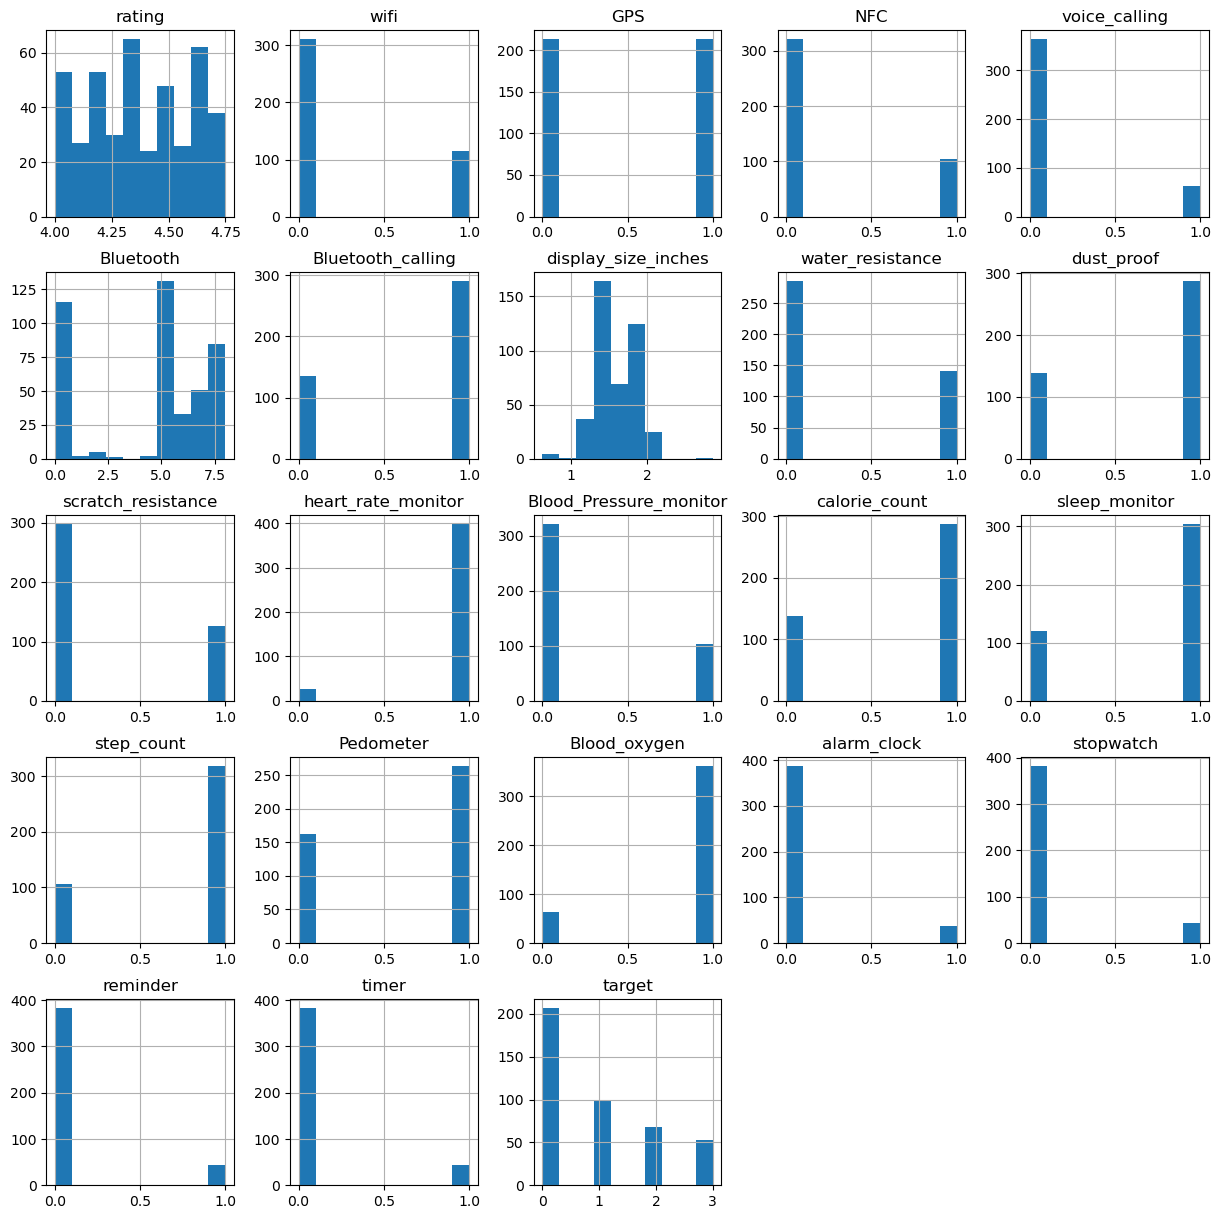

In [434]:
under_sw_df1.hist(figsize=(15,15))

In [435]:
new_corr = under_sw_df1.corr()
new_corr['target'].sort_values(ascending=False)[1:]

calorie_count             0.457725
step_count                0.455347
sleep_monitor             0.442382
Pedometer                 0.292248
display_size_inches       0.291566
Bluetooth_calling         0.276064
Blood_oxygen              0.273585
alarm_clock               0.123130
reminder                  0.112026
stopwatch                 0.090105
timer                     0.090105
rating                    0.010064
Blood_Pressure_monitor   -0.009960
heart_rate_monitor       -0.018897
Bluetooth                -0.134166
scratch_resistance       -0.164395
dust_proof               -0.219574
voice_calling            -0.325824
NFC                      -0.484560
wifi                     -0.511184
water_resistance         -0.566389
GPS                      -0.688998
Name: target, dtype: float64

calorie_count에 대해 undersampling 진행

In [436]:
under_sw_df1.calorie_count.value_counts()

calorie_count
1    288
0    138
Name: count, dtype: int64

In [437]:
cal1 = pre_sw_df1[pre_sw_df1.calorie_count == 1].sample(138, random_state=124)
cal0 = pre_sw_df1[pre_sw_df1.calorie_count == 0]

under_sw_df2 = pd.concat([cal1, cal0]).reset_index(drop=True)

In [438]:
under_sw_df2

rating  wifi  GPS  NFC  voice_calling  Bluetooth  Bluetooth_calling  \
0      4.60     0    0    0              0          6                  1   
1      4.15     0    0    0              0          0                  1   
2      4.60     0    0    0              0          0                  1   
3      4.65     0    0    0              0          8                  1   
4      4.45     0    0    0              0          5                  1   
..      ...   ...  ...  ...            ...        ...                ...   
321    4.65     1    1    0              0          5                  1   
322    4.50     0    1    1              0          7                  1   
323    4.50     0    0    0              0          0                  0   
324    4.00     0    1    0              0          5                  1   
325    4.35     1    1    1              0          5                  0   

     display_size_inches  water_resistance  dust_proof  ...  calorie_count  \
0                   1.78                 0           1  ...              1   
1                   1.51                 0           1  ...              1   
2                   1.43                 0           1  ...              1   
3                   1.78                 0           0  ...              1   
4                   1.57                 0           1  ...              1   
..                   ...               ...         ...  ...            ...   
321                 1.61                 1           1  ...              0   
322                 1.43                 1           0  ...              0   
323                 1.70                 0           0  ...              0   
324                 1.43                 1           1  ...              0   
325                 1.20                 1           1  ...              0   

     sleep_monitor  step_count  Pedometer  Blood_oxygen  alarm_clock  \
0                1           1          1             1            0   
1                1           1          1             1            0   
2                1           1          1             1            0   
3                1           1          1             1            0   
4                1           1          1             1            0   
..             ...         ...        ...           ...          ...   
321              0           0          0             0            0   
322              0           0          0             1            0   
323              1           1          1             1            0   
324              0           0          0             1            0   
325              0           0          0             1            0   

     stopwatch  reminder  timer  target  
0            0         0      0       3  
1            0         0      0       1  
2            0         0      0       1  
3            0         0      0       3  
4            0         0      0       0  
..         ...       ...    ...     ...  
321          0         0      0       0  
322          0         0      0       0  
323          1         1      1       1  
324          0         0      0       0  
325          0         0      0       0  

[326 rows x 23 columns]

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'GPS'}>, <Axes: title={'center': 'NFC'}>,
        <Axes: title={'center': 'voice_calling'}>],
       [<Axes: title={'center': 'Bluetooth'}>,
        <Axes: title={'center': 'Bluetooth_calling'}>,
        <Axes: title={'center': 'display_size_inches'}>,
        <Axes: title={'center': 'water_resistance'}>,
        <Axes: title={'center': 'dust_proof'}>],
       [<Axes: title={'center': 'scratch_resistance'}>,
        <Axes: title={'center': 'heart_rate_monitor'}>,
        <Axes: title={'center': 'Blood_Pressure_monitor'}>,
        <Axes: title={'center': 'calorie_count'}>,
        <Axes: title={'center': 'sleep_monitor'}>],
       [<Axes: title={'center': 'step_count'}>,
        <Axes: title={'center': 'Pedometer'}>,
        <Axes: title={'center': 'Blood_oxygen'}>,
        <Axes: title={'center': 'alarm_clock'}>,
        <Axes: title={'center': 'stopwatch'}>],
       [<

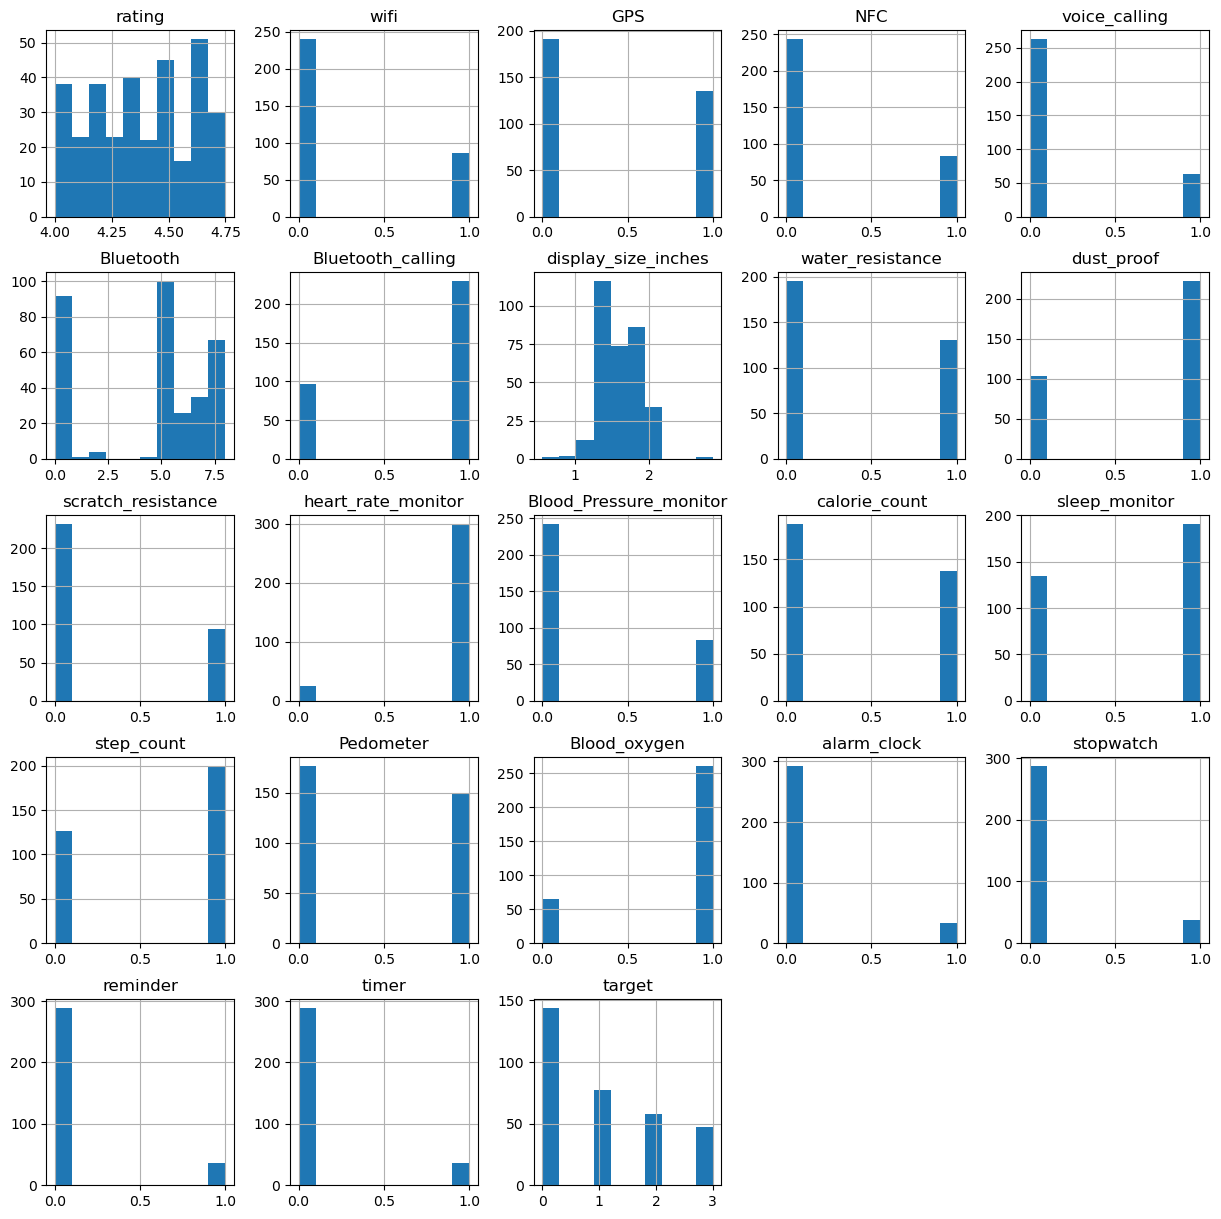

In [439]:
under_sw_df2.hist(figsize=(15,15))

In [440]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

features, targets = under_sw_df2.iloc[:, :-1], under_sw_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [441]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc_parameters = {
    'max_depth' : [10,11,12,13,14], 'min_samples_split': [3,4,5,6,7,8,9]
}

dtc = DecisionTreeClassifier()
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [442]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [443]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(dtc_result_df)

params  mean_test_score  \
0   {'max_depth': 10, 'min_samples_split': 3}         0.634783   
1   {'max_depth': 10, 'min_samples_split': 4}         0.634783   
2   {'max_depth': 10, 'min_samples_split': 5}         0.626087   
3   {'max_depth': 10, 'min_samples_split': 6}         0.634783   
4   {'max_depth': 10, 'min_samples_split': 7}         0.626087   
5   {'max_depth': 10, 'min_samples_split': 8}         0.636957   
6   {'max_depth': 10, 'min_samples_split': 9}         0.639130   
7   {'max_depth': 11, 'min_samples_split': 3}         0.645652   
8   {'max_depth': 11, 'min_samples_split': 4}         0.652174   
9   {'max_depth': 11, 'min_samples_split': 5}         0.632609   
10  {'max_depth': 11, 'min_samples_split': 6}         0.641304   
11  {'max_depth': 11, 'min_samples_split': 7}         0.634783   
12  {'max_depth': 11, 'min_samples_split': 8}         0.630435   
13  {'max_depth': 11, 'min_samples_split': 9}         0.628261   
14  {'max_depth': 12, 'min_samples_split': 3}         0.663043   
15  {'max_depth': 12, 'min_samples_split': 4}         0.639130   
16  {'max_depth': 12, 'min_samples_split': 5}         0.626087   
17  {'max_depth': 12, 'min_samples_split': 6}         0.617391   
18  {'max_depth': 12, 'min_samples_split': 7}         0.645652   
19  {'max_depth': 12, 'min_samples_split': 8}         0.636957   
20  {'max_depth': 12, 'min_samples_split': 9}         0.619565   
21  {'max_depth': 13, 'min_samples_split': 3}         0.645652   
22  {'max_depth': 13, 'min_samples_split': 4}         0.641304   
23  {'max_depth': 13, 'min_samples_split': 5}         0.647826   
24  {'max_depth': 13, 'min_samples_split': 6}         0.621739   
25  {'max_depth': 13, 'min_samples_split': 7}         0.643478   
26  {'max_depth': 13, 'min_samples_split': 8}         0.634783   
27  {'max_depth': 13, 'min_samples_split': 9}         0.628261   
28  {'max_depth': 14, 'min_samples_split': 3}         0.639130   
29  {'max_depth': 14, 'min_samples_split': 4}         0.645652   
30  {'max_depth': 14, 'min_samples_split': 5}         0.630435   
31  {'max_depth': 14, 'min_samples_split': 6}         0.630435   
32  {'max_depth': 14, 'min_samples_split': 7}         0.634783   
33  {'max_depth': 14, 'min_samples_split': 8}         0.634783   
34  {'max_depth': 14, 'min_samples_split': 9}         0.636957   

    rank_test_score  
0                17  
1                17  
2                31  
3                17  
4                31  
5                14  
6                13  
7                 6  
8                 2  
9                24  
10                9  
11               17  
12               27  
13               28  
14                1  
15               11  
16               30  
17               35  
18                4  
19               14  
20               34  
21                6  
22                9  
23                3  
24               33  
25                8  
26               17  
27               28  
28               12  
29                4  
30               25  
31               25  
32               17  
33               17  
34               14

In [444]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[26  0  2  1]
 [ 3  8  2  3]
 [ 0  3  7  2]
 [ 0  2  2  5]]
정확도: 0.6970, 정밀도: 0.6970, 재현율: 0.6970, F1: 0.6970
################################################################################


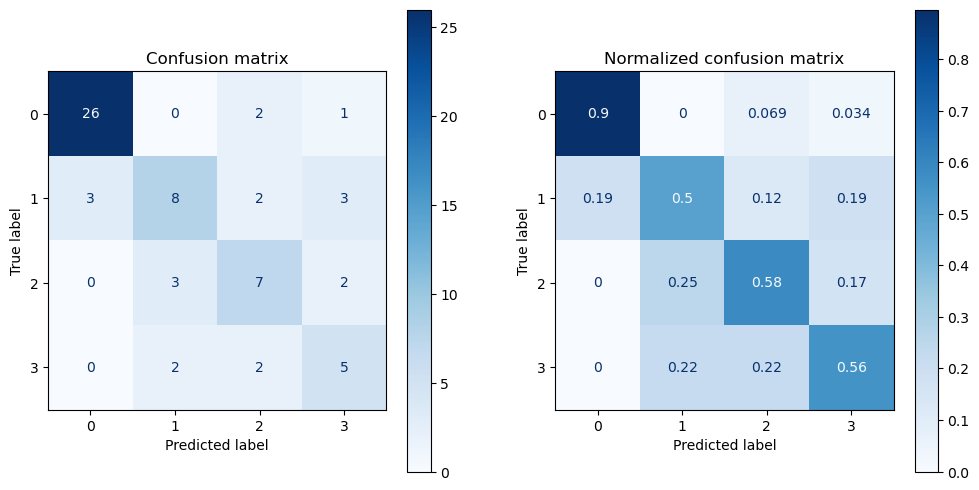

In [445]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

In [446]:
g_lgbm.fit(X_train_over, y_train_over, eval_set = evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [447]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.706522   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.730435   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.721739   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.732609   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.719565   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.730435   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.726087   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.719565   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.721739   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.732609   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.719565   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.715217   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.719565   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.721739   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.721739   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.723913   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.730435   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.730435   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.730435   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.728261   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.734783   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.734783   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.734783   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.726087   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.723913   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.741304   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.728261   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.730435   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.730435   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.730435   

    rank_test_score  
0                30  
1                 7  
2                21  
3                 5  
4                25  
5                 7  
6                17  
7                25  
8                21  
9                 6  
10               28  
11               29  
12               25  
13               21  
14               21  
15               19  
16                7  
17                7  
18                7  
19               15  
20                2  
21                2  
22                2  
23               18  
24               19  
25                1  
26               15  
27                7  
28                7  
29                7

In [448]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[28  1  0  0]
 [ 1  7  5  3]
 [ 1  3  5  3]
 [ 2  2  1  4]]
정확도: 0.6667, 정밀도: 0.6667, 재현율: 0.6667, F1: 0.6667
################################################################################


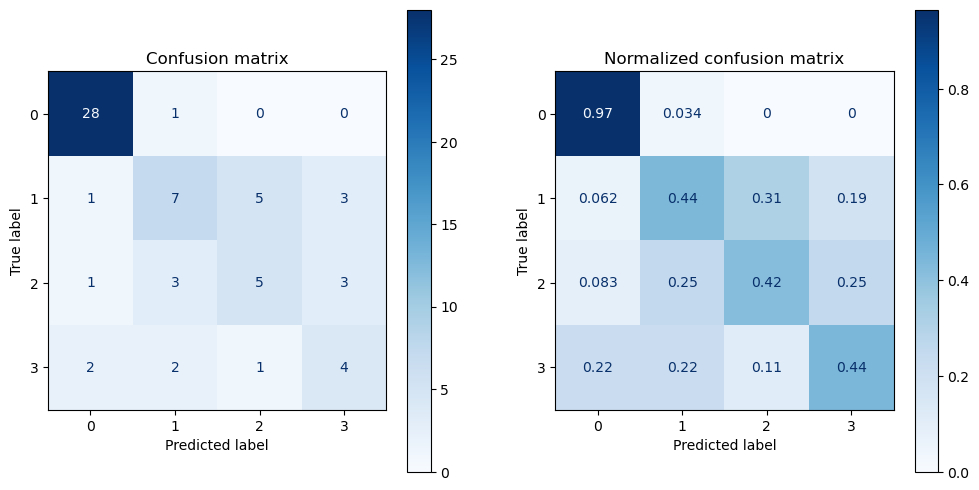

In [449]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### 👉5 Cycle 결과
- DTC와 LightGBM 진행 결과, 안정적인 점수까지 올라온것을 확인.
- 위의 전처리된 데이터로 나머지 모델에 훈련 진행
  1. 스케일 적용 X
  2. 스케일 적용 O

### 🚩6 Cycle 

- SVC, KNN, RFC, AdaBoost, GBM, XGBoost, LightGBM에 대해 훈련 진행

#### SVC

In [450]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_parameters = {'C': [0.1,1,10,100, 1000],
                 'gamma': [0.001,0.01,0.1,1,10,100],
                 'kernel': ['linear', 'rbf']}

svc = SVC(probability=True)

g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [451]:
g_svc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [452]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params','mean_test_score','rank_test_score']]
svc_result_df

params  mean_test_score  \
0    {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.573913   
1       {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.367391   
2     {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}         0.573913   
3        {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}         0.395652   
4      {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.573913   
5         {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.452174   
6        {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}         0.573913   
7           {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}         0.619565   
8       {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}         0.573913   
9          {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}         0.530435   
10     {'C': 0.1, 'gamma': 100, 'kernel': 'linear'}         0.573913   
11        {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}         0.423913   
12     {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.586957   
13        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.378261   
14      {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}         0.586957   
15         {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}         0.469565   
16       {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}         0.586957   
17          {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.643478   
18         {'C': 1, 'gamma': 1, 'kernel': 'linear'}         0.586957   
19            {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.702174   
20        {'C': 1, 'gamma': 10, 'kernel': 'linear'}         0.586957   
21           {'C': 1, 'gamma': 10, 'kernel': 'rbf'}         0.636957   
22       {'C': 1, 'gamma': 100, 'kernel': 'linear'}         0.586957   
23          {'C': 1, 'gamma': 100, 'kernel': 'rbf'}         0.530435   
24    {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.584783   
25       {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}         0.458696   
26     {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}         0.584783   
27        {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}         0.621739   
28      {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}         0.584783   
29         {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}         0.689130   
30        {'C': 10, 'gamma': 1, 'kernel': 'linear'}         0.584783   
31           {'C': 10, 'gamma': 1, 'kernel': 'rbf'}         0.721739   
32       {'C': 10, 'gamma': 10, 'kernel': 'linear'}         0.584783   
33          {'C': 10, 'gamma': 10, 'kernel': 'rbf'}         0.650000   
34      {'C': 10, 'gamma': 100, 'kernel': 'linear'}         0.584783   
35         {'C': 10, 'gamma': 100, 'kernel': 'rbf'}         0.539130   
36   {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}         0.576087   
37      {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}         0.604348   
38    {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}         0.576087   
39       {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}         0.656522   
40     {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}         0.576087   
41        {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}         0.684783   
42       {'C': 100, 'gamma': 1, 'kernel': 'linear'}         0.576087   
43          {'C': 100, 'gamma': 1, 'kernel': 'rbf'}         0.743478   
44      {'C': 100, 'gamma': 10, 'kernel': 'linear'}         0.576087   
45         {'C': 100, 'gamma': 10, 'kernel': 'rbf'}         0.647826   
46     {'C': 100, 'gamma': 100, 'kernel': 'linear'}         0.576087   
47        {'C': 100, 'gamma': 100, 'kernel': 'rbf'}         0.539130   
48  {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}         0.584783   
49     {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}         0.626087   
50   {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}         0.584783   
51      {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}         0.676087   
52    {'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}         0.584783   
53       {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}         0.686957   
54      {'C': 1000, 'gamma': 1, 'kernel': 'linear'}         0.584783   
55         {'

오차 행렬
[[29  0  0  0]
 [ 5  9  0  2]
 [ 4  3  2  3]
 [ 2  1  3  3]]
정확도: 0.6515, 정밀도: 0.6515, 재현율: 0.6515, F1: 0.6515
################################################################################


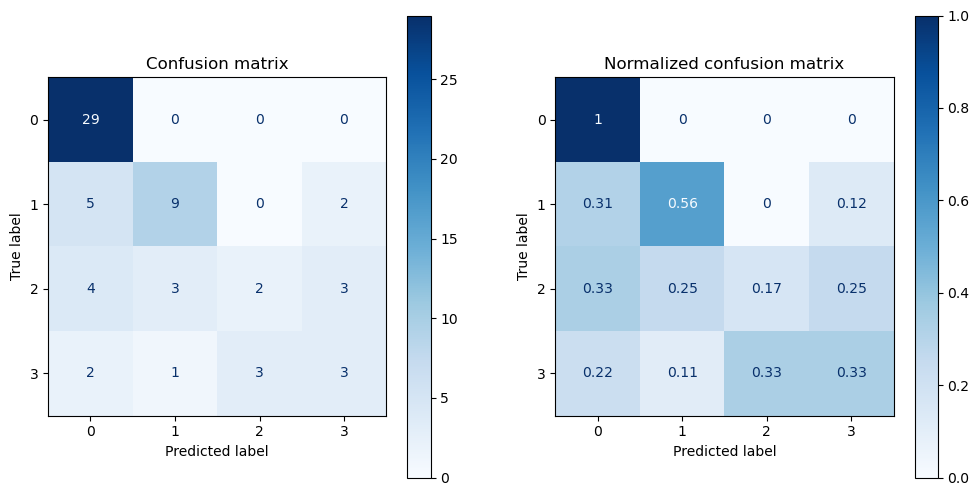

In [453]:
svc = g_svc.best_estimator_
svc_prediction = svc.predict(X_test)
get_evaluation(y_test, svc_prediction, svc, X_test)

#### 스케일 적용

In [454]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


svc_parameters = {'svc__C': [0.1,1,10,100, 1000],
                 'svc__gamma': [0.001,0.01,0.1,1,10,100],
                 'svc__kernel': ['linear', 'rbf']}


svc = SVC(probability=True)

svc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()),('svc', svc)])


g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [455]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [456]:
mms_svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(mms_svc_result_df)


params  mean_test_score  \
0   {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.571739   
1   {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.521739   
2   {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.571739   
3   {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.521739   
4   {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.571739   
5   {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.558696   
6   {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.571739   
7   {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.554348   
8   {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...         0.571739   
9   {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...         0.550000   
10  {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...         0.571739   
11  {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...         0.406522   
12  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...         0.569565   
13  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...         0.521739   
14  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...         0.569565   
15  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...         0.532609   
16  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...         0.569565   
17  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...         0.597826   
18  {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...         0.569565   
19  {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...         0.645652   
20  {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...         0.569565   
21  {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...         0.634783   
22  {'svc__C': 1, 'svc__gamma': 100, 'svc__kernel'...         0.569565   
23  {'svc__C': 1, 'svc__gamma': 100, 'svc__kernel'...         0.567391   
24  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...         0.591304   
25  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...         0.534783   
26  {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...         0.591304   
27  {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...         0.593478   
28  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.591304   
29  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.623913   
30  {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel':...         0.591304   
31  {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel':...         0.665217   
32  {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel'...         0.591304   
33  {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel'...         0.665217   
34  {'svc__C': 10, 'svc__gamma': 100, 'svc__kernel...         0.591304   
35  {'svc__C': 10, 'svc__gamma': 100, 'svc__kernel...         0.578261   
36  {'svc__C': 100, 'svc__gamma': 0.001, 'svc__ker...         0.576087   
37  {'svc__C': 100, 'svc__gamma': 0.001, 'svc__ker...         0.580435   
38  {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern...         0.576087   
39  {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern...         0.608696   
40  {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kerne...         0.576087   
41  {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kerne...         0.680435   
42  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.576087   
43  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.693478   
44  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.576087   
45  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.673913   
46  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.576087   
47  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.582609   
48  {'svc__C': 1000, 'svc__gamma': 0.001, 'svc__ke...         0.580435   
49  {'svc__C': 1000, 'svc__gamma': 0.001, 'svc__ke...         0.600000   
50  {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__ker...         0.580435   
51  {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__ker...         0.645652   
52  {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kern...         0.580435   
53  {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kern.

In [457]:
mms_svc = g_svc.best_estimator_
mms_svc_prediction = mms_svc.predict(X_test)

오차 행렬
[[25  3  1  0]
 [ 3  5  3  5]
 [ 2  3  3  4]
 [ 1  4  3  1]]
정확도: 0.5152, 정밀도: 0.5152, 재현율: 0.5152, F1: 0.5152
################################################################################


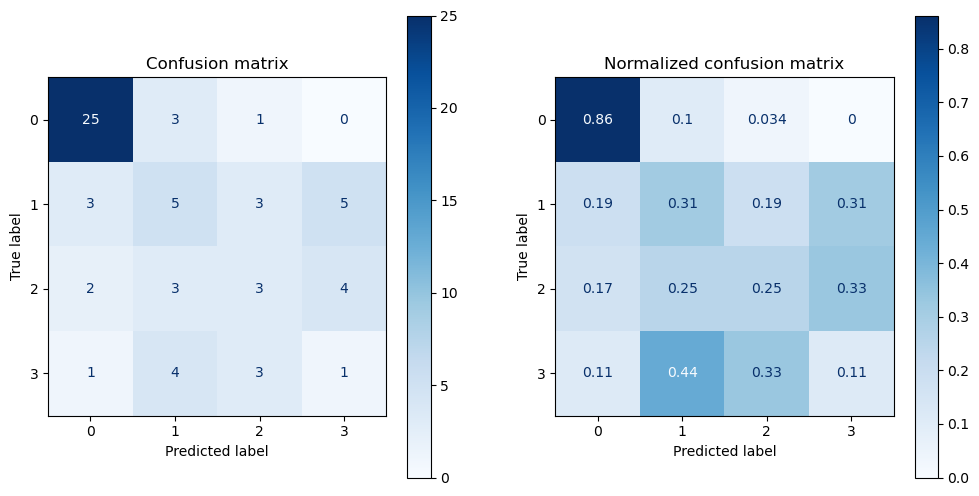

In [458]:
get_evaluation(y_test, mms_svc_prediction, mms_svc, X_test)

In [459]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


svc_parameters = {'svc__C': [0.1,1,10,100, 1000],
                 'svc__gamma': [0.001,0.01,0.1,1,10,100],
                 'svc__kernel': ['linear', 'rbf']}


svc = SVC(probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc', svc)])


g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)


In [460]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [461]:
std_svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_svc_result_df)


params  mean_test_score  \
0   {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.604348   
1   {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...         0.497826   
2   {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.604348   
3   {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...         0.521739   
4   {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.604348   
5   {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...         0.547826   
6   {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.604348   
7   {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...         0.550000   
8   {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...         0.604348   
9   {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...         0.421739   
10  {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...         0.604348   
11  {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...         0.310870   
12  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...         0.582609   
13  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...         0.497826   
14  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...         0.582609   
15  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...         0.613043   
16  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...         0.582609   
17  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...         0.645652   
18  {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...         0.582609   
19  {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...         0.621739   
20  {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...         0.582609   
21  {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...         0.513043   
22  {'svc__C': 1, 'svc__gamma': 100, 'svc__kernel'...         0.582609   
23  {'svc__C': 1, 'svc__gamma': 100, 'svc__kernel'...         0.350000   
24  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...         0.578261   
25  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...         0.604348   
26  {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...         0.578261   
27  {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...         0.636957   
28  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.578261   
29  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.682609   
30  {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel':...         0.578261   
31  {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel':...         0.639130   
32  {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel'...         0.578261   
33  {'svc__C': 10, 'svc__gamma': 10, 'svc__kernel'...         0.526087   
34  {'svc__C': 10, 'svc__gamma': 100, 'svc__kernel...         0.578261   
35  {'svc__C': 10, 'svc__gamma': 100, 'svc__kernel...         0.358696   
36  {'svc__C': 100, 'svc__gamma': 0.001, 'svc__ker...         0.580435   
37  {'svc__C': 100, 'svc__gamma': 0.001, 'svc__ker...         0.602174   
38  {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern...         0.580435   
39  {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kern...         0.667391   
40  {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kerne...         0.580435   
41  {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kerne...         0.704348   
42  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.580435   
43  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.639130   
44  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.580435   
45  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.526087   
46  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.580435   
47  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.358696   
48  {'svc__C': 1000, 'svc__gamma': 0.001, 'svc__ke...         0.580435   
49  {'svc__C': 1000, 'svc__gamma': 0.001, 'svc__ke...         0.604348   
50  {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__ker...         0.580435   
51  {'svc__C': 1000, 'svc__gamma': 0.01, 'svc__ker...         0.643478   
52  {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kern...         0.580435   
53  {'svc__C': 1000, 'svc__gamma': 0.1, 'svc__kern.

In [462]:
std_svc = g_svc.best_estimator_
std_svc_prediction = std_svc.predict(X_test)

오차 행렬
[[27  2  0  0]
 [ 2  8  2  4]
 [ 1  3  4  4]
 [ 1  4  2  2]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


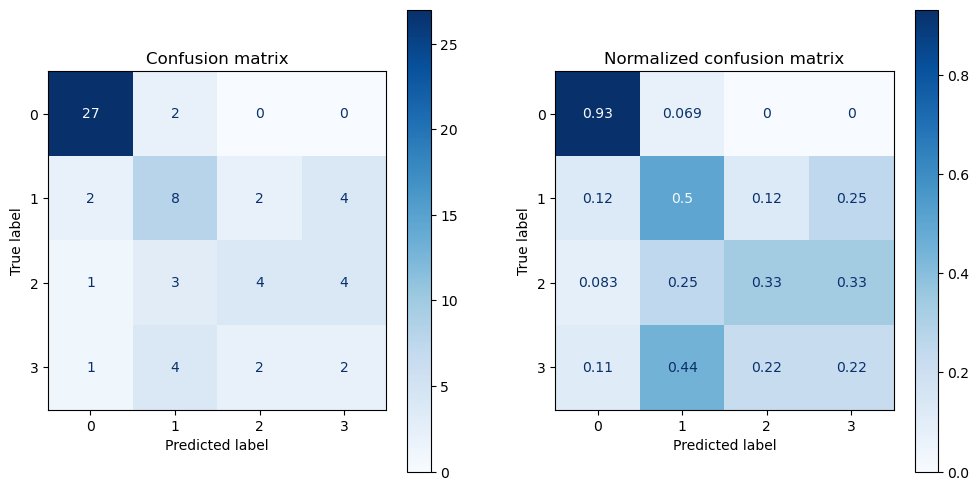

In [463]:
get_evaluation(y_test, std_svc_prediction, std_svc, X_test)

svc에 대해서는 스케일을 적용하지 않고 모델을 훈련시킨 것이 더 점수가 높게 나왔다.

#### KNN 적용

In [464]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_c_parameters = {'n_neighbors': [3,5,7,9,11]}

knn = KNeighborsClassifier()
g_knn = GridSearchCV(knn, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [465]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [466]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)


params  mean_test_score  rank_test_score
0   {'n_neighbors': 3}         0.684783                1
1   {'n_neighbors': 5}         0.667391                2
2   {'n_neighbors': 7}         0.654348                3
3   {'n_neighbors': 9}         0.632609                4
4  {'n_neighbors': 11}         0.606522                5

In [467]:
knn= g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

오차 행렬
[[25  1  1  2]
 [ 2  6  6  2]
 [ 0  3  6  3]
 [ 0  4  4  1]]
정확도: 0.5758, 정밀도: 0.5758, 재현율: 0.5758, F1: 0.5758
################################################################################


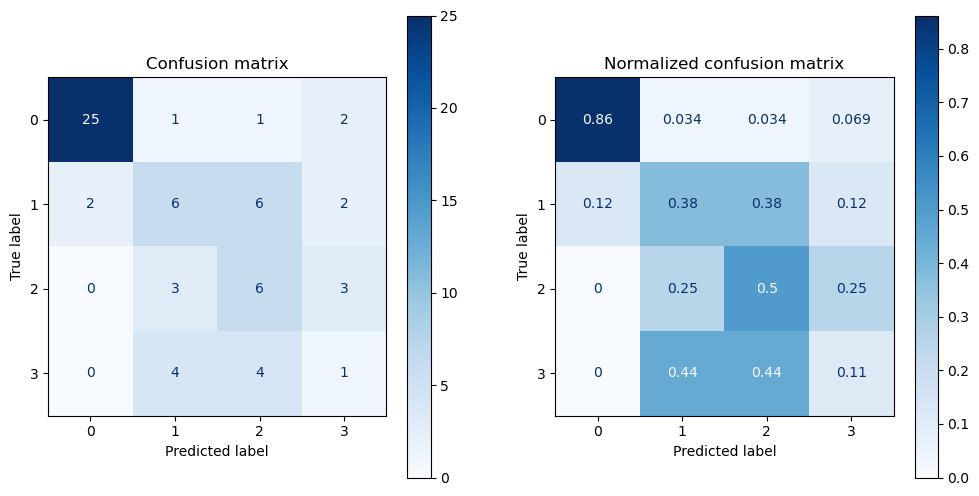

In [468]:
get_evaluation(y_test, knn_prediction, knn, X_test)

In [469]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_c_parameters = {'knn__n_neighbors': [7,9,11,13,15,17,19,21,23,25]}

knn = KNeighborsClassifier()
knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])

g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [470]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21, 23,
                                              25]},
             return_train_score=True)

In [471]:
std_knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_knn_result_df)


params  mean_test_score  rank_test_score
0   {'knn__n_neighbors': 7}         0.623913                2
1   {'knn__n_neighbors': 9}         0.626087                1
2  {'knn__n_neighbors': 11}         0.595652                3
3  {'knn__n_neighbors': 13}         0.567391                4
4  {'knn__n_neighbors': 15}         0.563043                5
5  {'knn__n_neighbors': 17}         0.550000               10
6  {'knn__n_neighbors': 19}         0.560870                6
7  {'knn__n_neighbors': 21}         0.556522                9
8  {'knn__n_neighbors': 23}         0.558696                8
9  {'knn__n_neighbors': 25}         0.560870                7

In [472]:
std_knn = g_knn.best_estimator_
std_knn_prediction = std_knn.predict(X_test)

오차 행렬
[[25  4  0  0]
 [ 0  8  6  2]
 [ 0  3  6  3]
 [ 0  4  3  2]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


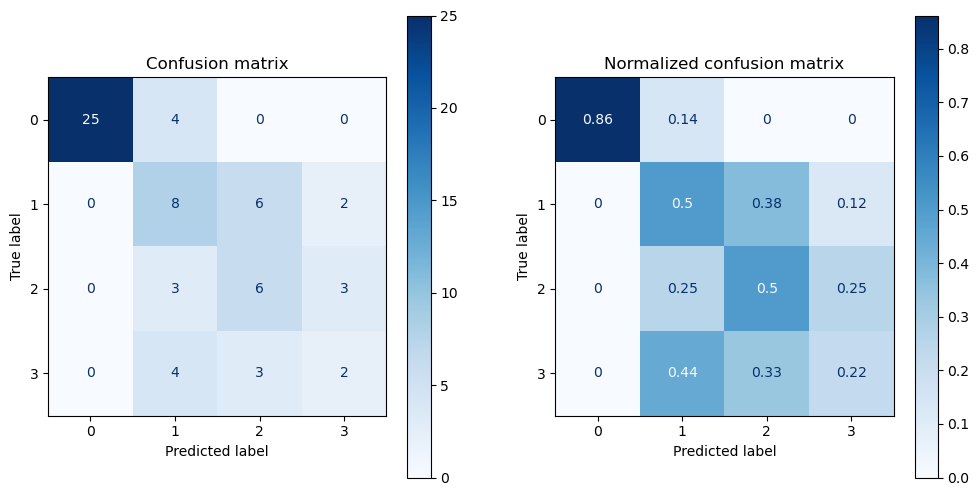

In [473]:
get_evaluation(y_test, std_knn_prediction, std_knn, X_test)

In [474]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_c_parameters = {'knn__n_neighbors': [7,9,11,13,15,17,19,21,23,25]}

knn = KNeighborsClassifier()
knn_pipe = Pipeline([('min_max_scaler', MinMaxScaler()),('knn', knn)])

g_knn = GridSearchCV(knn_pipe, param_grid=knn_c_parameters, cv=5, refit=True, return_train_score=True)

In [475]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21, 23,
                                              25]},
             return_train_score=True)

In [476]:
mms_knn = g_knn.best_estimator_
mms_knn_prediction = mms_knn.predict(X_test)

오차 행렬
[[25  2  0  2]
 [ 0  6  5  5]
 [ 0  5  5  2]
 [ 0  3  3  3]]
정확도: 0.5909, 정밀도: 0.5909, 재현율: 0.5909, F1: 0.5909
################################################################################


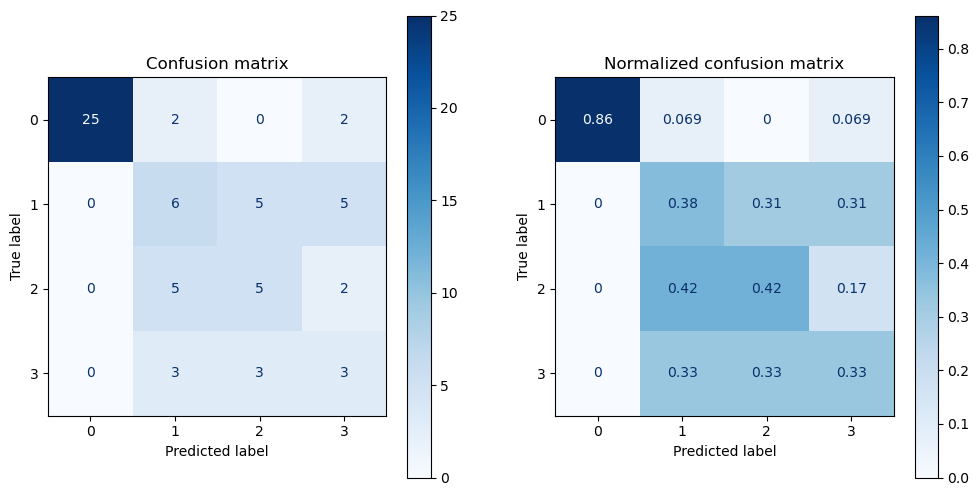

In [477]:
get_evaluation(y_test, mms_knn_prediction, mms_knn, X_test)

KNN 모델에 대해서는, StandardScale을 적용한 모델이 점수가 조금더 잘 나온것을 알 수 있었다.  
추가적으로, 2개의 모델에 대해서 minmax를 적용한 점수가 더 안나온것과 hist를 통해 확인한 분포에서 값의 차이가 크게 나타나질 않는 것으로 보인다.  
위 데이터에 대해서는 minmax를 적용하는 것이 오히려 점수가 더 안좋게 나오는 것을 알 수 있었다.


### Bagging 

In [478]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth' : [4,5,6,7,8,9,10,11,12],
    'min_samples_split' : [2,3,4,5,6,7]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=10, n_jobs=-1)


In [479]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [480]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(rfc_result_df)

params  mean_test_score  \
0    {'max_depth': 4, 'min_samples_split': 2}         0.604348   
1    {'max_depth': 4, 'min_samples_split': 3}         0.628261   
2    {'max_depth': 4, 'min_samples_split': 4}         0.636957   
3    {'max_depth': 4, 'min_samples_split': 5}         0.621739   
4    {'max_depth': 4, 'min_samples_split': 6}         0.623913   
5    {'max_depth': 4, 'min_samples_split': 7}         0.630435   
6    {'max_depth': 5, 'min_samples_split': 2}         0.647826   
7    {'max_depth': 5, 'min_samples_split': 3}         0.643478   
8    {'max_depth': 5, 'min_samples_split': 4}         0.658696   
9    {'max_depth': 5, 'min_samples_split': 5}         0.665217   
10   {'max_depth': 5, 'min_samples_split': 6}         0.647826   
11   {'max_depth': 5, 'min_samples_split': 7}         0.634783   
12   {'max_depth': 6, 'min_samples_split': 2}         0.665217   
13   {'max_depth': 6, 'min_samples_split': 3}         0.663043   
14   {'max_depth': 6, 'min_samples_split': 4}         0.671739   
15   {'max_depth': 6, 'min_samples_split': 5}         0.656522   
16   {'max_depth': 6, 'min_samples_split': 6}         0.650000   
17   {'max_depth': 6, 'min_samples_split': 7}         0.663043   
18   {'max_depth': 7, 'min_samples_split': 2}         0.676087   
19   {'max_depth': 7, 'min_samples_split': 3}         0.689130   
20   {'max_depth': 7, 'min_samples_split': 4}         0.684783   
21   {'max_depth': 7, 'min_samples_split': 5}         0.660870   
22   {'max_depth': 7, 'min_samples_split': 6}         0.684783   
23   {'max_depth': 7, 'min_samples_split': 7}         0.682609   
24   {'max_depth': 8, 'min_samples_split': 2}         0.686957   
25   {'max_depth': 8, 'min_samples_split': 3}         0.689130   
26   {'max_depth': 8, 'min_samples_split': 4}         0.702174   
27   {'max_depth': 8, 'min_samples_split': 5}         0.691304   
28   {'max_depth': 8, 'min_samples_split': 6}         0.713043   
29   {'max_depth': 8, 'min_samples_split': 7}         0.686957   
30   {'max_depth': 9, 'min_samples_split': 2}         0.734783   
31   {'max_depth': 9, 'min_samples_split': 3}         0.734783   
32   {'max_depth': 9, 'min_samples_split': 4}         0.697826   
33   {'max_depth': 9, 'min_samples_split': 5}         0.704348   
34   {'max_depth': 9, 'min_samples_split': 6}         0.719565   
35   {'max_depth': 9, 'min_samples_split': 7}         0.691304   
36  {'max_depth': 10, 'min_samples_split': 2}         0.736957   
37  {'max_depth': 10, 'min_samples_split': 3}         0.743478   
38  {'max_depth': 10, 'min_samples_split': 4}         0.736957   
39  {'max_depth': 10, 'min_samples_split': 5}         0.715217   
40  {'max_depth': 10, 'min_samples_split': 6}         0.726087   
41  {'max_depth': 10, 'min_samples_split': 7}         0.726087   
42  {'max_depth': 11, 'min_samples_split': 2}         0.747826   
43  {'max_depth': 11, 'min_samples_split': 3}         0.730435   
44  {'max_depth': 11, 'min_samples_split': 4}         0.728261   
45  {'max_depth': 11, 'min_samples_split': 5}         0.741304   
46  {'max_depth': 11, 'min_samples_split': 6}         0.717391   
47  {'max_depth': 11, 'min_samples_split': 7}         0.719565   
48  {'max_depth': 12, 'min_samples_split': 2}         0.739130   
49  {'max_depth': 12, 'min_samples_split': 3}         0.743478   
50  {'max_depth': 12, 'min_samples_split': 4}         0.752174   
51  {'max_depth': 12, 'min_samples_split': 5}         0.734783   
52  {'max_depth': 12, 'min_samples_split': 6}         0.747826   
53  {'max_depth': 12, 'min_samples_split': 7}         0.719565   

    rank_test_score  
0                54  
1                51  
2                48  
3                53  
4                52  
5                50  
6                46  
7                47  
8                42  
9                37  
10               45  
11               49  
12               38  
13               39  
14               36  
15               43  
16               44  
17          

In [481]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[27  1  0  1]
 [ 2  6  5  3]
 [ 0  3  6  3]
 [ 1  4  2  2]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


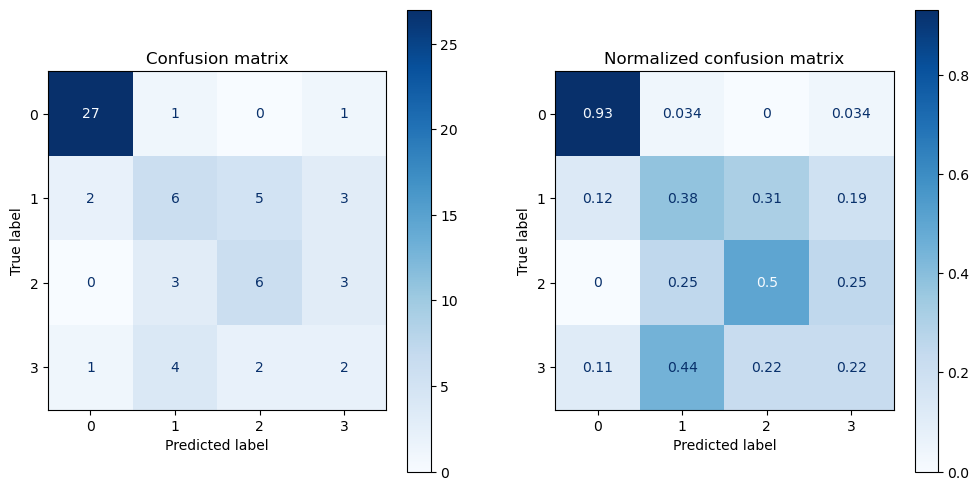

In [482]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

In [483]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


rfc_parameters = {
    'rfc__max_depth' : [4,5,6,7,8,9,10,11,12],
    'rfc__min_samples_split' : [2,3,4,5,6,7]
}

rfc = RandomForestClassifier(n_estimators=100)
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()),('rfc', rfc)])


g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=10, n_jobs=-1)


In [484]:
g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'rfc__min_samples_split': [2, 3, 4, 5, 6, 7]})

In [485]:
std_rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params','mean_test_score','rank_test_score']]
display(std_rfc_result_df)

params  mean_test_score  \
0   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.628261   
1   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.604348   
2   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.621739   
3   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.597826   
4   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.602174   
5   {'rfc__max_depth': 4, 'rfc__min_samples_split'...         0.615217   
6   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.634783   
7   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.639130   
8   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.650000   
9   {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.641304   
10  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.636957   
11  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.650000   
12  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.676087   
13  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.652174   
14  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.654348   
15  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.663043   
16  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.660870   
17  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.665217   
18  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.700000   
19  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.680435   
20  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.684783   
21  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.673913   
22  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.678261   
23  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.665217   
24  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.708696   
25  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.697826   
26  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.708696   
27  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.700000   
28  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.667391   
29  {'rfc__max_depth': 8, 'rfc__min_samples_split'...         0.693478   
30  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.721739   
31  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.715217   
32  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.721739   
33  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.721739   
34  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.704348   
35  {'rfc__max_depth': 9, 'rfc__min_samples_split'...         0.710870   
36  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.736957   
37  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.721739   
38  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.728261   
39  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.734783   
40  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.708696   
41  {'rfc__max_depth': 10, 'rfc__min_samples_split...         0.719565   
42  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.723913   
43  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.732609   
44  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.728261   
45  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.726087   
46  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.730435   
47  {'rfc__max_depth': 11, 'rfc__min_samples_split...         0.723913   
48  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.752174   
49  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.736957   
50  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.736957   
51  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.732609   
52  {'rfc__max_depth': 12, 'rfc__min_samples_split...         0.719565   
53  {'rfc__max_depth': 12, 'rfc__min_samples_split.

In [486]:
std_rfc = g_rfc.best_estimator_
std_rfc_prediction = std_rfc.predict(X_test)

오차 행렬
[[27  2  0  0]
 [ 2  7  5  2]
 [ 1  1  7  3]
 [ 0  4  2  3]]
정확도: 0.6667, 정밀도: 0.6667, 재현율: 0.6667, F1: 0.6667
################################################################################


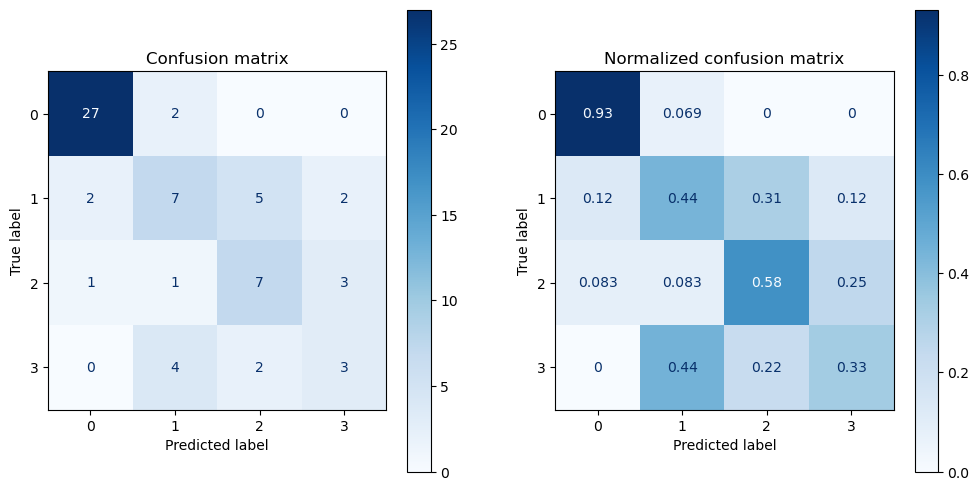

In [487]:
get_evaluation(y_test, std_rfc_prediction, std_rfc, X_test)

rfc 결과, 스케일링을 한 값과 하지 않은 값의 차이가 없었다.

### Adaboost

In [488]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate' : [0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4, 0.5, 0.7, 1]
}

ada = AdaBoostClassifier()
g_ada = GridSearchCV(ada, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True)


In [489]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True)

In [490]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(ada_result_df['params'].iloc[1])

display(ada_result_df)

{'learning_rate': 0.02, 'n_estimators': 100}


params  mean_test_score  \
0     {'learning_rate': 0.02, 'n_estimators': 50}         0.536957   
1    {'learning_rate': 0.02, 'n_estimators': 100}         0.495652   
2    {'learning_rate': 0.02, 'n_estimators': 150}         0.480435   
3    {'learning_rate': 0.02, 'n_estimators': 200}         0.486957   
4    {'learning_rate': 0.02, 'n_estimators': 250}         0.491304   
..                                            ...              ...   
105     {'learning_rate': 1, 'n_estimators': 300}         0.528261   
106     {'learning_rate': 1, 'n_estimators': 350}         0.497826   
107     {'learning_rate': 1, 'n_estimators': 400}         0.508696   
108     {'learning_rate': 1, 'n_estimators': 450}         0.506522   
109     {'learning_rate': 1, 'n_estimators': 500}         0.510870   

     rank_test_score  
0                  8  
1                100  
2                110  
3                106  
4                103  
..               ...  
105               16  
106               92  
107               74  
108               78  
109               70  

[110 rows x 3 columns]

In [491]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

오차 행렬
[[22  6  1  0]
 [ 0 11  2  3]
 [ 0  3  5  4]
 [ 1  3  2  3]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


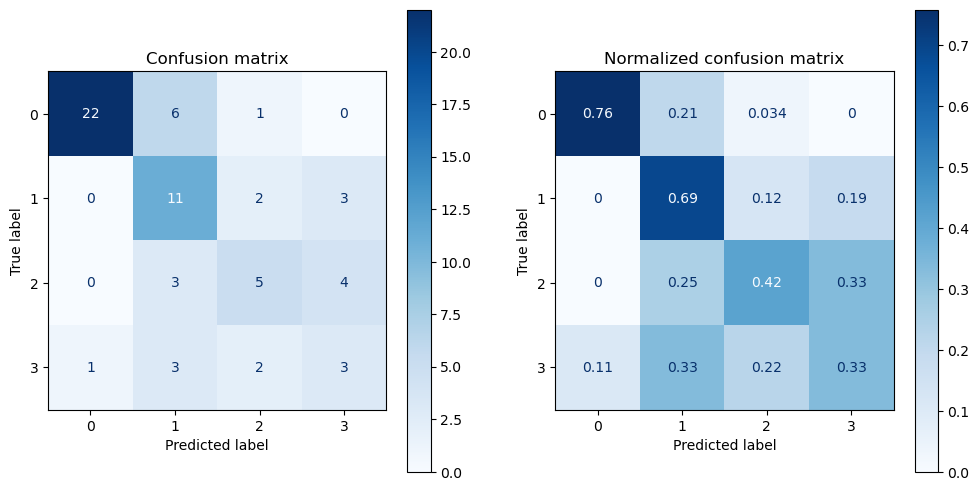

In [492]:
get_evaluation(y_test, ada_prediction, ada, X_test)

In [493]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


ada_parameters = {
    'ada__n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'ada__learning_rate' : [0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4, 0.5, 0.7, 1]
}

ada = AdaBoostClassifier()
ada_pipe = Pipeline([('standard_scaler', StandardScaler()),('ada', ada)])

g_ada = GridSearchCV(ada_pipe, param_grid=ada_parameters, cv=5, refit=True, return_train_score=True)


In [494]:
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1,
                                                0.2, 0.3, 0.4, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             return_train_score=True)

In [495]:
std_ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(std_ada_result_df['params'].iloc[1])

display(std_ada_result_df)

{'ada__learning_rate': 0.02, 'ada__n_estimators': 100}


params  mean_test_score  \
0    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.536957   
1    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.495652   
2    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.480435   
3    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.486957   
4    {'ada__learning_rate': 0.02, 'ada__n_estimator...         0.491304   
..                                                 ...              ...   
105  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.528261   
106  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.497826   
107  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.508696   
108  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.506522   
109  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.510870   

     rank_test_score  
0                  8  
1                100  
2                110  
3                106  
4                103  
..               ...  
105               16  
106               92  
107               74  
108               78  
109               70  

[110 rows x 3 columns]

In [496]:
std_ada = g_ada.best_estimator_
std_ada_prediction = std_ada.predict(X_test)

오차 행렬
[[22  6  1  0]
 [ 0 11  2  3]
 [ 0  3  5  4]
 [ 1  3  2  3]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


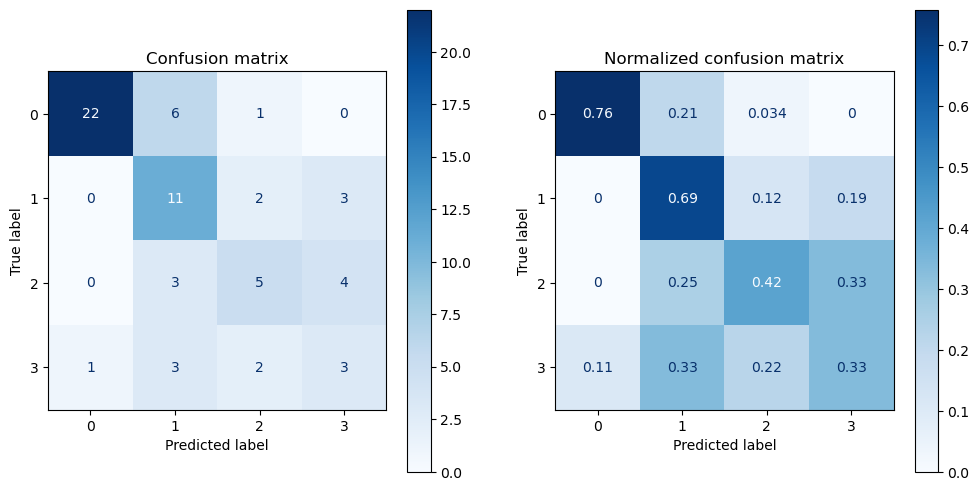

In [497]:
get_evaluation(y_test, std_ada_prediction, std_ada, X_test)

AdaBoost 결과 스케일링 적용 유무에 상관없이 RandomForest 모델과 동일한 점수가 나옴을 알 수 있었다.

### GBM 

In [498]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate': [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)


In [499]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12,
                                           0.14, 0.16, 0.18, 0.2],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [500]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params','mean_test_score', 'rank_test_score']]
print(gbc_result_df.iloc[20])
display(gbc_result_df)

params             {'learning_rate': 0.06, 'n_estimators': 50}
mean_test_score                                       0.658801
rank_test_score                                             90
Name: 20, dtype: object


params  mean_test_score  \
0    {'learning_rate': 0.02, 'n_estimators': 50}         0.604420   
1   {'learning_rate': 0.02, 'n_estimators': 100}         0.630535   
2   {'learning_rate': 0.02, 'n_estimators': 150}         0.652279   
3   {'learning_rate': 0.02, 'n_estimators': 200}         0.667530   
4   {'learning_rate': 0.02, 'n_estimators': 250}         0.674009   
..                                           ...              ...   
95   {'learning_rate': 0.2, 'n_estimators': 300}         0.658801   
96   {'learning_rate': 0.2, 'n_estimators': 350}         0.650129   
97   {'learning_rate': 0.2, 'n_estimators': 400}         0.661008   
98   {'learning_rate': 0.2, 'n_estimators': 450}         0.656651   
99   {'learning_rate': 0.2, 'n_estimators': 500}         0.658815   

    rank_test_score  
0               100  
1                99  
2                94  
3                67  
4                43  
..              ...  
95               90  
96               96  
97               81  
98               92  
99               87  

[100 rows x 3 columns]

In [501]:
gbc= g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[27  2  0  0]
 [ 2  7  5  2]
 [ 1  3  5  3]
 [ 1  2  2  4]]
정확도: 0.6515, 정밀도: 0.6515, 재현율: 0.6515, F1: 0.6515
################################################################################


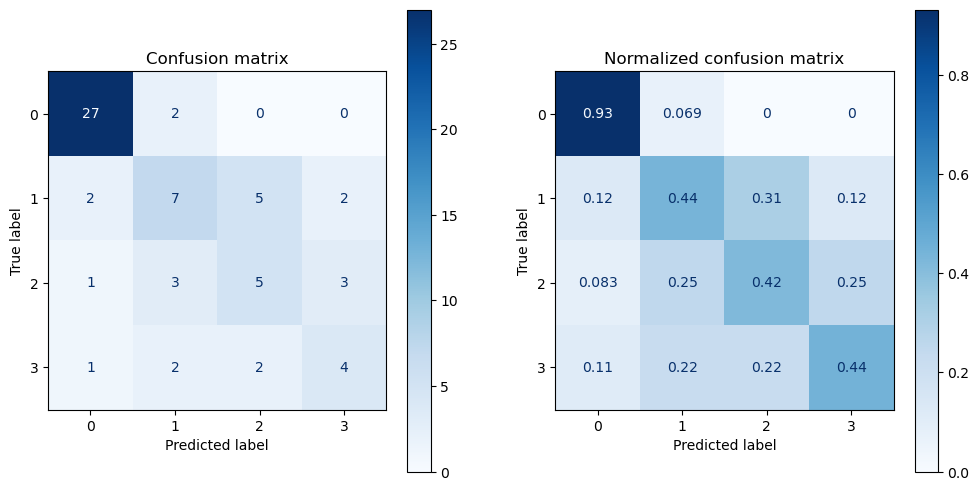

In [502]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

In [503]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

parameters = {
    'gbc__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'gbc__learning_rate': [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
}

gbc= GradientBoostingClassifier(loss='log_loss')
gbc_pipe = Pipeline([('standard_scaler', StandardScaler()),('gbc', gbc)])

g_gbc = GridSearchCV(gbc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)


In [504]:
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1,
                                                0.12, 0.14, 0.16, 0.18, 0.2],
                         'gbc__n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                               400, 450, 500]},
             return_train_score=True)

In [505]:
std_gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params','mean_test_score', 'rank_test_score']]
#print(std_gbc_result_df.iloc[2])
display(std_gbc_result_df)

params  mean_test_score  \
0   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.604420   
1   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.630535   
2   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.654444   
3   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.667530   
4   {'gbc__learning_rate': 0.02, 'gbc__n_estimator...         0.674009   
..                                                ...              ...   
95  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.656636   
96  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.650129   
97  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.654472   
98  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.660994   
99  {'gbc__learning_rate': 0.2, 'gbc__n_estimators...         0.658815   

    rank_test_score  
0               100  
1                99  
2                95  
3                62  
4                44  
..              ...  
95               90  
96               96  
97               94  
98               85  
99               87  

[100 rows x 3 columns]

In [506]:
std_gbc = g_gbc.best_estimator_
std_gbc_prediction = std_gbc.predict(X_test)

오차 행렬
[[28  1  0  0]
 [ 0  8  5  3]
 [ 1  3  5  3]
 [ 1  2  2  4]]
정확도: 0.6818, 정밀도: 0.6818, 재현율: 0.6818, F1: 0.6818
################################################################################


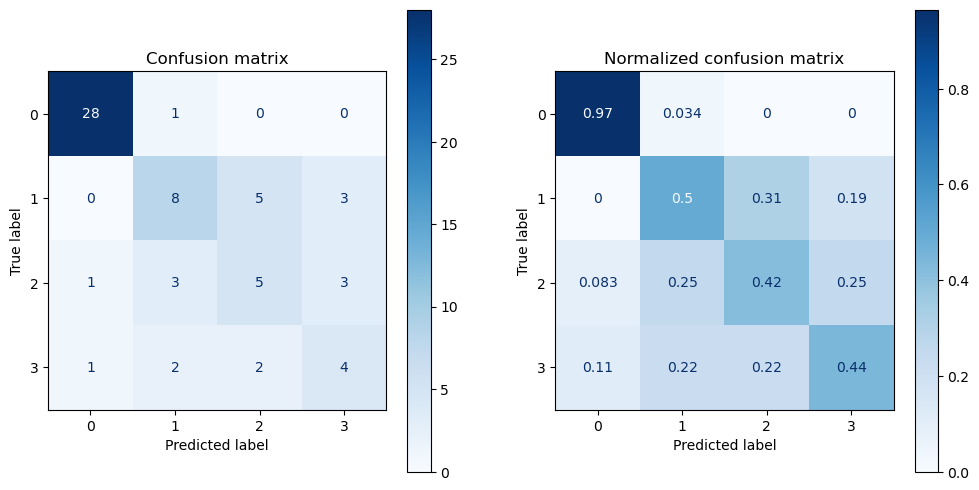

In [507]:
get_evaluation(y_test, std_gbc_prediction, std_gbc, X_test)

GBM 결과 스케일링을 적용한 것 보다 스케일링을 적용하지 않은 모델이 점수가 더 잘나타났다.

### XGBoost

In [508]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

In [509]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=30, eval_set=evals)

[0]	validation_0-mlogloss:1.08736	validation_1-mlogloss:1.08425
[1]	validation_0-mlogloss:0.90673	validation_1-mlogloss:0.90069
[2]	validation_0-mlogloss:0.77871	validation_1-mlogloss:0.76215
[3]	validation_0-mlogloss:0.68519	validation_1-mlogloss:0.65887
[4]	validation_0-mlogloss:0.60821	validation_1-mlogloss:0.57850
[5]	validation_0-mlogloss:0.54677	validation_1-mlogloss:0.51401
[6]	validation_0-mlogloss:0.49329	validation_1-mlogloss:0.46051
[7]	validation_0-mlogloss:0.45274	validation_1-mlogloss:0.41648
[8]	validation_0-mlogloss:0.41396	validation_1-mlogloss:0.38050
[9]	validation_0-mlogloss:0.38083	validation_1-mlogloss:0.35166
[10]	validation_0-mlogloss:0.35349	validation_1-mlogloss:0.33137
[11]	validation_0-mlogloss:0.32911	validation_1-mlogloss:0.30308
[12]	validation_0-mlogloss:0.30191	validation_1-mlogloss:0.28425
[13]	validation_0-mlogloss:0.28754	validation_1-mlogloss:0.26881
[14]	validation_0-mlogloss:0.27108	validation_1-mlogloss:0.24693
[15]	validation_0-mlogloss:0.25350	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-mlogloss:0.07064	validation_1-mlogloss:0.05810
[48]	validation_0-mlogloss:0.06880	validation_1-mlogloss:0.05622
[49]	validation_0-mlogloss:0.06682	validation_1-mlogloss:0.05567
[50]	validation_0-mlogloss:0.06563	validation_1-mlogloss:0.05457
[51]	validation_0-mlogloss:0.06409	validation_1-mlogloss:0.05295
[52]	validation_0-mlogloss:0.06249	validation_1-mlogloss:0.05143
[53]	validation_0-mlogloss:0.06115	validation_1-mlogloss:0.05042
[54]	validation_0-mlogloss:0.06000	validation_1-mlogloss:0.04942
[55]	validation_0-mlogloss:0.05874	validation_1-mlogloss:0.04873
[56]	validation_0-mlogloss:0.05775	validation_1-mlogloss:0.04752
[57]	validation_0-mlogloss:0.05677	validation_1-mlogloss:0.04622
[58]	validation_0-mlogloss:0.05545	validation_1-mlogloss:0.04510
[59]	validation_0-mlogloss:0.05445	validation_1-mlogloss:0.04422
[60]	validation_0-mlogloss:0.05376	validation_1-mlogloss:0.04336
[61]	validation_0-mlogloss:0.05262	validation_1-mlogloss:0.04296
[62]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [510]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.710870   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.719565   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.726087   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.723913   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.726087   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.730435   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.723913   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.719565   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.715217   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.715217   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.717391   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.719565   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.732609   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.732609   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.728261   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.730435   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.730435   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.739130   

    rank_test_score  
0                18  
1                14  
2                 8  
3                10  
4                 8  
5                 4  
6                10  
7                12  
8                16  
9                16  
10               15  
11               12  
12                3  
13                2  
14                7  
15                4  
16                4  
17                1

In [511]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

오차 행렬
[[27  1  1  0]
 [ 2  5  5  4]
 [ 1  3  4  4]
 [ 1  2  1  5]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


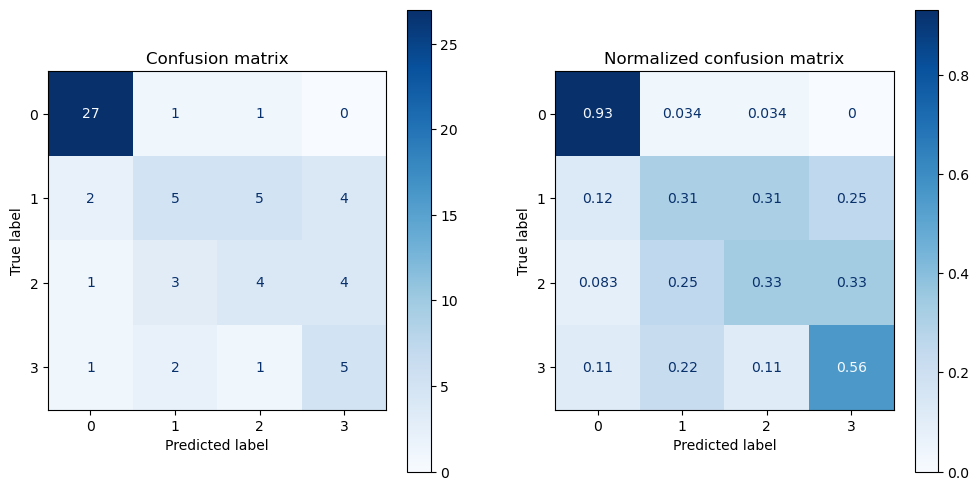

In [512]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

In [513]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_sw = std.fit_transform(under_sw_df2.iloc[:, :-1])

In [514]:
std_pre_sw_df = pd.DataFrame(std_pre_sw, columns=under_sw_df2.iloc[:, :-1].columns)
std_pre_sw_df['target'] = under_sw_df2['target']
std_pre_sw_df

rating      wifi       GPS       NFC  voice_calling  Bluetooth  \
0    1.001142 -0.598609 -0.840718 -0.584435      -0.489432   0.509742   
1   -0.994341 -0.598609 -0.840718 -0.584435      -0.489432  -1.460723   
2    1.001142 -0.598609 -0.840718 -0.584435      -0.489432  -1.460723   
3    1.222862 -0.598609 -0.840718 -0.584435      -0.489432   1.166564   
4    0.335981 -0.598609 -0.840718 -0.584435      -0.489432   0.181331   
..        ...       ...       ...       ...            ...        ...   
321  1.222862  1.670538  1.189460 -0.584435      -0.489432   0.181331   
322  0.557701 -0.598609  1.189460  1.711055      -0.489432   0.838153   
323  0.557701 -0.598609 -0.840718 -0.584435      -0.489432  -1.460723   
324 -1.659502 -0.598609  1.189460 -0.584435      -0.489432   0.181331   
325 -0.107460  1.670538  1.189460  1.711055      -0.489432   0.181331   

     Bluetooth_calling  display_size_inches  water_resistance  dust_proof  \
0             0.650831             0.682258         -0.819631    0.684448   
1             0.650831            -0.372217         -0.819631    0.684448   
2             0.650831            -0.684654         -0.819631    0.684448   
3             0.650831             0.682258         -0.819631   -1.461032   
4             0.650831            -0.137889         -0.819631    0.684448   
..                 ...                  ...               ...         ...   
321           0.650831             0.018329          1.220061    0.684448   
322           0.650831            -0.684654          1.220061   -1.461032   
323          -1.536498             0.369821         -0.819631   -1.461032   
324           0.650831            -0.684654          1.220061    0.684448   
325          -1.536498            -1.582912          1.220061    0.684448   

     ...  calorie_count  sleep_monitor  step_count  Pedometer  Blood_oxygen  \
0    ...       1.167184       0.840718    0.793725   1.089917      0.499041   
1    ...       1.167184       0.840718    0.793725   1.089917      0.499041   
2    ...       1.167184       0.840718    0.793725   1.089917      0.499041   
3    ...       1.167184       0.840718    0.793725   1.089917      0.499041   
4    ...       1.167184       0.840718    0.793725   1.089917      0.499041   
..   ...            ...            ...         ...        ...           ...   
321  ...      -0.856763      -1.189460   -1.259882  -0.917501     -2.003842   
322  ...      -0.856763      -1.189460   -1.259882  -0.917501      0.499041   
323  ...      -0.856763       0.840718    0.793725   1.089917      0.499041   
324  ...      -0.856763      -1.189460   -1.259882  -0.917501      0.499041   
325  ...      -0.856763      -1.189460   -1.259882  -0.917501      0.499041   

     alarm_clock  stopwatch  reminder     timer  target  
0      -0.335601  -0.363242 -0.357810 -0.357810       3  
1      -0.335601  -0.363242 -0.357810 -0.357810       1  
2      -0.335601  -0.363242 -0.357810 -0.357810       1  
3      -0.335601  -0.363242 -0.357810 -0.357810       3  
4      -0.335601  -0.363242 -0.357810 -0.357810       0  
..           ...        ...       ...       ...     ...  
321    -0.335601  -0.363242 -0.357810 -0.357810       0  
322    -0.335601  -0.363242 -0.357810 -0.357810       0  
323    -0.335601   2.752989  2.794783  2.794783       1  
324    -0.335601  -0.363242 -0.357810 -0.357810       0  
325    -0.335601  -0.363242 -0.357810 -0.357810       0  

[326 rows x 23 columns]

In [515]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = std_pre_sw_df.iloc[:, :-1], std_pre_sw_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

target
2    115
0    115
1    115
3    115
Name: count, dtype: int64

In [516]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(
    xgb,
    param_grid=parameters,
    cv=5,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)


In [517]:
g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=30, eval_set=evals)

[0]	validation_0-mlogloss:1.06808	validation_1-mlogloss:1.03738
[1]	validation_0-mlogloss:0.87803	validation_1-mlogloss:0.83591
[2]	validation_0-mlogloss:0.74414	validation_1-mlogloss:0.70445
[3]	validation_0-mlogloss:0.64355	validation_1-mlogloss:0.60395
[4]	validation_0-mlogloss:0.56945	validation_1-mlogloss:0.52431
[5]	validation_0-mlogloss:0.51544	validation_1-mlogloss:0.46229
[6]	validation_0-mlogloss:0.46483	validation_1-mlogloss:0.42053
[7]	validation_0-mlogloss:0.42319	validation_1-mlogloss:0.37944
[8]	validation_0-mlogloss:0.38421	validation_1-mlogloss:0.34539
[9]	validation_0-mlogloss:0.35091	validation_1-mlogloss:0.31379
[10]	validation_0-mlogloss:0.32608	validation_1-mlogloss:0.28329
[11]	validation_0-mlogloss:0.30002	validation_1-mlogloss:0.25314
[12]	validation_0-mlogloss:0.27988	validation_1-mlogloss:0.22854
[13]	validation_0-mlogloss:0.26406	validation_1-mlogloss:0.21100
[14]	validation_0-mlogloss:0.24570	validation_1-mlogloss:0.19019
[15]	validation_0-mlogloss:0.23105	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-mlogloss:0.04786	validation_1-mlogloss:0.03585
[58]	validation_0-mlogloss:0.04702	validation_1-mlogloss:0.03521
[59]	validation_0-mlogloss:0.04605	validation_1-mlogloss:0.03486
[60]	validation_0-mlogloss:0.04540	validation_1-mlogloss:0.03414
[61]	validation_0-mlogloss:0.04482	validation_1-mlogloss:0.03360
[62]	validation_0-mlogloss:0.04427	validation_1-mlogloss:0.03314
[63]	validation_0-mlogloss:0.04354	validation_1-mlogloss:0.03245
[64]	validation_0-mlogloss:0.04287	validation_1-mlogloss:0.03182
[65]	validation_0-mlogloss:0.04219	validation_1-mlogloss:0.03128
[66]	validation_0-mlogloss:0.04178	validation_1-mlogloss:0.03092
[67]	validation_0-mlogloss:0.04134	validation_1-mlogloss:0.03046
[68]	validation_0-mlogloss:0.04069	validation_1-mlogloss:0.03011
[69]	validation_0-mlogloss:0.04029	validation_1-mlogloss:0.02945
[70]	validation_0-mlogloss:0.03972	validation_1-mlogloss:0.02924
[71]	validation_0-mlogloss:0.03925	validation_1-mlogloss:0.02883
[72]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [518]:
std_xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(std_xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 50}         0.767391   
1    {'learning_rate': 0.1, 'n_estimators': 60}         0.765217   
2    {'learning_rate': 0.1, 'n_estimators': 70}         0.752174   
3    {'learning_rate': 0.1, 'n_estimators': 80}         0.763043   
4    {'learning_rate': 0.1, 'n_estimators': 90}         0.767391   
5   {'learning_rate': 0.1, 'n_estimators': 100}         0.765217   
6    {'learning_rate': 0.2, 'n_estimators': 50}         0.771739   
7    {'learning_rate': 0.2, 'n_estimators': 60}         0.776087   
8    {'learning_rate': 0.2, 'n_estimators': 70}         0.782609   
9    {'learning_rate': 0.2, 'n_estimators': 80}         0.778261   
10   {'learning_rate': 0.2, 'n_estimators': 90}         0.778261   
11  {'learning_rate': 0.2, 'n_estimators': 100}         0.776087   
12   {'learning_rate': 0.3, 'n_estimators': 50}         0.771739   
13   {'learning_rate': 0.3, 'n_estimators': 60}         0.773913   
14   {'learning_rate': 0.3, 'n_estimators': 70}         0.778261   
15   {'learning_rate': 0.3, 'n_estimators': 80}         0.778261   
16   {'learning_rate': 0.3, 'n_estimators': 90}         0.780435   
17  {'learning_rate': 0.3, 'n_estimators': 100}         0.784783   

    rank_test_score  
0                13  
1                15  
2                18  
3                17  
4                13  
5                15  
6                11  
7                 9  
8                 2  
9                 4  
10                4  
11                8  
12               11  
13               10  
14                4  
15                4  
16                3  
17                1

In [519]:
std_xgb = g_xgb.best_estimator_
std_xgb_prediction = std_xgb.predict(X_test)


오차 행렬
[[27  2  0  0]
 [ 2  5  5  4]
 [ 0  2  5  5]
 [ 1  2  2  4]]
정확도: 0.6212, 정밀도: 0.6212, 재현율: 0.6212, F1: 0.6212
################################################################################


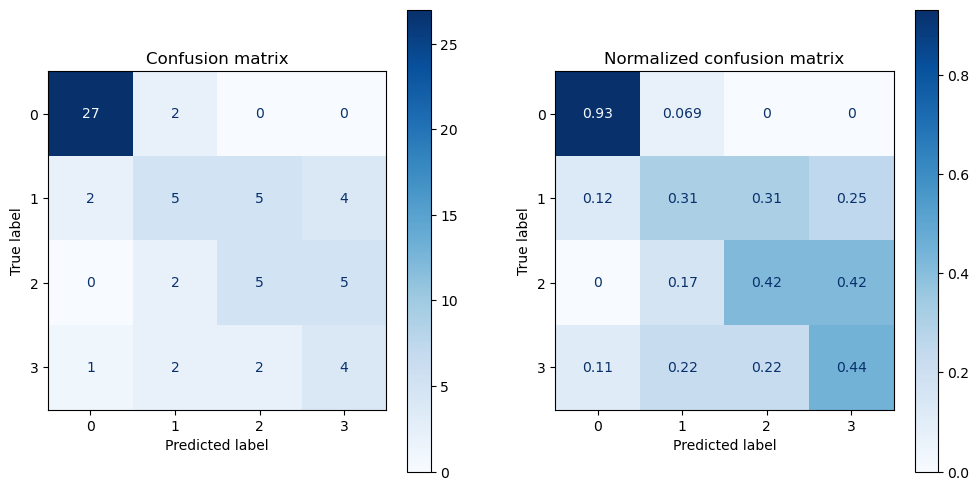

In [520]:
get_evaluation(y_test, std_xgb_prediction, std_xgb, X_test)

XGBoost로 진행해도 점수가 동일하게 나타남을 알 수 있었다.

### LightGBM

In [521]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = under_sw_df2.iloc[:, :-1], under_sw_df2.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)

y_train_over.value_counts()

target
2    115
0    115
1    115
3    115
Name: count, dtype: int64

In [522]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [523]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.706522   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.730435   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.721739   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.732609   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.719565   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.730435   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.726087   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.719565   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.721739   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.732609   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.719565   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.715217   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.719565   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.721739   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.721739   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.723913   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.730435   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.730435   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.730435   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.728261   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.734783   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.734783   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.734783   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.726087   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.723913   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.741304   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.728261   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.730435   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.730435   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.730435   

    rank_test_score  
0                30  
1                 7  
2                21  
3                 5  
4                25  
5                 7  
6                17  
7                25  
8                21  
9                 6  
10               28  
11               29  
12               25  
13               21  
14               21  
15               19  
16                7  
17                7  
18                7  
19               15  
20                2  
21                2  
22                2  
23               18  
24               19  
25                1  
26               15  
27                7  
28                7  
29                7

In [524]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[28  1  0  0]
 [ 1  7  5  3]
 [ 1  3  5  3]
 [ 2  2  1  4]]
정확도: 0.6667, 정밀도: 0.6667, 재현율: 0.6667, F1: 0.6667
################################################################################


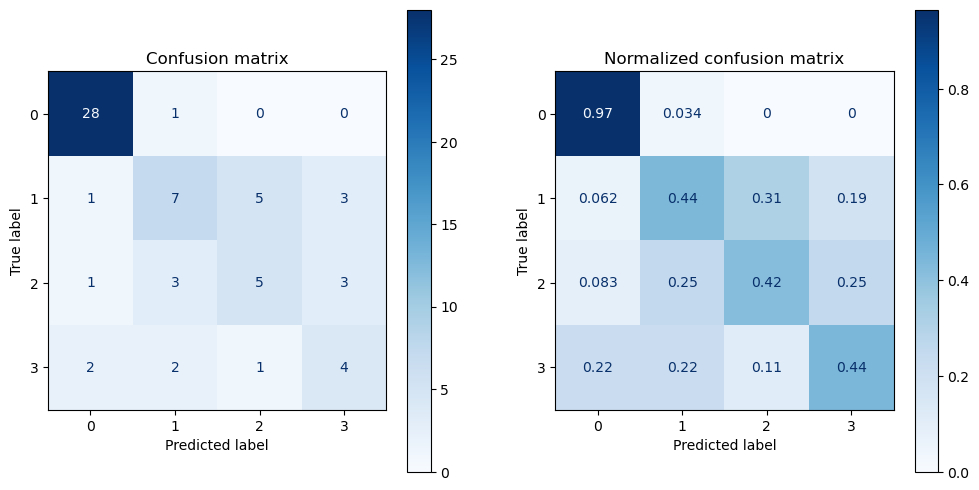

In [525]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

In [526]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier


features, targets = std_pre_sw_df.iloc[:, :-1], std_pre_sw_df.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, refit=True, return_train_score=True, n_jobs=-1)

y_train_over.value_counts()

target
2    115
0    115
1    115
3    115
Name: count, dtype: int64

In [527]:
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [528]:
std_lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params','mean_test_score','rank_test_score']]
display(std_lgbm_result_df)

params  mean_test_score  \
0   {'learning_rate': 0.05, 'n_estimators': 100}         0.771739   
1   {'learning_rate': 0.05, 'n_estimators': 200}         0.776087   
2   {'learning_rate': 0.05, 'n_estimators': 300}         0.771739   
3   {'learning_rate': 0.05, 'n_estimators': 400}         0.773913   
4   {'learning_rate': 0.05, 'n_estimators': 500}         0.786957   
5    {'learning_rate': 0.1, 'n_estimators': 100}         0.782609   
6    {'learning_rate': 0.1, 'n_estimators': 200}         0.778261   
7    {'learning_rate': 0.1, 'n_estimators': 300}         0.773913   
8    {'learning_rate': 0.1, 'n_estimators': 400}         0.771739   
9    {'learning_rate': 0.1, 'n_estimators': 500}         0.771739   
10  {'learning_rate': 0.15, 'n_estimators': 100}         0.760870   
11  {'learning_rate': 0.15, 'n_estimators': 200}         0.767391   
12  {'learning_rate': 0.15, 'n_estimators': 300}         0.776087   
13  {'learning_rate': 0.15, 'n_estimators': 400}         0.769565   
14  {'learning_rate': 0.15, 'n_estimators': 500}         0.771739   
15   {'learning_rate': 0.2, 'n_estimators': 100}         0.780435   
16   {'learning_rate': 0.2, 'n_estimators': 200}         0.776087   
17   {'learning_rate': 0.2, 'n_estimators': 300}         0.778261   
18   {'learning_rate': 0.2, 'n_estimators': 400}         0.778261   
19   {'learning_rate': 0.2, 'n_estimators': 500}         0.778261   
20  {'learning_rate': 0.25, 'n_estimators': 100}         0.760870   
21  {'learning_rate': 0.25, 'n_estimators': 200}         0.758696   
22  {'learning_rate': 0.25, 'n_estimators': 300}         0.763043   
23  {'learning_rate': 0.25, 'n_estimators': 400}         0.760870   
24  {'learning_rate': 0.25, 'n_estimators': 500}         0.760870   
25   {'learning_rate': 0.3, 'n_estimators': 100}         0.756522   
26   {'learning_rate': 0.3, 'n_estimators': 200}         0.754348   
27   {'learning_rate': 0.3, 'n_estimators': 300}         0.763043   
28   {'learning_rate': 0.3, 'n_estimators': 400}         0.763043   
29   {'learning_rate': 0.3, 'n_estimators': 500}         0.763043   

    rank_test_score  
0                13  
1                10  
2                13  
3                11  
4                 1  
5                 2  
6                 4  
7                12  
8                13  
9                13  
10               24  
11               19  
12                8  
13               18  
14               13  
15                3  
16                8  
17                4  
18                4  
19                4  
20               24  
21               28  
22               20  
23               26  
24               26  
25               29  
26               30  
27               20  
28               20  
29               20

In [529]:
std_lgbm = g_lgbm.best_estimator_
std_lgbm_prediction = std_lgbm.predict(X_test)

오차 행렬
[[27  1  1  0]
 [ 5  4  3  4]
 [ 1  2  5  4]
 [ 1  3  1  4]]
정확도: 0.6061, 정밀도: 0.6061, 재현율: 0.6061, F1: 0.6061
################################################################################


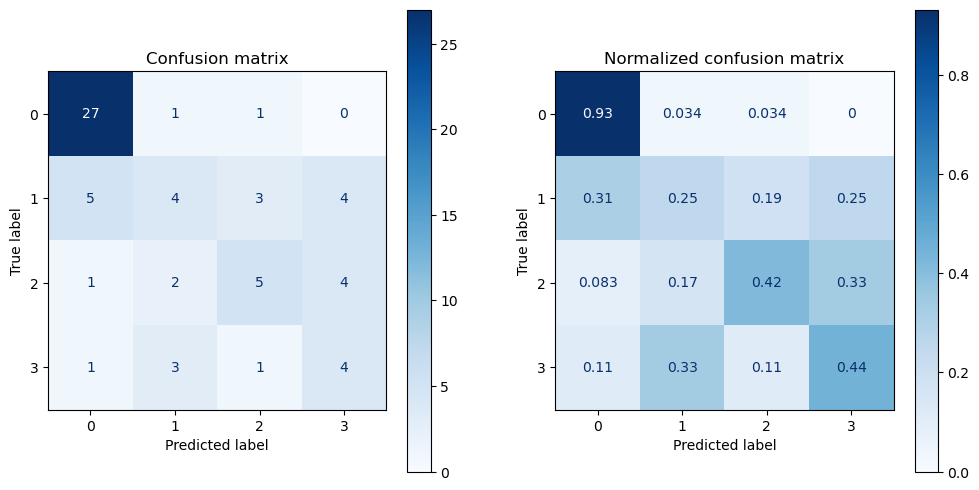

In [530]:
get_evaluation(y_test, std_lgbm_prediction, std_lgbm, X_test)

### 👉6 Cycle 결과

- 각 모델에 대해서 훈련을 하고 오차행렬을 확인한 결과를 각각 확인하니 평균 0.64정도의 정확도가 나타났다.
- 이를 시각화하고 Voting모델로 다시 훈련을 진행한다.

### 전체적인 그래프 시각화

In [550]:
features, targets = under_sw_df2.iloc[:, :-1], under_sw_df2.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [551]:
std_features, std_targets = std_pre_sw_df.iloc[:, :-1], std_pre_sw_df.iloc[:, -1]

parameters = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3]
}

std_X_train, std_X_test, std_y_train, std_y_test = \
train_test_split(std_features, std_targets, stratify=targets, test_size=0.2, random_state=124)

std_X_val_train, std_X_val_test, std_y_val_train, std_y_val_test = \
train_test_split(std_X_train, std_y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
std_X_train_over, std_y_train_over = smote.fit_resample(std_X_train, std_y_train)

evals = [(std_X_val_train, std_y_val_train), (std_X_val_test, std_y_val_test)]

In [553]:
dtc.fit(X_train_over,y_train_over)
svc.fit(X_train_over,y_train_over)
knn.fit(X_train_over,y_train_over)
rfc.fit(X_train_over,y_train_over)
ada.fit(X_train_over,y_train_over)
gbc.fit(X_train_over,y_train_over)
xgb.fit(X_train_over,y_train_over)
lgbm.fit(X_train_over,y_train_over)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

LGBMClassifier(learning_rate=0.3)

In [566]:
dtc_precision = precision_score(y_test, dtc_prediction, average='micro')
svc_precision = precision_score(y_test, svc_prediction, average='micro')
std_svc_precision = precision_score(std_y_test, std_svc_prediction, average='micro')
knn_precision = precision_score(y_test, knn_prediction, average='micro')
std_knn_precision = precision_score(std_y_test, std_knn_prediction, average='micro')
rfc_precision = precision_score(y_test, rfc_prediction, average='micro')
std_rfc_precision = precision_score(std_y_test, std_rfc_prediction, average='micro')
ada_precision = precision_score(y_test, ada_prediction, average='micro')
std_ada_precision = precision_score(std_y_test, std_ada_prediction, average='micro')
gbc_precision = precision_score(y_test, gbc_prediction, average='micro')
std_gbc_precision = precision_score(std_y_test, std_gbc_prediction, average='micro')
xgb_precision = precision_score(y_test, xgb_prediction, average='micro')
std_xgb_precision = precision_score(std_y_test, std_xgb_prediction, average='micro')
lgbm_precision = precision_score(y_test, lgbm_prediction, average='micro')
std_lgbm_precision = precision_score(std_y_test, std_lgbm_prediction, average='micro')

In [568]:
dtc_recall = recall_score(y_test, dtc_prediction, average='micro')
svc_recall = recall_score(y_test, svc_prediction, average='micro')
std_svc_recall = recall_score(std_y_test, std_svc_prediction, average='micro')
knn_recall = recall_score(y_test, knn_prediction, average='micro')
std_knn_recall = recall_score(std_y_test, std_knn_prediction, average='micro')
rfc_recall = recall_score(y_test, rfc_prediction, average='micro')
std_rfc_recall = recall_score(std_y_test, std_rfc_prediction, average='micro')
ada_recall = recall_score(y_test, ada_prediction, average='micro')
std_ada_recall = recall_score(std_y_test, std_ada_prediction, average='micro')
gbc_recall = recall_score(y_test, gbc_prediction, average='micro')
std_gbc_recall = recall_score(std_y_test, std_gbc_prediction, average='micro')
xgb_recall = recall_score(y_test, xgb_prediction, average='micro')
std_xgb_recall = recall_score(std_y_test, std_xgb_prediction, average='micro')
lgbm_recall = recall_score(y_test, lgbm_prediction, average='micro')
std_lgbm_recall = recall_score(std_y_test, std_lgbm_prediction, average='micro')

In [570]:
dtc_f1 = f1_score(y_test, dtc_prediction, average='micro')
svc_f1 = f1_score(y_test, svc_prediction, average='micro')
std_svc_f1 = f1_score(std_y_test, std_svc_prediction, average='micro')
knn_f1 = f1_score(y_test, knn_prediction, average='micro')
std_knn_f1 = f1_score(std_y_test, std_knn_prediction, average='micro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='micro')
std_rfc_f1 = f1_score(std_y_test, std_rfc_prediction, average='micro')
ada_f1 = f1_score(y_test, ada_prediction, average='micro')
std_ada_f1 = f1_score(std_y_test, std_ada_prediction, average='micro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='micro')
std_gbc_f1 = f1_score(std_y_test, std_gbc_prediction, average='micro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='micro')
std_xgb_f1 = f1_score(std_y_test, std_xgb_prediction, average='micro')
lgbm_f1 = f1_score(y_test, lgbm_prediction, average='micro')
std_lgbm_f1 = f1_score(std_y_test, std_lgbm_prediction, average='micro')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


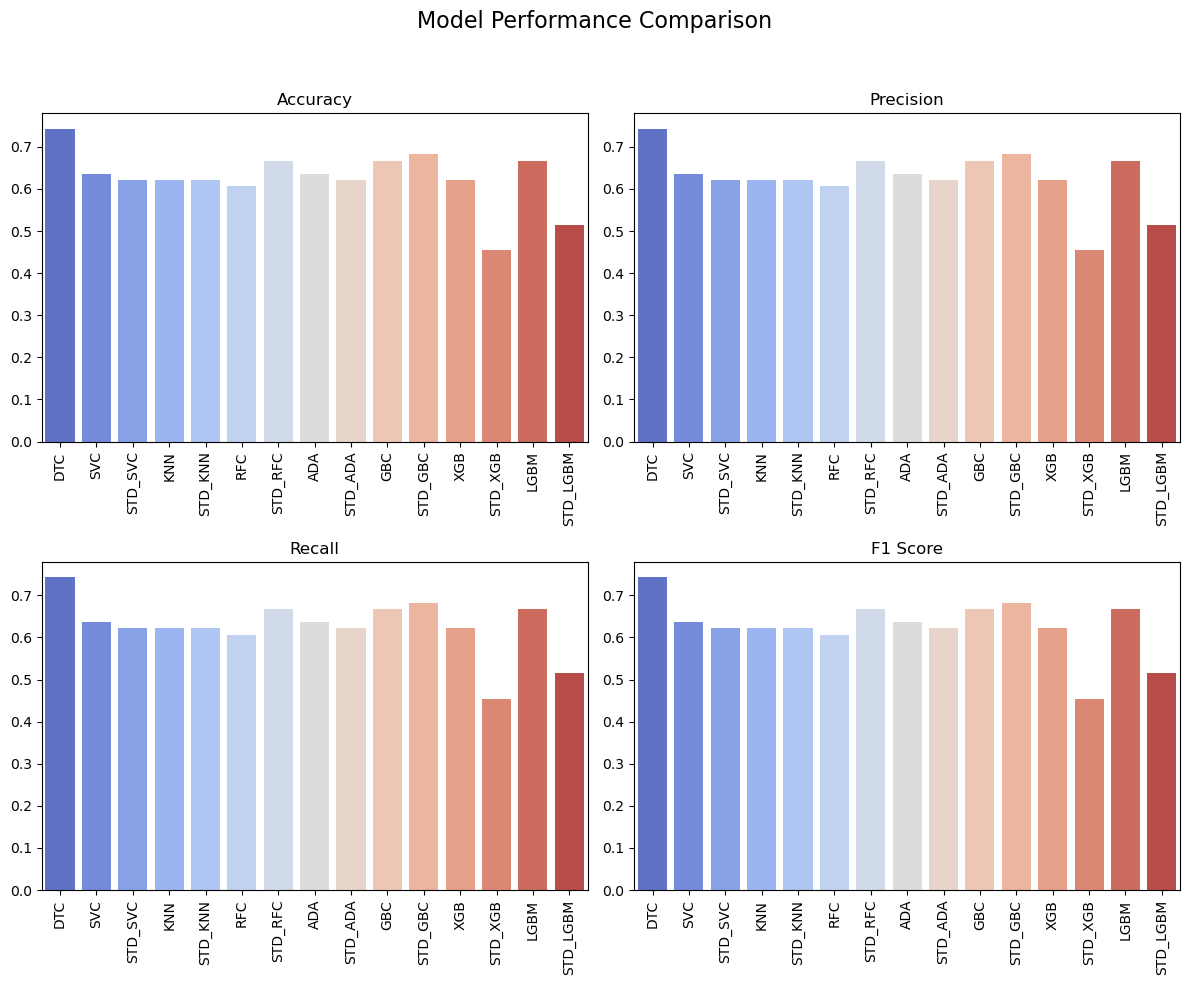

In [571]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 이름과 각 성능 지표
models = ['DTC', 'SVC', 'STD_SVC', 'KNN', 'STD_KNN', 'RFC', 'STD_RFC', 'ADA', 'STD_ADA', 'GBC', 'STD_GBC', 'XGB', 'STD_XGB', 'LGBM', 'STD_LGBM']
accuracies = [dtc_accuracy, svc_accuracy, std_svc_accuracy, knn_accuracy, std_knn_accuracy, rfc_accuracy, std_rfc_accuracy, 
              ada_accuracy, std_ada_accuracy, gbc_accuracy, std_gbc_accuracy, xgb_accuracy, std_xgb_accuracy, 
              lgbm_accuracy, std_lgbm_accuracy]
precisions = [dtc_precision, svc_precision, std_svc_precision, knn_precision, std_knn_precision, rfc_precision, std_rfc_precision, 
              ada_precision, std_ada_precision, gbc_precision, std_gbc_precision, xgb_precision, std_xgb_precision, 
              lgbm_precision, std_lgbm_precision]
recalls = [dtc_recall, svc_recall, std_svc_recall, knn_recall, std_knn_recall, rfc_recall, std_rfc_recall, 
           ada_recall, std_ada_recall, gbc_recall, std_gbc_recall, xgb_recall, std_xgb_recall, 
           lgbm_recall, std_lgbm_recall]
f1_scores = [dtc_f1, svc_f1, std_svc_f1, knn_f1, std_knn_f1, rfc_f1, std_rfc_f1, 
             ada_f1, std_ada_f1, gbc_f1, std_gbc_f1, xgb_f1, std_xgb_f1, 
             lgbm_f1, std_lgbm_f1]

# 막대그래프로 비교
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# 정확도 그래프
sns.barplot(x=models, y=accuracies, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=90)

# 정밀도 그래프
sns.barplot(x=models, y=precisions, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Precision')
axes[0, 1].tick_params(axis='x', rotation=90)

# 재현율 그래프
sns.barplot(x=models, y=recalls, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Recall')
axes[1, 0].tick_params(axis='x', rotation=90)

# F1 스코어 그래프
sns.barplot(x=models, y=f1_scores, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('F1 Score')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 🚩7 Cycle

- 각 모델의 점수를 확인하고 가장 점수가 높은 5개의 모델에 대해서 Soft Voting과 Hard Voting을 적용해서 오차행렬을 확인

In [572]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(
    estimators = [('dtc', dtc),
                 ('std_rfc', std_rfc),
                 ('gbc', gbc),
                 ('std_gbc', std_gbc),
                 ('lgbm', lgbm)],
    voting = 'soft'
)

In [574]:
soft_vc

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=3)),
                             ('std_rfc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('rfc',
                                               RandomForestClassifier(max_depth=12))])),
                             ('gbc', GradientBoostingClassifier()),
                             ('std_gbc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('gbc',
                                               GradientBoostingClassifier(learning_rate=0.06,
                                                                          n_estimators=350))])),
                             ('lgbm', LGBMClassifier(learning_rate=0.3))],
                 voting='soft')

In [579]:
soft_vc.fit(X_train_over, y_train_over)
soft_vc_prediction = soft_vc.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 22
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

오차 행렬
[[27  1  1  0]
 [ 2  6  5  3]
 [ 1  3  5  3]
 [ 1  2  1  5]]
정확도: 0.6515, 정밀도: 0.6515, 재현율: 0.6515, F1: 0.6515
################################################################################


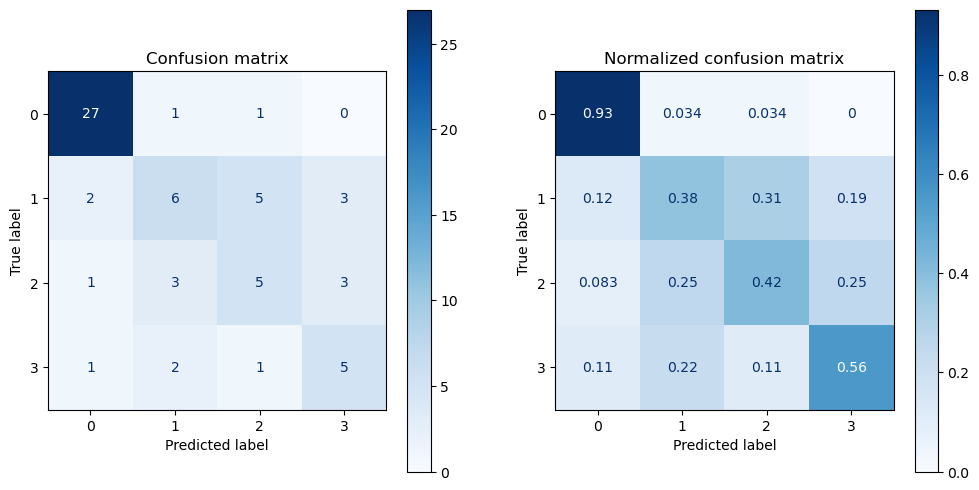

In [580]:
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)

In [581]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(
    estimators = [('dtc', dtc),
                 ('std_rfc', std_rfc),
                 ('gbc', gbc),
                 ('std_gbc', std_gbc),
                 ('lgbm', lgbm)],
    voting = 'hard'
)

In [582]:
hard_vc.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 22
[LightGBM] [Info] Start training from score -0.815750
[LightGBM] [Info] Start training from score -1.449808
[LightGBM] [Info] Start training from score -1.732040
[LightGBM] [Info] Start training from score -1.923095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=12,
                                                     min_samples_split=3)),
                             ('std_rfc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('rfc',
                                               RandomForestClassifier(max_depth=12))])),
                             ('gbc', GradientBoostingClassifier()),
                             ('std_gbc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('gbc',
                                               GradientBoostingClassifier(learning_rate=0.06,
                                                                          n_estimators=350))])),
                             ('lgbm', LGBMClassifier(learning_rate=0.3))])

In [583]:
hard_vc_prediction = hard_vc.predict(X_test)

오차 행렬
[[28  1  0  0]
 [ 2  6  5  3]
 [ 0  3  6  3]
 [ 1  4  2  2]]
정확도: 0.6364, 정밀도: 0.6364, 재현율: 0.6364, F1: 0.6364
################################################################################


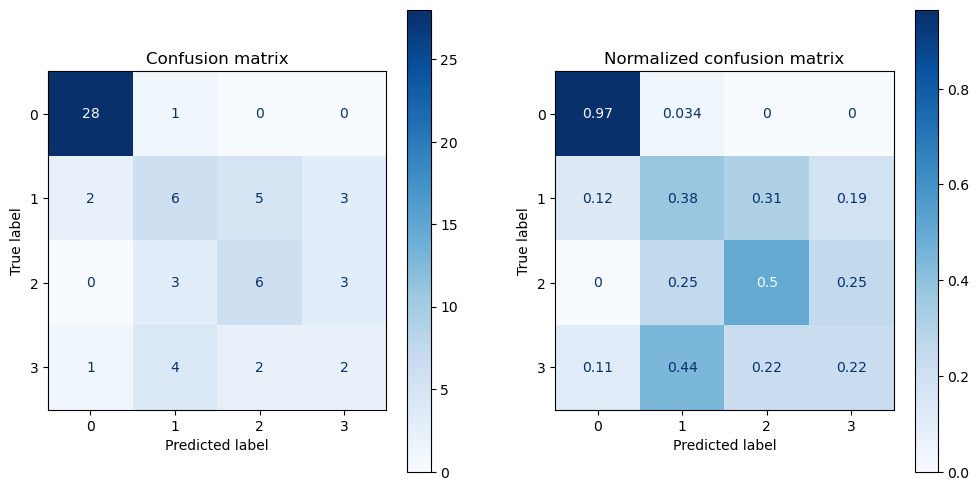

In [584]:
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)

### 👉7 Cycle 결과

- Soft Voting

<img src='./sw_images/14.png' width='700px'>

- Hard Voting

<img src='./sw_images/15.png' width='700px'>

- Soft Voting과 Hard Voting 모두 정확도가 각각 0.6515, 0.6364로 나타났다.
- Voting으로 집계한 결과, 정확도 및 다른 평가점수들이 전체적으로 조금 올라갔다.

-------------------------
## 🎈최종 결론

- 스마트 워치의 가격을 그룹화 하여 다중 분류를 진행하였다.
- 상관관계와 permutation_importance를 통해 확인한 중요도가 높은 feature의 분포 차이가 크게 나타나서 under_sampling을 한 결과 점수가 제일 잘 나타났다.
- 전처리하기 전

<img src='./sw_images/1.png' width='700px'>

- 전처리한 후

<img src='./sw_images/12.png' width='700px'>

- 전처리 결과 DTC 모델에서 약 0.7에 가까운 점수까지 올릴 수 있었다.
- 특히 스마트워치의 가격에는 와이파이 기능이나, 터치가능 기능 등이 더 비싼 것에 기여할 것이라고 생각했지만, GPS, 방수기능, 칼로리확인 기능 등이 더 스마트워치의 가격에 영향을 미친다는 것을 알았다.
- 또한, 금액대를 그룹화했을 때 expensive에 대한 부분, 즉 비싼 스마트 워치에 대한 데이터가 부족하여 예측을 잘 못했다는 것을 알았다.
- 비싼 스마트 워치에 대한 데이터가 더 있다면 더 예측을 잘 하는 모델을 만들 수 있을 것이라고 생각한다.